# Import packages

In [93]:
import numpy as np
import pandas as pd

from analysis.src.missing_value_analysis import SimpleMissingValueAnalysis
from analysis.src.basic_data_inspection import DataInspector, DataTypeInspectionStrategy, \
    SummaryStatisticsInspectionStrategy
from analysis.src.univariate_analysis import UnivariateAnalyzer, NumericUnivariateAnalysis, \
    CategoricalUnivariateAnalysis
from analysis.src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, \
    NumericalVsCategoricalAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load data

In [2]:
df = pd.read_csv('../datasets/train.csv')

# Basic Data Inspection
## Data Types and Non-null counts

In [3]:
data_inspector = DataInspector(DataTypeInspectionStrategy())
data_inspector.execute_inspection(df)


Data types and Non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

## Insights
- The dataset contains **1460 entries** and **81 columns**
- **Data types:** There are 34 columns with `int64` data type, 3 columns with `float64` data type and 43 columns with `object` data type.
    - **Numerical Features:** These include features like `LotFrontage`, `LotArea`, `OverallQual`, `YearBuilt`, etc.
    - **Categorical Features:** Features like `MSZoning`, `Street`, `Alley`, `LotShape`, etc., are categorical
## Summary Statistics

In [4]:
data_inspector = data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary statistics (Numerical Features)
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   1

## Insights:
### Numerical Features
- `MSSubClass` (Type of dwelling involved in the sale): Numerical encoding of building types, ranging from 20 to 190, with a mean of **56.90** and a standard deviation of **42.30**
- `LotFrontage` (Linear feet of street connected to the property): Ranges from **21 to 313 feet**, with a mean of **70.05 feet**.
- `LotArea` (Lot size in square feet): Ranges from **1,300 to 215,245 sq ft**, with a mean of **10,516 sq ft** with a large maximum value indicating potential outliers.
- `OverallQual` (Overall material and finish quality): Ranges from **1 (very poor) to 10 (very excellent)**, with a mean of **6.10**, indicates most properties have above-average construction quality.
- `OverallCond` (Overall condition rating): Ranges from **1 to 9**, with a mean of **5.57** with most properties in average condition and limited variability
- `YearBuilt` (Year the house was built): Ranges from **1872 to 2010**, with a mean of **1971**, indicating a mix of older and more modern properties.
- `YearRemodAdd` (Year the house was remodeled): Ranges from **1950 to 2010**, with a mean of **1984** which shows many houses have undergone remodeling.
- `MasVnrArea` (Masonry veneer area in square feet): Ranges from **0 to 1,600 sq ft**, with a mean of **103.85 sq ft** and a median of **0** indicating that many homes lack masonry veneer
- `BsmtFinSF1` (Finished basement area type 1 in square feet): Ranges from **0 to 5,644 sq ft**, with a mean of **443.64 sq ft**, showing significant variation in basement finishes.
- `BsmtFinSF2` (Finished basement area type 2 in square feet): Ranges from **0 to 1,474 sq ft**, with a mean of **46.54 sq ft** and a median of **0**, indicating that most homes lack a second type of finished basement
- `BsmtUnfSF` (Unfinished basement area in square feet): Ranges from **0 to 2,336 sq ft**, with a mean of **567.24 sq ft**, indicating many homes have unfinished basement spaces
- `TotalBsmtSF` (Total basement area in square feet): Ranges from **0 to 6,110 sq ft**, with a mean of **1,057.42 sq ft** and some potential outliers with very large basement areas
- `1stFlrSF` (First-floor area in square feet): Ranges from **334 to 4,692 sq ft**, with a mean of **1,162.63 sq ft** indicating moderate first-floor sizes.
- `2ndFlrSF` (Second-floor area in square feet): Ranges from **0 to 2,065 sq ft**, with a mean of **346.92 sq ft** and a median of **0** showing that many homes lack a second floor
- `LowQualFinSF` (Low-quality finished area in square feet): Ranges from **0 to 572 sq ft**, with a mean of **5.84 sq ft** and a median of **0** indicating that most homes do not have low-quality finished spaces 
- `GrLivArea` (Above ground living area in square feet): Ranges from **334 to 5,642 sq ft**, with a mean of **1,515.46 sq ft**, indicating a variety of home sizes.
- `BsmtFullBath` (Number of full bathrooms in the basement): Ranges from **0 to 3**, with a mean of **0.42** and a median of **0**, showing that most homes do not have a full bathroom in the basement
- `BsmtHalfBath` (Number of half bathrooms in the basement): Ranges from **0 to 2**, with a mean of **0.06**, indicating that few homes have basement half bathrooms.
- `FullBath` (Number of full bathrooms above grade): Ranges from **0 to 3**, with a mean of **1.57**, meaning most homes have at least one full bathroom
- `HalfBath` (Number of half bathrooms above grade): Ranges from **0 to 2**, with a mean of **0.38**, indicating that most homes do not have half bathroom or they just have one half bathroom.
- `BedroomAbvGr` (Number of bedrooms above grade): Ranges from **0 to 8**, with a mean of **2.87**, showing that most homes have 2 or 3 bedrooms.
- `KitchenAbvGr` (Number of kitchens above grade): Ranges from **0 to 3**, with a mean of **1.04**, indicating that nearly all homes have one kitchen.
- `TotRmsAbvGrd` (Total rooms above grade): Ranges from **2 to 14**, with a mean of **6.52**, showing that most homes have a moderate number of rooms.
- `Fireplaces` (Number of fireplaces): Ranges from **0 to 3**, with a mean of **0.61**, indicating that  many homes lack fireplaces.
- `GarageYrBlt` (Year the garage was built): Ranges from **1900 to 2010**, with a mean of **1978**, reflecting the timeline of garage construction.
- `GarageCars` (Garage size in car capacity): Ranges from **0 to 4**, with a mean of **1.77** indicating that most homes have garages accommodating **1 to 2 cars**.
- `GarageArea` (Garage area in square feet): Ranges from **0 to 1,418 sq ft**, with a mean of **472.98 sq ft** and a standard deviation of **213.80 sq ft**, showing significant variation in garage sizes.
- `WoodDeckSF` (Wooden deck area in square feet): Ranges from **0 to 857 sq ft**, with a mean of **94.24 sq ft** and a median of **0 sq ft**, indicating that many homes lack wooden decks.
- `OpenPorchSF` (Open porch area in square feet): Ranges from **0 to 547 sq ft**, with a mean of **46.66 sq ft**, meaning many homes lack open porches.
- `EnclosedPorch` (Enclosed porch area in square feet): Ranges from **0 to 552 sq ft**, with a mean of **21.95 sq ft** and a median of **0 sq ft**, indicating that most homes do not have an enclosed porch.
- `3SsnPorch` (Three-season porch area in square feet): Ranges from **0 to 508 sq ft**, with a mean of **3.49 sq ft** and a median of **0 sq ft**, showing that very few homes have this feature.
- `ScreenPorch` (Screened porch area in square feet): Ranges from **0 to 480 sq ft**, with a mean of **15.06 sq ft** and a median of **0 sq ft**, indicating that most homes lack this feature.
- `PoolArea` (Pool area in square feet): Ranges from **0 to 738 sq ft**, with a mean of **2.76 sq ft** and median of **0 sq ft**, showing that pools are uncommon in this dataset.
- `MiscVal` (Value of miscellaneous features in dollars): Ranges from **\$0 to \$15,500**, with a mean of **\$43.49** and a median of **$0**, indicating that most homes do not have significant miscellaneous values.
- `MoSold` (Month of sale): Ranges from **1 to 12**, with a mean of **6.32**, indicating that sales are evenly distributed across months.
- `YrSold` (Year of sale): Ranges from **2006 to 2010**, with a mean of **2007.82**, showing that sales are balanced across the years.
- `SalePrice` (Target variable): Ranges from **\$34,900 to \$755,000**, with a mean of **\$180,921.20** and a standard deviation of **\$79,442.50** suggests significant price variability.

### Categorical Features
- `MSZoning` (Zoning classification): Contains **5 unique** categories, with **RL (Residential Low Density)** being the most common, suggesting that a majority of homes are in low-density residential areas.
- `Street` (Type of road access): Has **2 unique values**; **Pave (paved)** and **Grvl (gravel)** with pave dominating the dataset with 1454 occurrences, indicating most properties have paved road access.
- `Alley` (Type of alley access): Contains **2 unique** categories, **Grvl (gravel)** and **Pave (paved)**, but has a high number of missing values (91 non-missing entries), suggesting alley access is not common in this dataset.
- `LotShape` (General shape of property): Has **4 unique** categories, with **Reg (regular)** being the most common
- `LandContour` (Flatness of the property): Contains **4 unique** categories, with **Lvl (near flat/level)** being the most frequent
- `Utilities` (Type of utilities available): Contains **2 unique** values, with **AllPub (all public utilities)** dominating, suggesting that utilities are widely available for nearly all properties.
- `LotConfig` (Lot configuration): Contains **5 unique** categories, with **Inside (inside lot)** being the most common, showing that most properties are inside lots rather than corner or cul-de-sac lots.
- `LandSlope` (Slope of the property): Contains **3 unique** values, with **Gtl (gentle slope)** being the most frequent.
- `Neighborhood`: Contains **25 unique** categories, with `NAmes` being the most common neighborhood, suggesting that some neighborhoods dominate the dataset, which might influence property prices.
- `Condition1` (Proximity to various conditions): Contains **9 unique** categories, with **Norm (normal condition)** being the most frequent, indicating most properties are not affected by proximity to major roads or railroads.
- `Condition2` (Secondary proximity to various conditions): Contains **8 unique** values, with **Norm** being the most frequent, reinforcing that most properties are unaffected by secondary road/railroad proximity.
- `BldgType` (Type of building): Contains **5 unique** categories, with **1Fam (single-family detached)** being the most common, which highlights the dominance of single-family homes in this dataset.
- `HouseStyle` (Style of dwelling): Contains **8 unique** categories, with **1Story (one-story homes)** being the most frequent, indicating a significant preference for single-story homes.
- `RoofStyle`: Contains **6 unique** styles, with **Gable** being the most frequent, suggesting that **gable** roofs are the most common in the dataset.
- `RoofMatl` (Roof material): Contains **8 unique** materials, with **CompShg (composite shingles)** being the most common, indicating composite shingles are the standard roofing material.
- `Exterior1st` (Primary exterior material): Contains **15 unique** materials, with **VinylSd (vinyl siding)** being the most frequent, suggesting **vinyl siding** is a popular exterior finish.
- `Exterior2nd` (Secondary exterior material): Contains **16 unique** materials, with **VinylSd** being the most frequent, similar to `Exterior1st`, **vinyl siding** dominates.
- `MasVnrType` (Masonry veneer type): Contains **3 unique** categories, with **BrkFace (brick face)** being the most frequent
- `ExterQual` (Exterior quality): Contains **4 unique** categories, with **TA (Typical/Average)** being the most frequent, indicating that most homes have standard exterior quality.
- `ExterCond` (Exterior condition): Contains **5 unique** categories, with **TA** being the most frequent, most properties have an average exterior condition.
- `Foundation`: Contains **6 unique** types, with **PConc (poured concrete)** being the most frequent, indicating that **poured concrete** is the most common foundation type.
- `BsmtQual` (Basement height): Contains **4 unique** categories, with **TA** being the most frequent, suggesting that most basements are of typical quality.
- `BsmtCond` (Basement condition): Contains **4 unique** categories, with **TA** being the most frequent, meaning most basements are in average condition.
- `BsmtExposure` (Walkout basement exposure): Contains **4 unique** categories, with **No (no exposure)** being the most frequent, indicating that most homes lack basement exposure.
- `BsmtFinType1` (Basement finished area type 1): Contains **6 unique** categories, with **Unf (unfinished)** being the most frequent, showing that many basements remain unfinished.
- `Heating`: Contains **6 unique** categories, with **GasA (gas forced air)** being the most frequent
- `HeatingQC` (Heating quality and condition): Contains **5 unique** categories, with **Ex (excellent)** being the most frequent, indicating that most heating systems are of excellent quality.
- `CentralAir` (Central air conditioning): Contains **2 unique** values (**Y for Yes, N for No**), with Y being the most frequent, suggesting that most homes have central air conditioning.
- `Electrical`: Contains **5 unique** categories, with **SBrkr (standard circuit breaker and romex)** being the most frequent
- `KitchenQual` (Kitchen quality): Contains **4 unique** categories, with **TA** being the most frequent indicating that most kitchens are of average quality.
- `Functional` (Home functionality rating): Contains **7 unique** categories, with **Typ (typical)** being the most frequent, suggesting that most homes have typical functionality.
- `FireplaceQu` (Fireplace quality): Contains **5 unique** categories, with **Gd (good)** being the most frequent, indicating that many homes lack fireplaces (missing values exist).
- `GarageType`: Contains **6 unique** categories, with **Attchd (attached garage)** being the most frequent, suggesting that most homes have attached garages.
- `GarageFinish` (Garage interior finish): Contains **3 unique** categories, with **Unf (unfinished)** being the most frequent, suggesting that most garages are unfinished.
- `GarageQual` (Garage quality): Contains **3 unique** categories, with **TA** being the most frequent, indicating that most garages are of average quality.
- `GarageCond` (Garage condition): Contains **5 unique** categories, with **TA** being the most frequent, suggesting that most garages are in average condition.
- `PavedDrive` (Paved driveway): Contains **3 unique** categories, with **Y (paved)** being the most frequent, indicating that most homes have paved driveways.
- `PoolQC` (Pool quality): Contains **3 unique** categories, with **Gd (good)** being the most frequent.
- `Fence`: Contains **4 unique** categories, with **MnPrv (minimum privacy)** being the most frequent
- `MiscFeature` (Miscellaneous feature): Contains **4 unique** categories, with **Shed** being the most frequent
- `SaleType`: Contains **9 unique** categories, with **WD (warranty deed)** being the most frequent, indicating that most sales involve a warranty deed.
- `SaleCondition`: Contains **6 unique** categories, with **Normal** being the most frequent, suggesting that most sales occur under normal conditions.


# Missing Value Analysis


Missing values Count by Column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


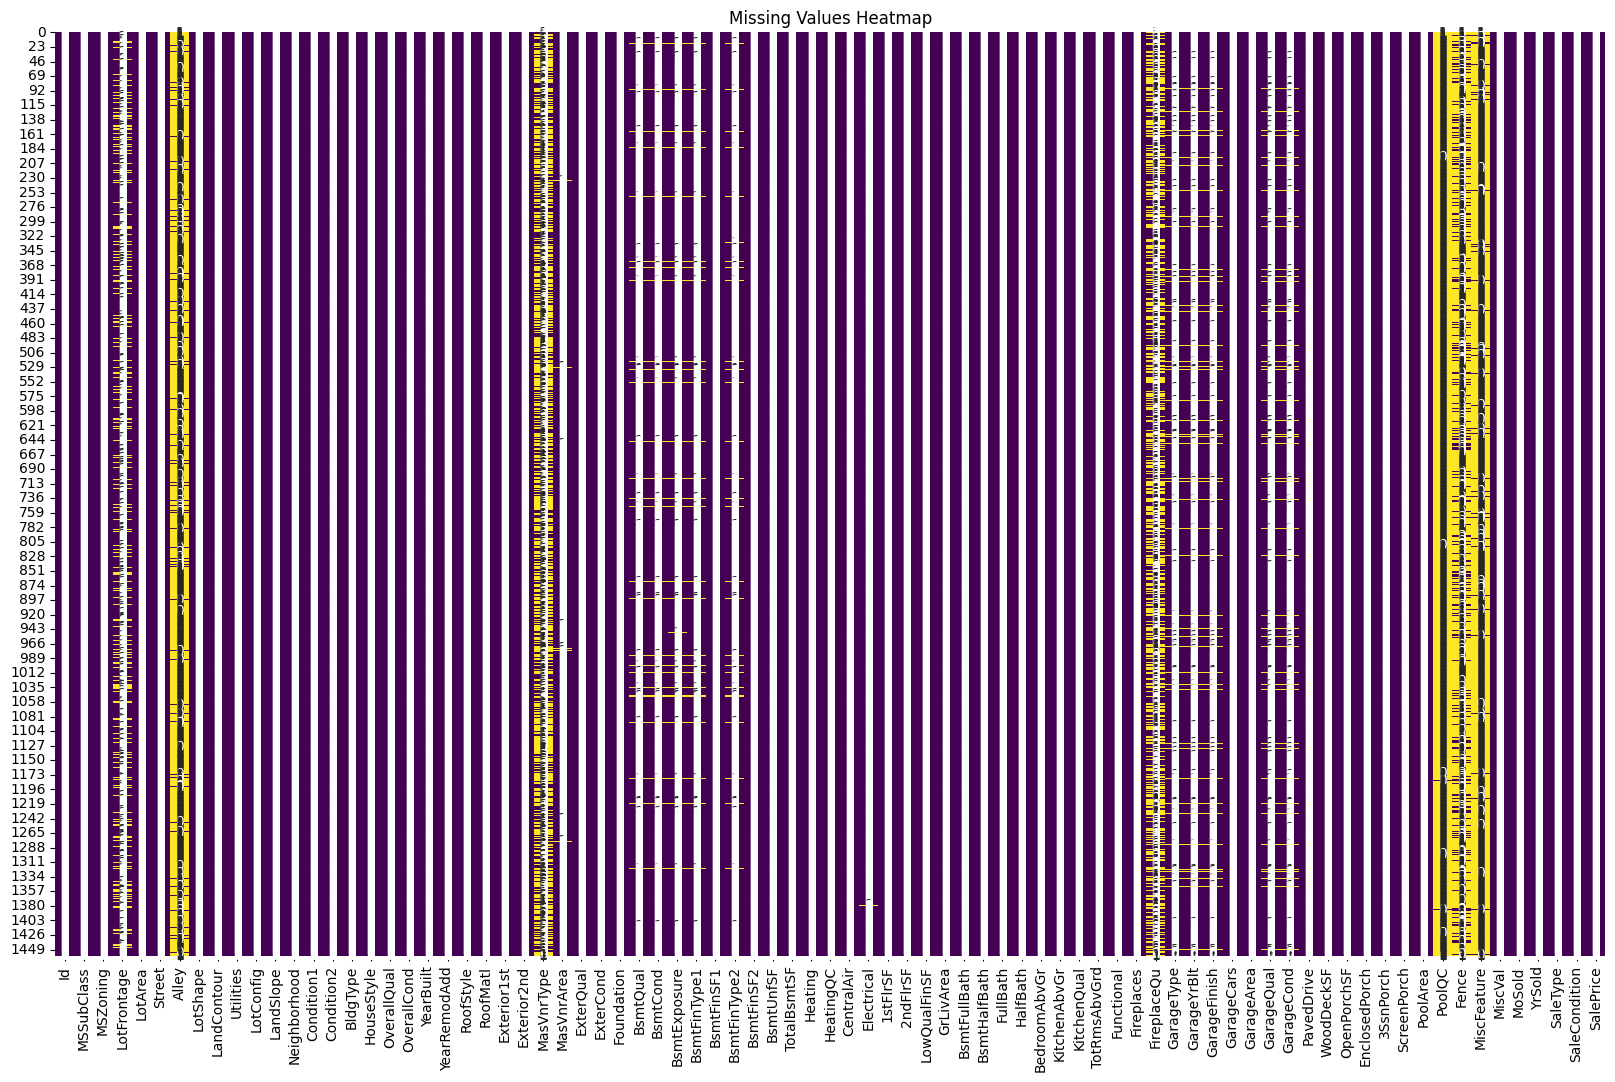

In [5]:
missing_value_analyzer = SimpleMissingValueAnalysis()
missing_value_analyzer.analyze(df)

## Insights:
- Features such as `Alley`, `PoolQC`, `Fence`, and `MiscFeature` have a high proportion of missing values, requiring thoughtful handling. It is necessary to decide whether to exclude these features entirely or to impute the missing values based on the context.
- Features like `MasVnrType` and `FireplaceQu` have a moderate number of missing values, which may call for a balanced imputation strategy to retain their predictive utility.
- Features such as `LotFrontage`, `BsmtQual`, `BsmtCond`, and similar columns have relatively few missing values, which can be addressed with straightforward imputation techniques.
- The data dictionary indicates that, for many features, missing values signify the absence of that attribute (e.g., no alley access or no pool). This contextual information should guide the treatment of missing data to ensure it aligns with the intended meaning.

# Univariate Analysis
## Numerical Features

In [6]:
univariate_analyzer = UnivariateAnalyzer(NumericUnivariateAnalysis())

### MSSubClass

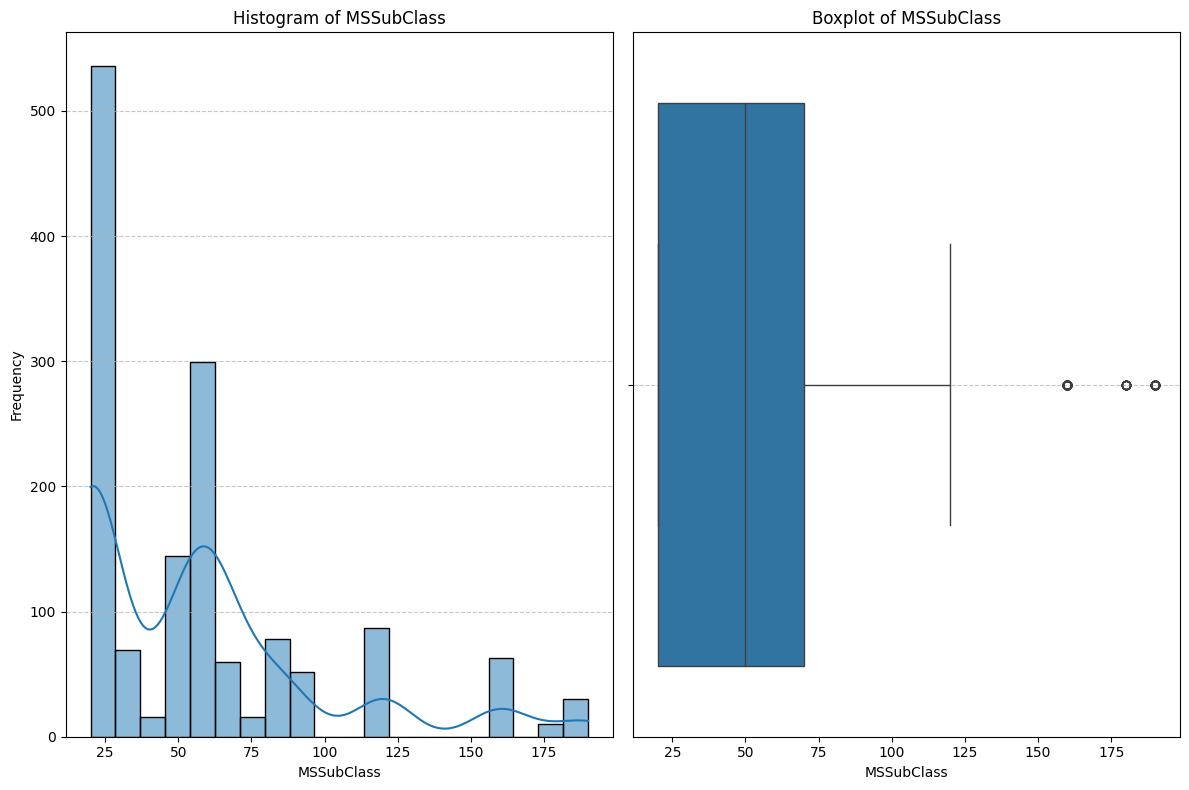

In [7]:
univariate_analyzer.analyze(df, 'MSSubClass')

#### Insight:
- The histogram shows that the majority of values in the MSSubClass feature are concentrated around the lower bins, particularly at values close to 20 and 60. This indicates that most properties fall under these subclass categories.
- The distribution is highly right-skewed, with fewer occurrences at higher values of MSSubClass.
- The boxplot confirms this skewness, with a significant number of outliers on the upper end (greater than approximately 120).
#### Implication:
- The skewness suggests that specific subclasses dominate the dataset, potentially representing popular property types or configurations.
- The presence of outliers in higher subclass values warrants further exploration. These might represent rare or specialized property types, which could influence model performance if not handled carefully.
- During modelling I will consider encoding MSSubClass as a categorical variable as it represents nominal categories

### LotFrontage

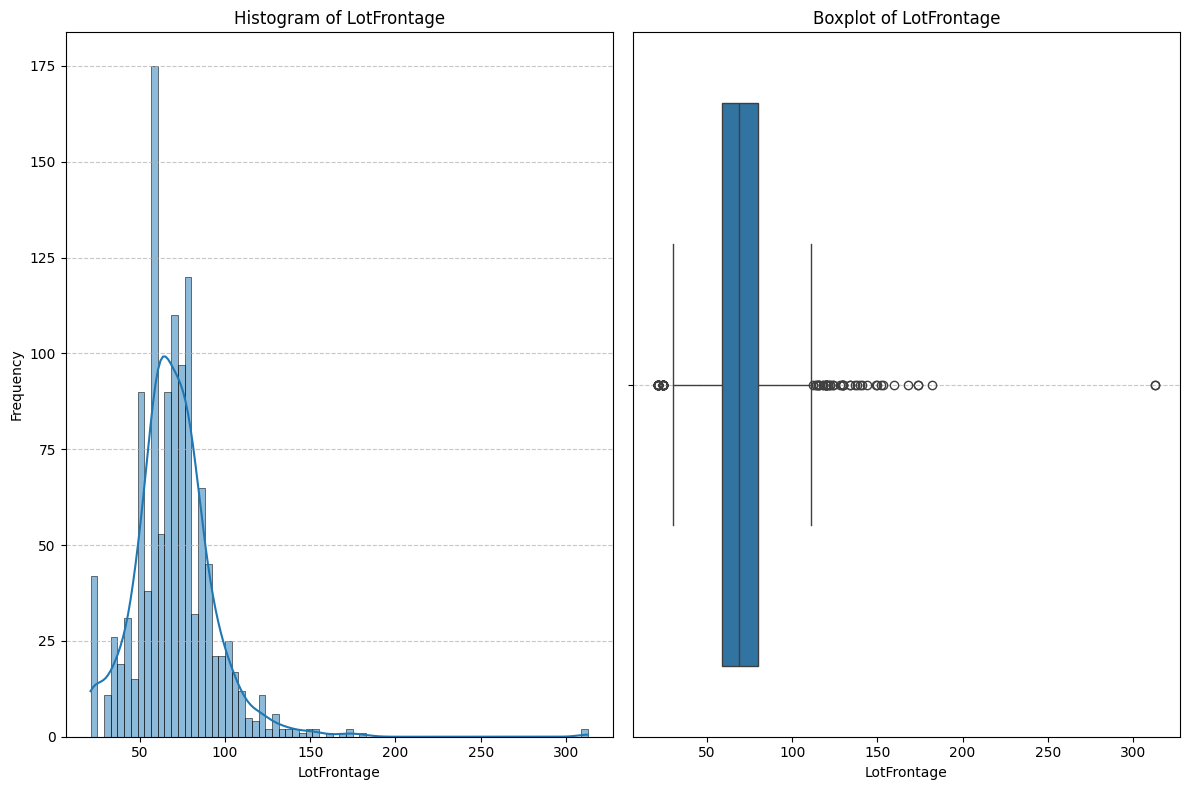

In [10]:
univariate_analyzer.analyze(df, 'LotFrontage')

#### Insight:
- The histogram shows a positively skewed distribution, with most values clustered between 50 and 100. There is a noticeable peak around 60, suggesting this is the most common lot frontage in the dataset.
- The boxplot highlights the presence of several outliers on the higher end (greater than 150). These represent properties with unusually large lot frontages. It also shows a few outliers on the lower end (less than ~25), which represents properties with unusually small lot frontages
#### Implication:
- The skewness and outliers suggest that the `LotFrontage` variable might benefit from a log or square root transformation to reduce skewness if used as a predictor in modeling.
- The outliers might correspond to properties with unique characteristics, such as large estates, which could have a disproportionate influence on certain models. These cases may need to be addressed through capping, transformation, or separate analysis.
- Missing or zero values in LotFrontage should be explored further to understand their context, as they could indicate incomplete or non-standard lot data.

### LotArea

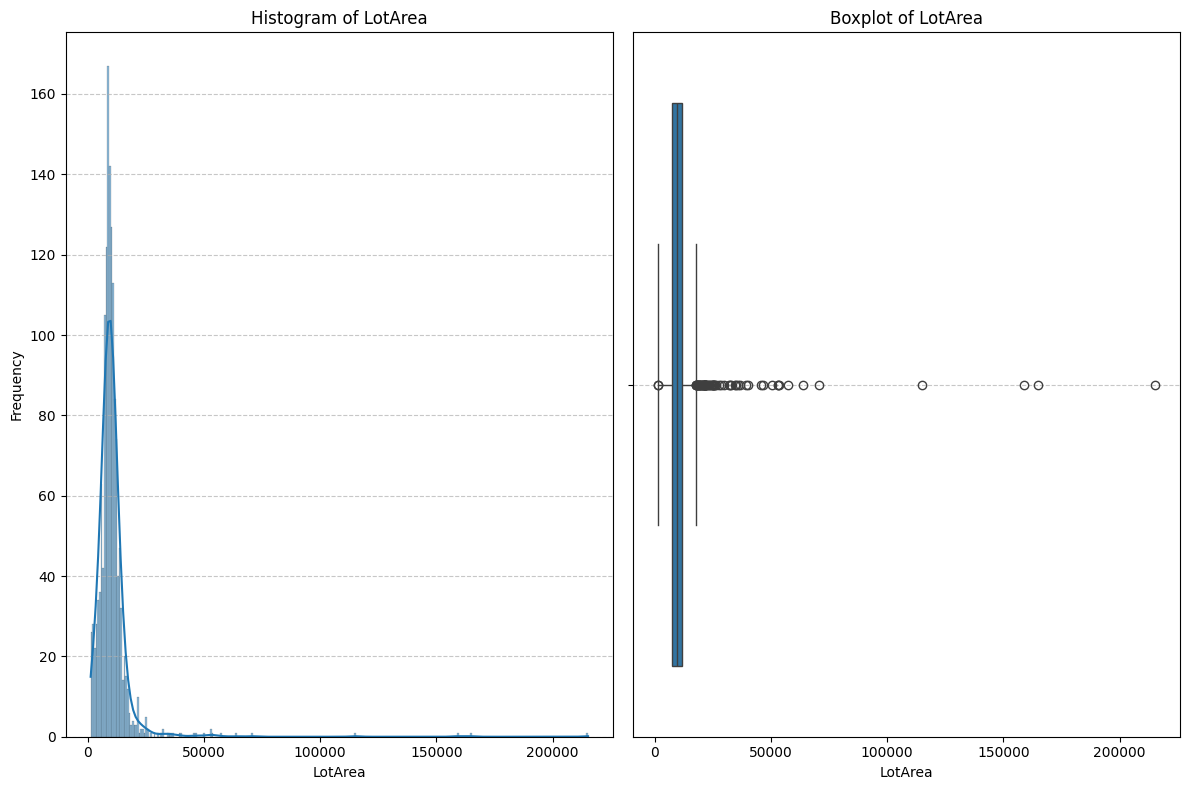

In [11]:
univariate_analyzer.analyze(df, 'LotArea')

#### Insight:
- The histogram reveals an extreme right-skewed distribution, with most of the values clustered in the lower range, particularly below 20,000. There is a long tail extending toward much larger lot areas.
- The boxplot confirms this pattern, showing a tightly packed interquartile range (IQR) with numerous outliers far beyond the upper whisker. These outliers represent properties with significantly larger lot areas.
#### Implication:
- The heavily skewed distribution and presence of extreme outliers suggest that the `LotArea` variable may require a log or other nonlinear transformation to stabilize variance and reduce skewness for predictive modeling.
- Outliers might correspond to atypical properties (e.g., estates, farms, or commercial land), which could skew model results if not treated carefully. Investigating these outliers individually could provide insights into whether they are valid or should be handled (e.g., by capping or excluding).
### OverallQual

In [12]:
univariate_analyzer.analyze(df, 'OverallQual')

#### Insight:
- The histogram of `OverallQual` shows a multimodal distribution, with distinct peaks at values 5, 6, and 7. These peaks suggest that these quality ratings are the most common in the dataset.
- The boxplot shows that the `OverallQual` values are tightly clustered, with no extreme outliers. The interquartile range spans roughly from 5 to 7, indicating that most homes fall within average to slightly above-average quality levels.
#### Implication:
- The multimodal nature of the distribution suggests that `OverallQual` captures categorical or ordinal information related to property quality. As such, it should be treated as an ordinal variable in modeling, respecting the rank order of the quality ratings.
- Given its centrality and lack of significant outliers, `OverallQual` appears to be a robust predictor that likely differentiates properties well. It should be closely analyzed for its relationship with other variables, especially SalePrice, to determine its predictive power.
### OverallCond

In [13]:
univariate_analyzer.analyze(df, 'OverallCond')

#### Insight:
- The histogram of OverallCond shows a strongly unimodal distribution, with the majority of observations concentrated at a value of 5. This indicates that most properties in the dataset have an average overall condition.
- The boxplot reveals a symmetric distribution with minimal variability and a few outliers at the lower end (conditions rated as 1–3) and upper end (conditions 8 and 9). The IQR spans between approximately 4 and 6, highlighting that most properties are rated as average or slightly above/below average.
#### Implication:
- The concentration of values at 5 suggests that `OverallCond` might not provide much variance to differentiate between properties unless its relationship with the target variable (SalePrice) is significant. This should be examined further to evaluate its predictive importance.
- The lower-end outliers (ratings 1–3) represent properties with notably poor conditions. These could have unique relationships with the target variable and may influence model performance disproportionately if not treated appropriately.
- As `OverallCond` is an ordinal variable, maintaining its order in preprocessing (e.g., during encoding) is crucial. Additional grouping of rare values (like 1–3 or 8–9) may also be considered to simplify the feature for modeling.
### YearBuilt

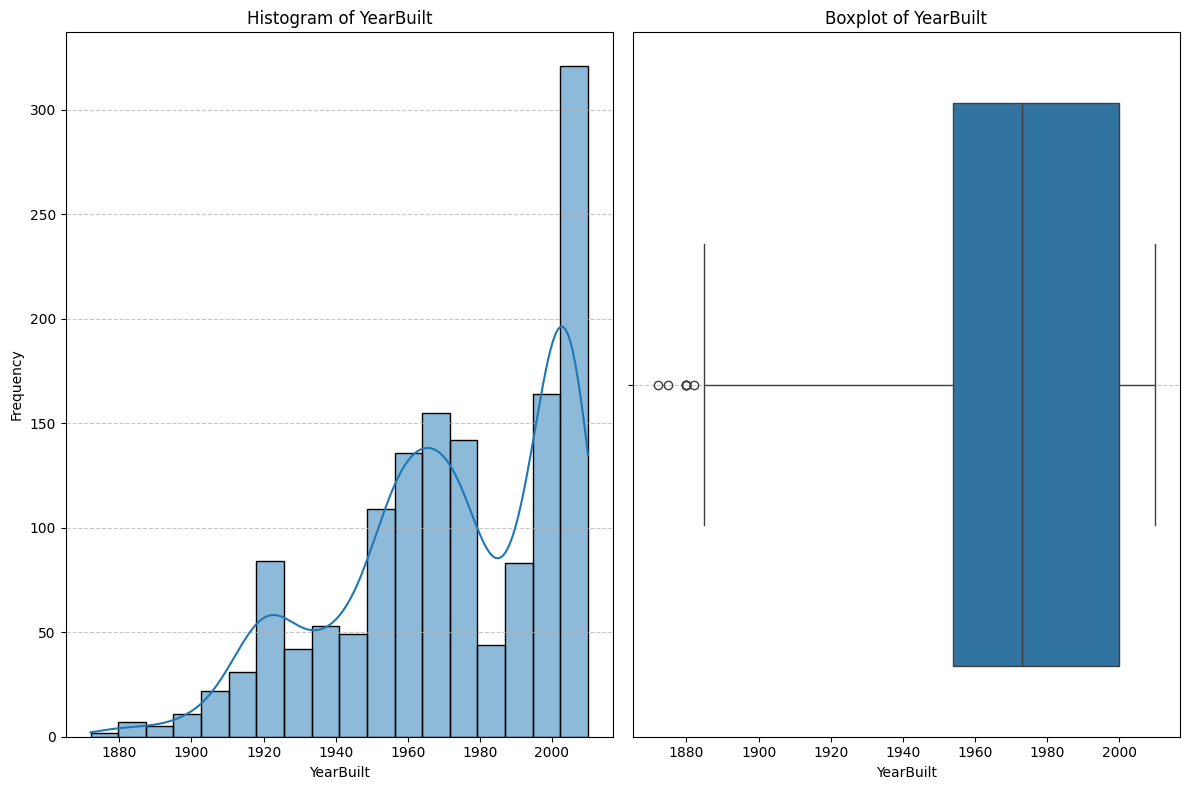

In [14]:
univariate_analyzer.analyze(df, 'YearBuilt')

#### Insight:
- The histogram of YearBuilt shows a bimodal pattern, with significant construction activity during two distinct periods: around 1950–1980 and post-2000. The spike in the most recent bin indicates that many properties were built after 2000.
- The boxplot reveals a generally right-skewed distribution, with a long lower tail representing older properties (built before 1900). However, no extreme outliers are visible, and most data points are within a reasonable range.
#### Implication:
- The bimodal nature of YearBuilt suggests that the dataset includes a mix of older and newer properties, potentially reflecting differences in architectural styles, building codes, or materials. This could influence other features.
- The lower tail of older properties might need further exploration, as they may behave differently in terms of the target variable (SalePrice). For instance, older homes could either have higher value due to historical significance or lower value due to depreciation.
- If YearBuilt is used as a numerical feature, it might be beneficial to engineer additional features (e.g., property age at the time of sale) to capture temporal trends more effectively.

### YearRemodAdd

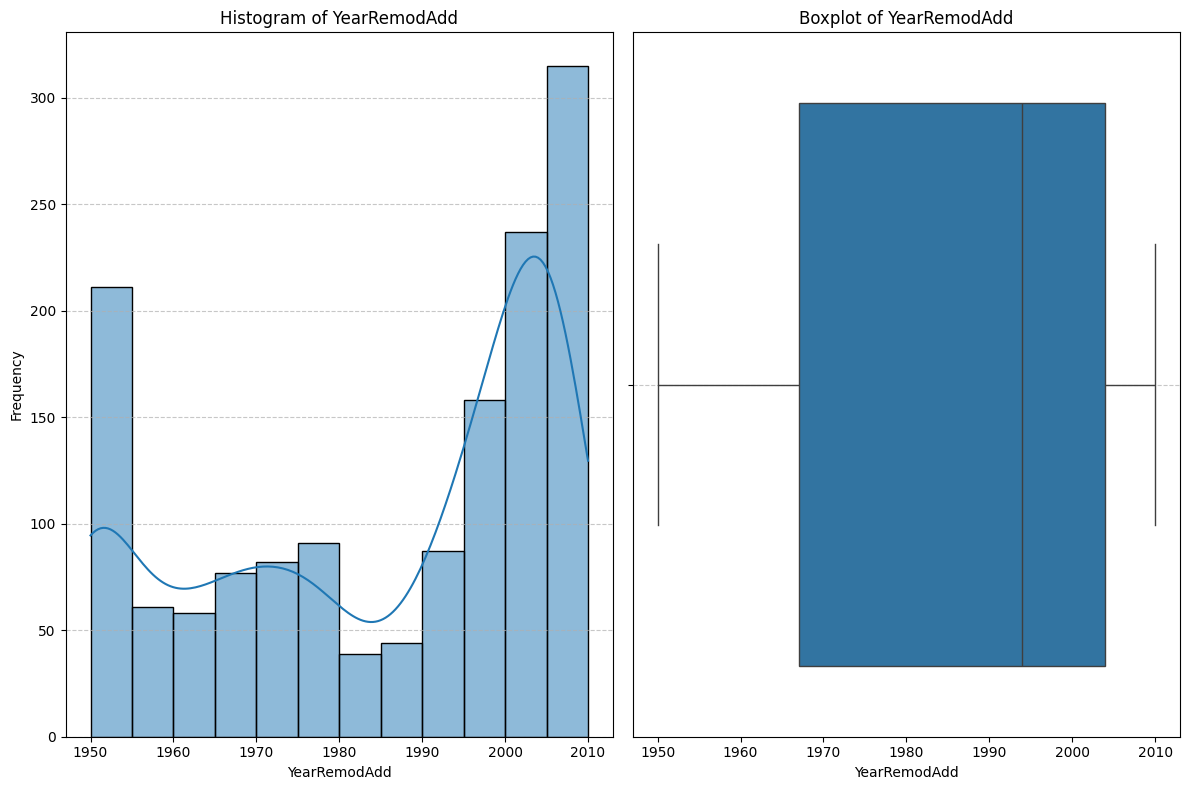

In [15]:
univariate_analyzer.analyze(df, 'YearRemodAdd')

#### Insight:
- The histogram of `YearRemodAdd` shows a relatively uniform distribution for years before 2000, followed by a sharp increase in frequency post-2000. This indicates that a significant number of properties underwent remodeling or additions in the recent decades.
- The boxplot suggests a fairly symmetric distribution without extreme outliers. The interquartile range spans from around 1970 to 2005, capturing most of the remodeling dates in the dataset.
#### Implication:
- The peak in recent years highlights a trend of increasing remodeling activity. This could reflect modernization trends or increased homeowner investment in property updates.
- The variable may play a critical role in predictive modeling, as recently remodeled properties might have a positive correlation with `SalePrice` due to updated features or improved aesthetics.
- To enhance interpretability, I will consider creating a derived feature such as "years since last remodeling" to capture the recency of the remodeling, which might better correlate with the target variable.

### MasVnrArea

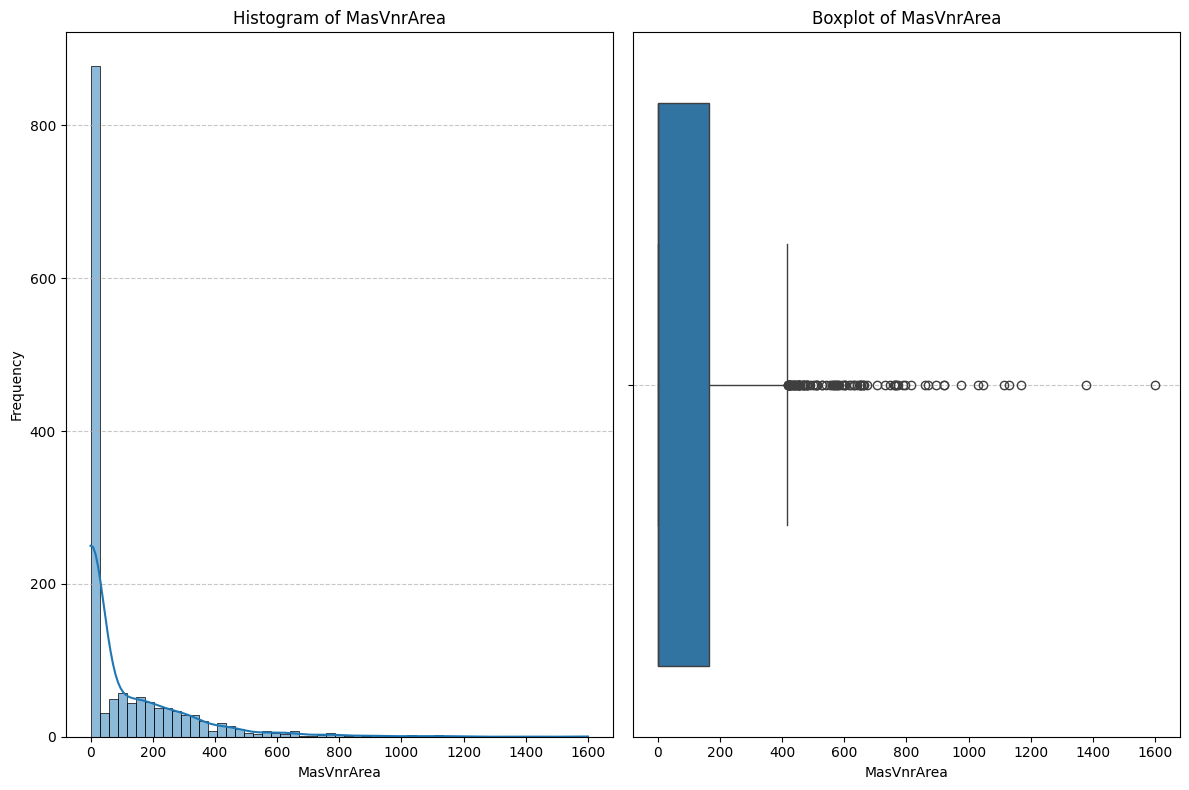

In [16]:
univariate_analyzer.analyze(df, 'MasVnrArea')

#### Insight:
- The histogram of MasVnrArea (Masonry Veneer Area) reveals a highly right-skewed distribution, with a significant number of properties having a MasVnrArea of 0. This indicates that many properties do not have a masonry veneer.
- The boxplot confirms the skewness and highlights several high-value outliers above 400, indicating properties with exceptionally large masonry veneer areas. The IQR is small, reflecting the concentration of values near 0.
#### Implication:
- The high frequency of zero values suggests that MasVnrArea might be treated as a binary variable (e.g., presence or absence of masonry veneer) for certain analyses. Alternatively, a log transformation (after adding a small constant) could help normalize the distribution for modeling purposes.
- The presence of large outliers indicates potential specialty or high-end properties. These might skew predictions in models like linear regression unless appropriately addressed (e.g., capping or separate handling).
### BsmtFinSF1

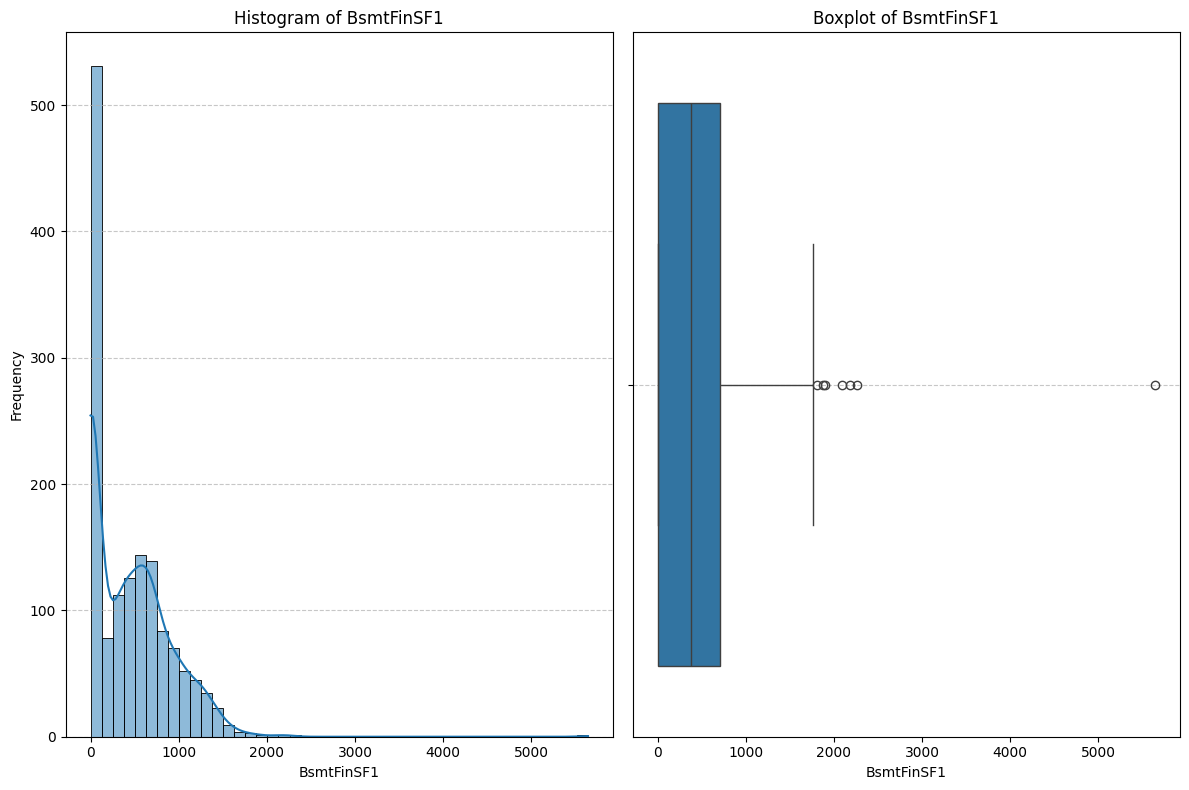

In [17]:
univariate_analyzer.analyze(df, 'BsmtFinSF1')

#### Insight:
- The histogram of BsmtFinSF1 (finished square footage of basement type 1) shows a highly right-skewed distribution, with the majority of properties having small to moderate finished basement areas, mostly clustered below 1,000 square feet. A significant number of properties have zero finished basement area, suggesting they lack finished basements.
- The boxplot confirms the skewness, with a compact interquartile range (IQR) and several high-value outliers above 2,000 square feet. These outliers represent properties with exceptionally large finished basement areas.
#### Implication:
- The prevalence of zeros suggests that `BsmtFinSF1` might benefit from being split into two components: a binary indicator for whether the property has a finished basement (BsmtFinSF1 > 0) and the actual size for those that do.
- The skewness and outliers could distort model predictions if this variable is used directly. Applying a log transformation might help stabilize variance and reduce skewness.
### BsmtFinSF2

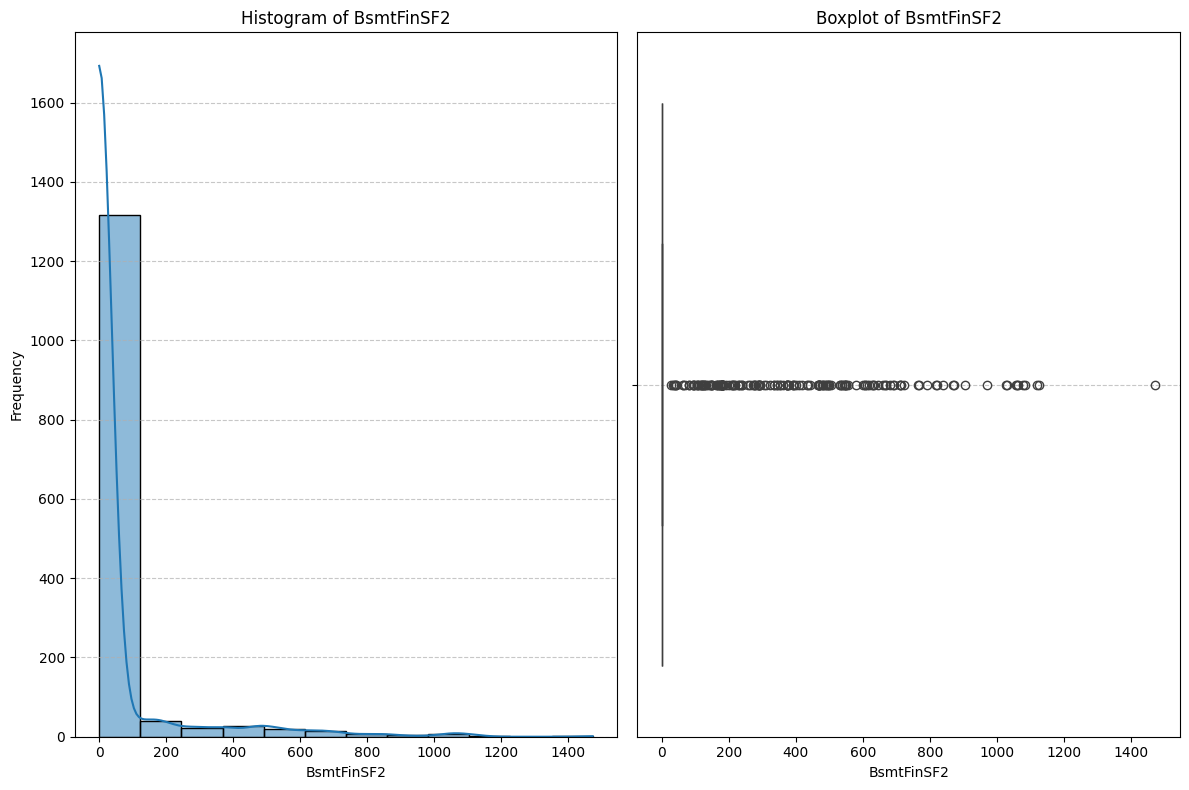

In [18]:
univariate_analyzer.analyze(df, 'BsmtFinSF2')

#### Insight:
- The histogram of `BsmtFinSF2` (finished square footage of basement type 2) reveals an extremely right-skewed distribution, with the vast majority of properties having a value of 0. This indicates that most properties do not have a type 2 finished basement area.
- The boxplot shows a highly compressed range with several outliers beyond 500 square feet. These represent rare properties with large secondary finished basement areas.
#### Implication:
- Given that most values are 0, I will consider converting `BsmtFinSF2` into a binary feature (e.g., whether a secondary finished basement exists) and a separate numerical feature for the non-zero values. This could simplify analysis and modeling.
- The skewness and outliers suggest that transformations, such as a log scale, may help stabilize variance if this feature is used directly in predictive modeling.
- The rarity of non-zero values may reduce the importance of this feature in general models unless secondary basements strongly correlate with the target variable (`SalePrice`)
### BsmtUnfSF

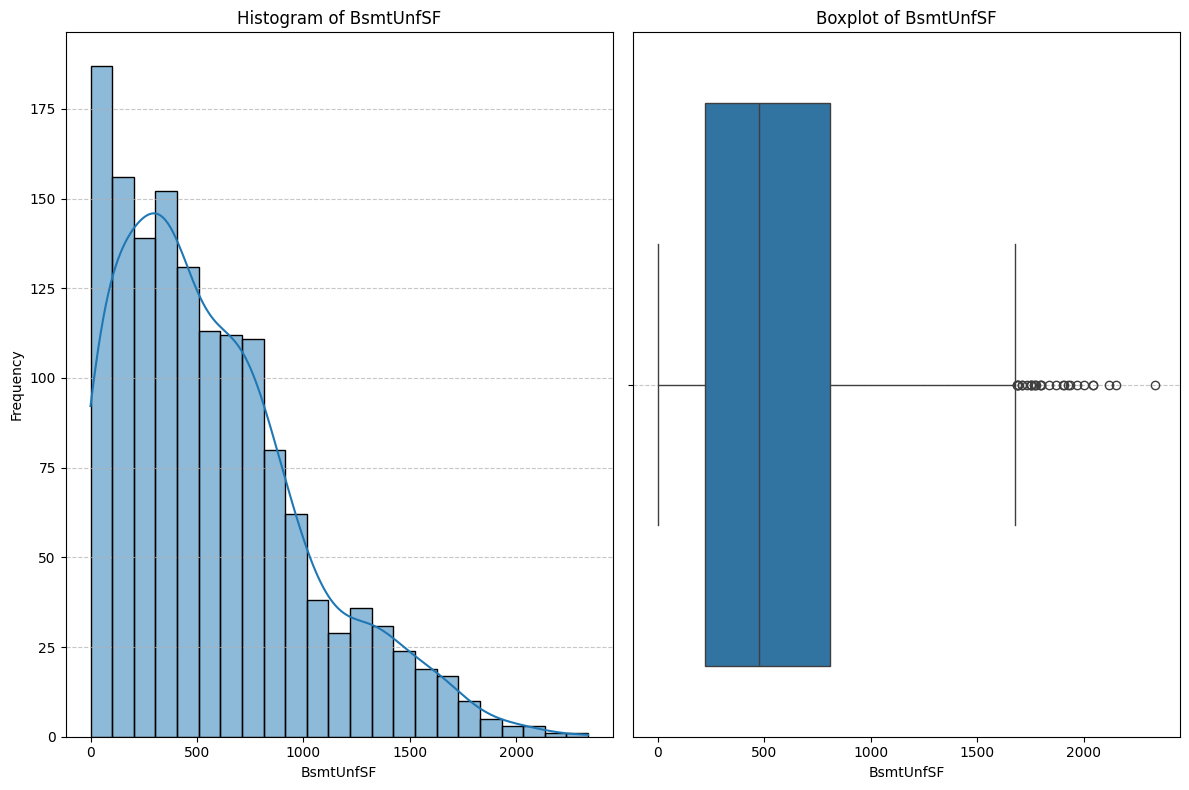

In [19]:
univariate_analyzer.analyze(df, 'BsmtUnfSF')

#### Insight:
- The histogram of `BsmtUnfSF` (unfinished square footage of the basement) exhibits a slightly right-skewed distribution. Most properties have unfinished basement areas clustered below 1,000 square feet, with a gradual tapering off toward higher values.
- The boxplot shows a relatively broad interquartile range, with some outliers beyond 1,700 square feet. These outliers correspond to properties with unusually large unfinished basements.
#### Implication:
- The presence of a broad range of values indicates that `BsmtUnfSF` could be an important feature, potentially capturing variation in overall basement size and utilization. The outliers might represent specific property types (e.g., homes with large storage or utility basements) and warrant further investigation.
- If modeling requires reducing skewness, a log or square root transformation can stabilize the variance. However, given the fairly moderate skewness, transformation might not be strictly necessary.
- Combining `BsmtUnfSF` with `BsmtFinSF1` and `BsmtFinSF2` to create a feature for total basement size or percentage of unfinished area could provide additional insights and improve model interpretability.
### TotalBsmtSF

In [20]:
univariate_analyzer.analyze(df, 'TotalBsmtSF')

#### Insight:
- The histogram of `TotalBsmtSF` (total basement square footage) shows a right-skewed distribution. Most properties have a total basement size clustered below 1,500 square feet, with a noticeable peak around 1,000 square feet. A small number of properties have no basement (TotalBsmtSF = 0).
- The boxplot confirms the skewness and highlights the presence of outliers above 2,000 square feet, which represent properties with exceptionally large basements.
#### Implication:
- The right-skewness and outliers suggest that a log transformation could help stabilize the variance and normalize the distribution for predictive modeling.
- Properties with no basement (TotalBsmtSF = 0) might need to be handled separately, as their contribution to models could differ significantly from those with a basement.
- `TotalBsmtSF` is likely a strong predictor of property value, as basement size often correlates with overall living space. Investigating its correlation with the target variable would help confirm its importance.
- Segmenting the data into categories based on basement size (e.g., small, medium, large basements) could provide additional interpretability in the analysis.
### 1stFlrSF

In [21]:
univariate_analyzer.analyze(df, '1stFlrSF')

#### Insight:
- The histogram of `1stFlrSF` (first-floor square footage) shows a slightly right-skewed distribution, with most properties having first-floor areas concentrated between approximately 800 and 1,800 square feet. There is a noticeable peak around 900 square feet.
- The boxplot reveals a compact interquartile range, with several outliers extending beyond 2,300 square feet. These outliers represent properties with exceptionally large first floors.
#### Implication:
- The right skew and presence of high-value outliers suggest that a log transformation or other normalization technique might help stabilize variance if `1stFlrSF` is used in predictive modeling.
- Given its centrality in property structure, `1stFlrSF` is likely a strong predictor of property value. 
- Large outliers may represent high-value or custom-built homes, which could disproportionately affect models like linear regression
### 2ndFlrSF

In [22]:
univariate_analyzer.analyze(df, '2ndFlrSF')

#### Insight:
- The histogram of `2ndFlrSF` (second-floor square footage) shows a strongly right-skewed distribution, with a large number of properties having zero square footage. This indicates that many properties in the dataset are single-story homes without a second floor.
- For properties with a non-zero `2ndFlrSF`, most values range between 500 and around 1,200 square feet, with a peak around 700–800 square feet.
- The boxplot highlights the variability of non-zero values, with a few outliers above around 1,700 square feet.
#### Implication:
- The high frequency of zero values suggests that this feature can be split into two components: a binary variable to indicate whether a property has a second floor (2ndFlrSF > 0) and a numerical variable for the square footage of the second floor.
- Skewness could impact predictive models; applying a log transformation to non-zero values might reduce skewness and stabilize variance.
### LowQualFinSF

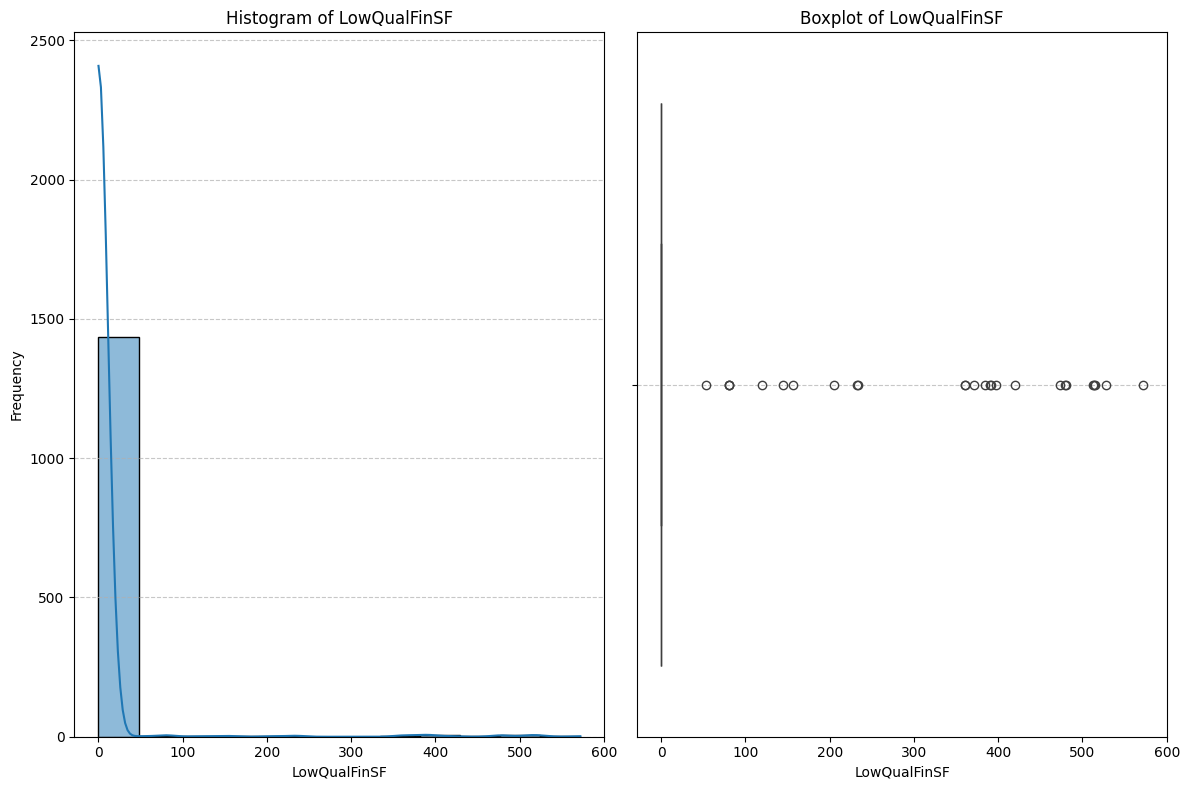

In [23]:
univariate_analyzer.analyze(df, 'LowQualFinSF')

#### Insight:
- The histogram of LowQualFinSF (low-quality finished square footage) reveals a highly right-skewed distribution, with the vast majority of properties having zero square footage for low-quality finished areas. This suggests that most properties in the dataset do not have any low-quality finished spaces.
- The boxplot shows several outliers above 100 square feet, representing properties with relatively larger areas of low-quality finishing.
#### Implication:
- Since most properties have zero values for LowQualFinSF, this feature could be converted into two components:
    - A binary indicator (e.g., LowQualFinSF > 0) to capture the presence of low-quality finished areas.
    - A numerical feature for non-zero values to quantify the size of such areas.
- The skewness indicates that transformations may not be necessary unless the non-zero values play a significant role in modeling. However, their rarity might limit their predictive contribution.
### GrLivArea

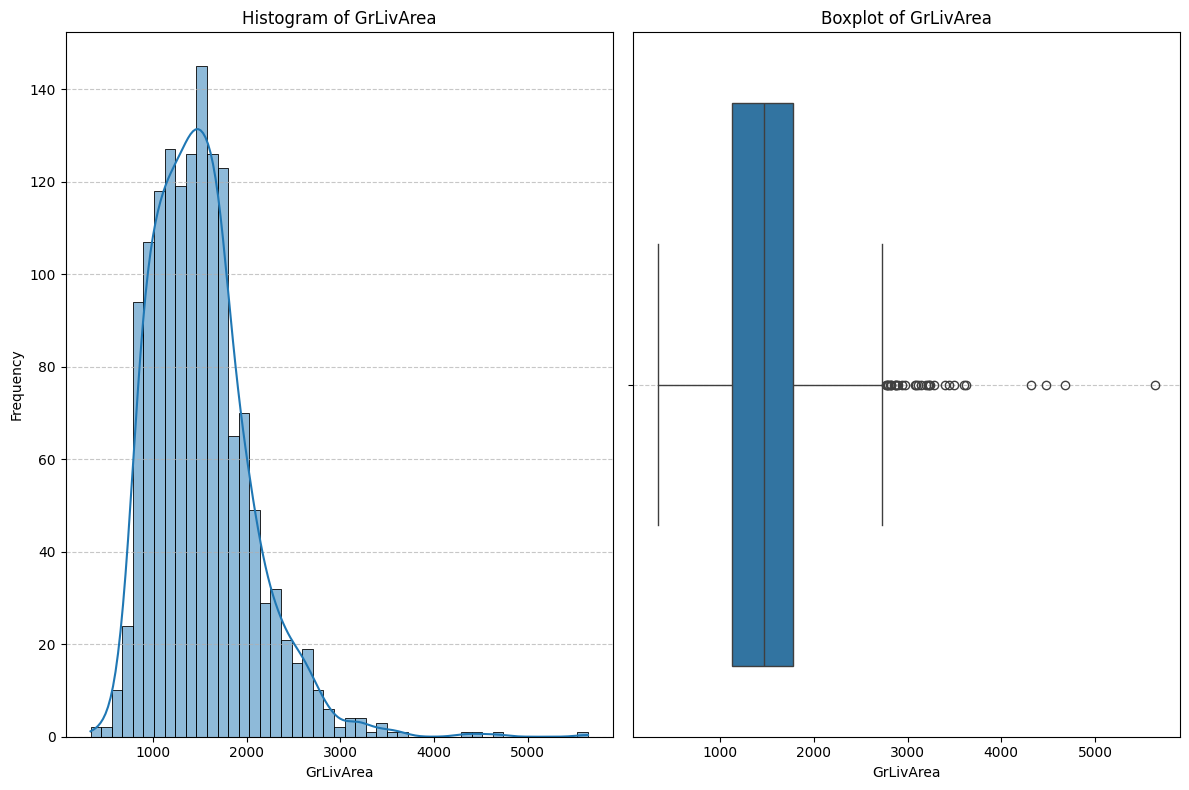

In [24]:
univariate_analyzer.analyze(df, 'GrLivArea')

#### Insight:
- The histogram of GrLivArea (above-ground living area) exhibits a slightly right-skewed distribution, with most properties having living areas between around 800 and 2,000 square feet. The distribution peaks around 1,500 square feet.
- The boxplot highlights a few outliers with exceptionally large living areas exceeding 3,000 square feet, which may represent luxury or custom-built properties.
#### Implication:
- The slight skewness and presence of outliers suggest that a log transformation could stabilize the variance and normalize the distribution, especially for models sensitive to skewness.
- `GrLivArea` is likely one of the strongest predictors of property value (`SalePrice`), as living area is typically directly correlated with home prices.
- The outliers may disproportionately influence models like linear regression. Careful handling, such as capping or separate analysis of luxury properties, might be required.
### BsmtFullBath

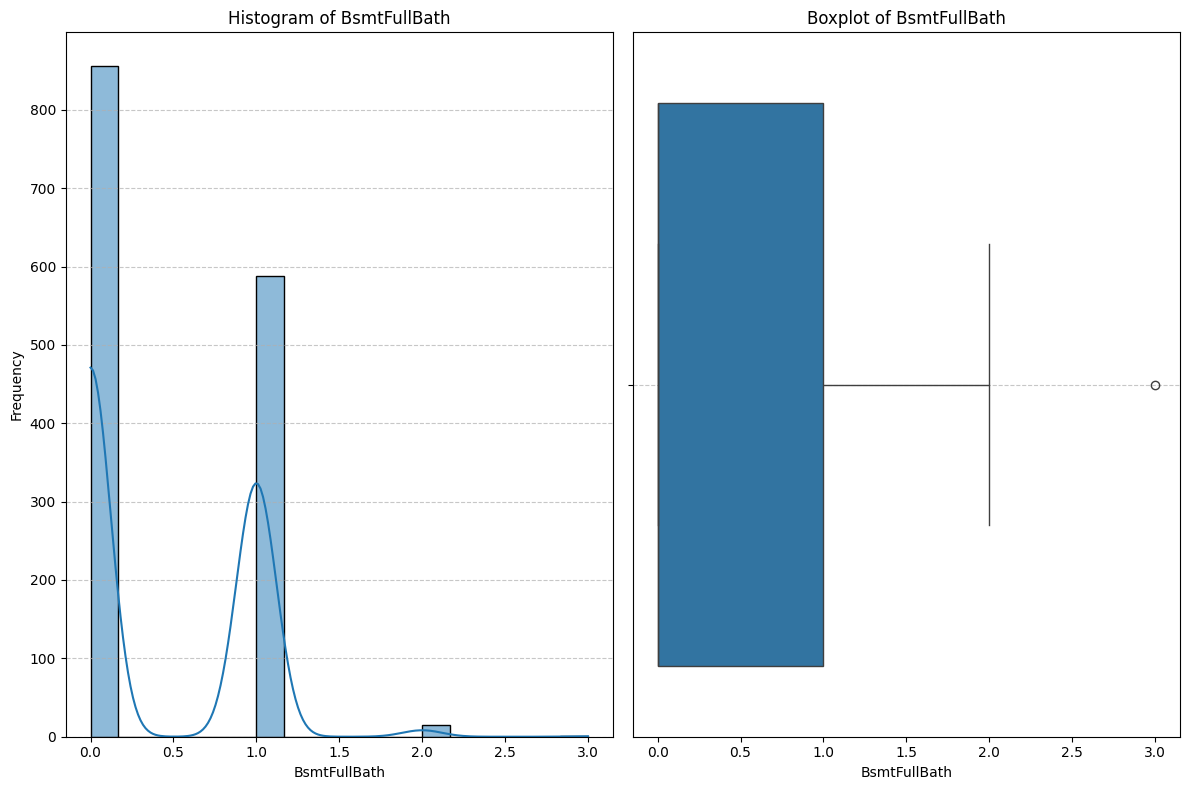

In [25]:
univariate_analyzer.analyze(df, 'BsmtFullBath')

#### Insight:
- The histogram of `BsmtFullBath` (number of full bathrooms in the basement) reveals a discrete distribution, with the majority of properties having either 0 or 1 full bathroom in the basement. Very few properties have more than 1 full basement bathroom.
- The boxplot confirms this trend, with minimal variation and one noticeable outlier where a property has 3 basement full bathrooms.
#### Implication:
- Since the variable is discrete and dominated by 0 and 1, it should be treated as a categorical variable in predictive models. If the presence of a basement bathroom strongly correlates with property value, I will consider creating a binary feature to indicate its presence.
- Properties with multiple basement bathrooms (outliers) might represent luxury homes or unique designs.
### BsmtHalfBath

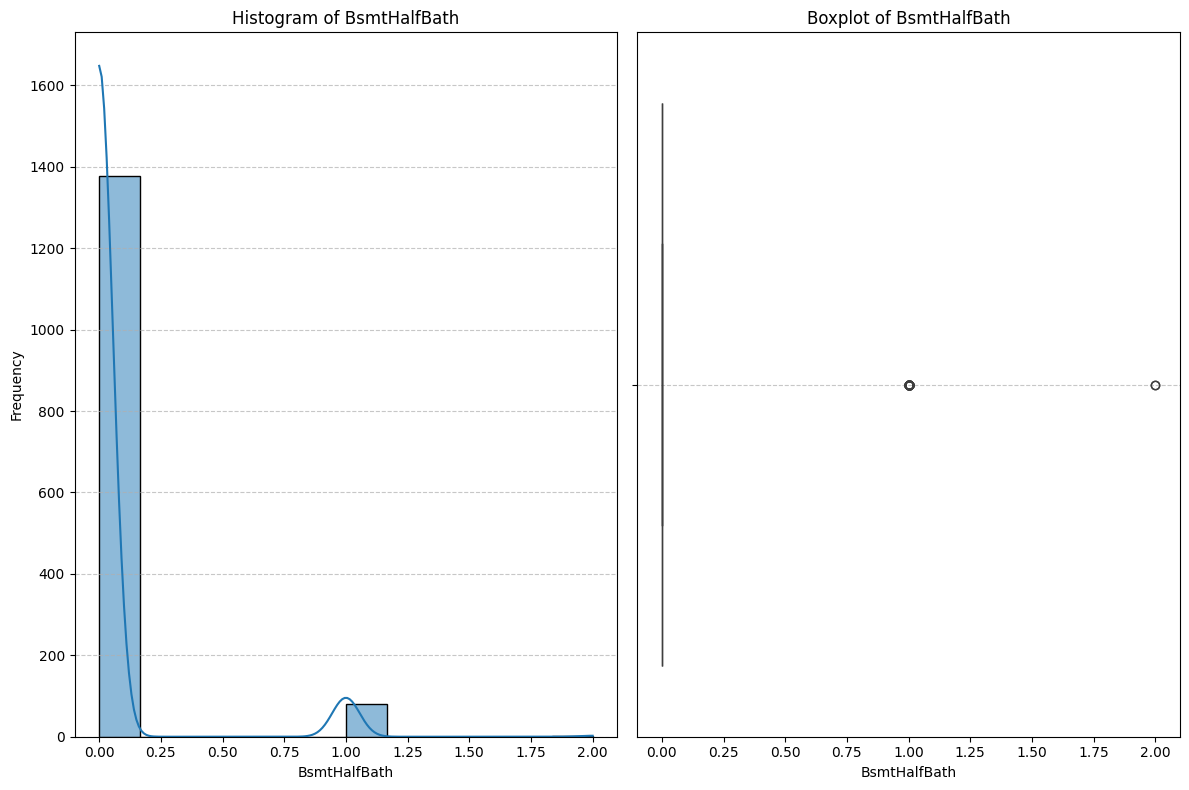

In [26]:
univariate_analyzer.analyze(df, 'BsmtHalfBath')

#### Insight:
- The histogram of `BsmtHalfBath` (number of half bathrooms in the basement) shows that the vast majority of properties have zero half bathrooms in the basement, with a small proportion having one. Very few properties have two half bathrooms, which appear as outliers in the boxplot.
- The boxplot confirms a sparse distribution, with most values concentrated at zero and very little variation.
#### Implication:
- Given the high frequency of zero values, this feature can be simplified into a binary variable indicating the presence of a half bathroom in the basement to improve model interpretability.
- Properties with more than one half bathroom are rare outliers. These may represent unique property configurations and could either be capped or treated separately.
- Since `BsmtHalfBath` likely has limited predictive power due to its sparsity, its correlation with the target variable should be evaluated to determine its relevance in modeling.
### FullBath

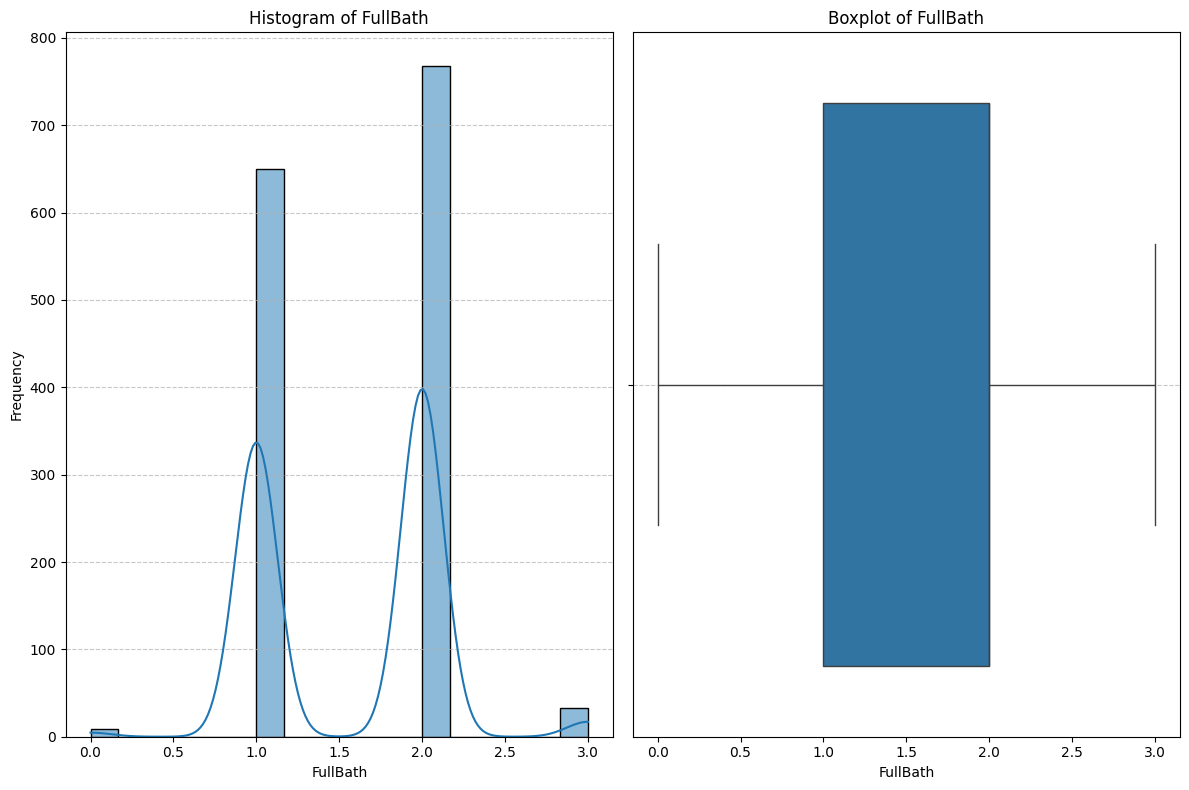

In [27]:
univariate_analyzer.analyze(df, 'FullBath')

#### Insight:
- The histogram of FullBath (number of full bathrooms above ground) shows a discrete distribution, with the majority of properties having either 1 or 2 full bathrooms. A smaller proportion has no full bathroom or more than 2 full bathrooms.
- The boxplot reveals that most of the data falls within the range of 1–2 bathrooms, with no significant outliers.
#### Implication:
- As a discrete variable, FullBath is already well-suited for predictive modeling without requiring transformations.
- The majority of properties having 1–2 full bathrooms indicates this feature's strong potential as a predictor, especially when combined with other space-related variables like GrLivArea.
- Homes with more than 2 full bathrooms, while less frequent, could represent higher-end properties
### HalfBath

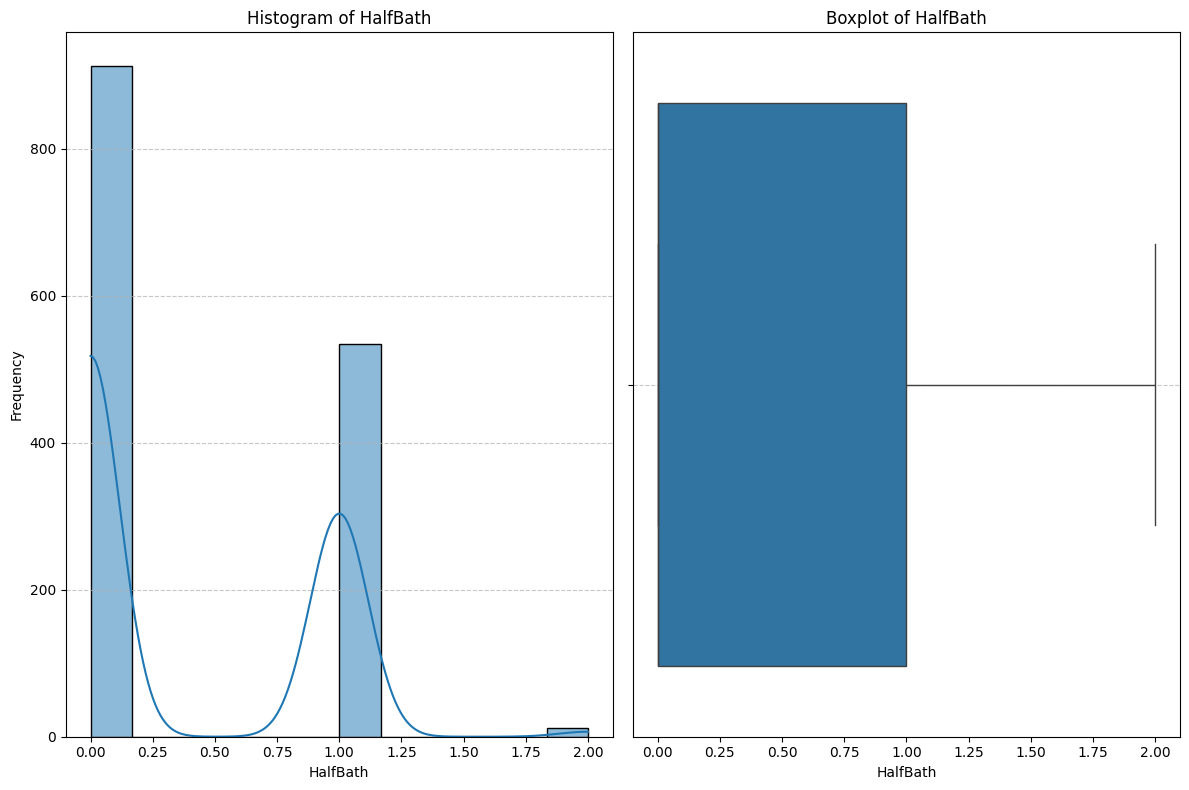

In [28]:
univariate_analyzer.analyze(df, 'HalfBath')

#### Insight:
- The histogram of `HalfBath` (number of half bathrooms above ground) shows a discrete distribution, with most properties having either 0 or 1 half bathroom. Very few properties have 2 half bathrooms.
- The boxplot aligns with the histogram, confirming the concentration of values at 0 and 1, with a smaller range of variability and no significant outliers.
#### Implication:
- As a discrete variable with a simple range of values, `HalfBath` can be used directly in predictive models or converted into a binary indicator (e.g., presence of a half bathroom, HalfBath > 0) if necessary for model interpretability.
- Properties with 2 half bathrooms are relatively rare and might represent unique or larger homes.
- Since bathrooms are a key factor in property valuation, this feature likely has a significant relationship with `SalePrice` and should be analyzed alongside other related variables like `FullBath`.

### BedroomAbvGr

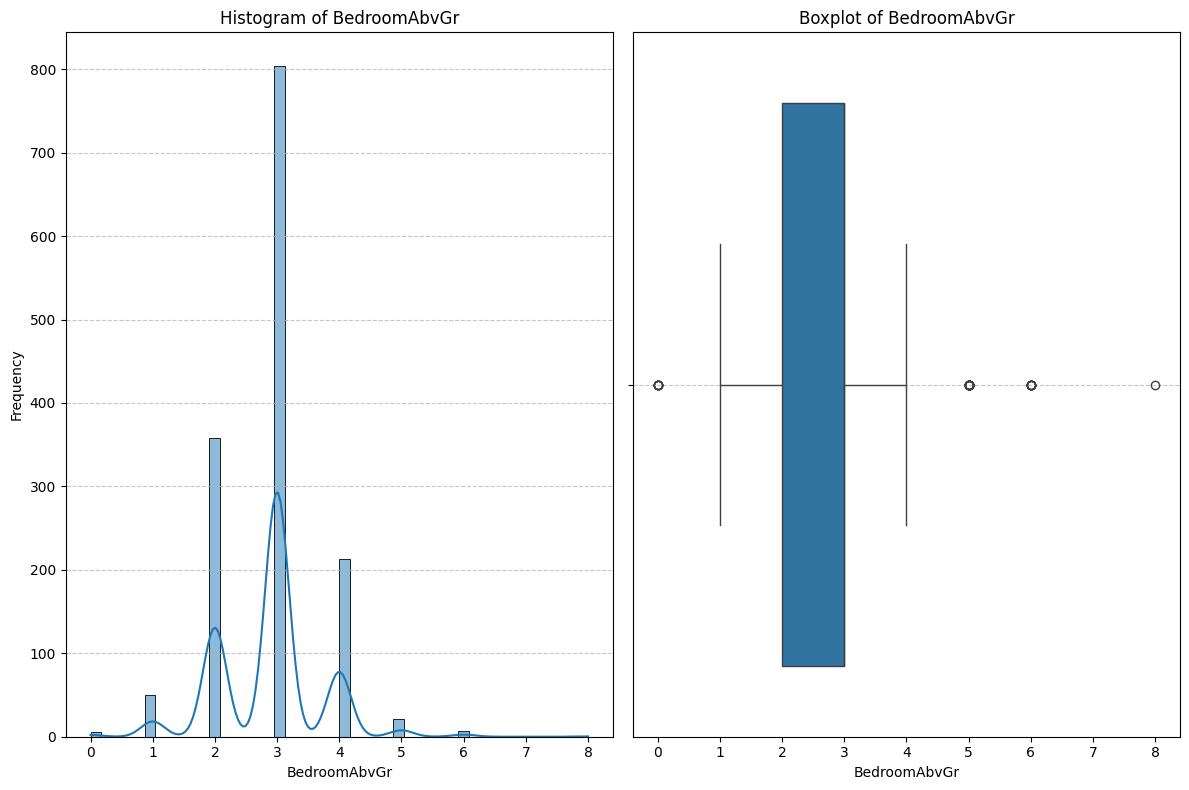

In [29]:
univariate_analyzer.analyze(df, 'BedroomAbvGr')

#### Insight:
- The histogram of `BedroomAbvGr` (number of bedrooms above ground) shows a discrete distribution, with the majority of properties having 2 or 3 bedrooms. Properties with 0, 1, or more than 3 bedrooms are relatively rare.
- The boxplot confirms this trend, with most properties falling within the interquartile range (2–3 bedrooms). A few properties with more than 4 bedrooms appear as mild outliers.
#### Implication:
- As a discrete variable with a compact range, BedroomAbvGr can be used directly in predictive models or analyzed as a categorical variable.
- Properties with unusually high or low numbers of bedrooms may correspond to unique property types (e.g., very small or luxury homes). These could be treated as special cases or analyzed separately depending on their relationship with the target variable (`SalePrice`).
- Bedrooms are often an important predictor of property value, but their impact may vary depending on how they interact with other features like `GrLivArea` or the number of bathrooms. Evaluating these relationships could enhance feature engineering and model performance.
### KitchenAbvGr

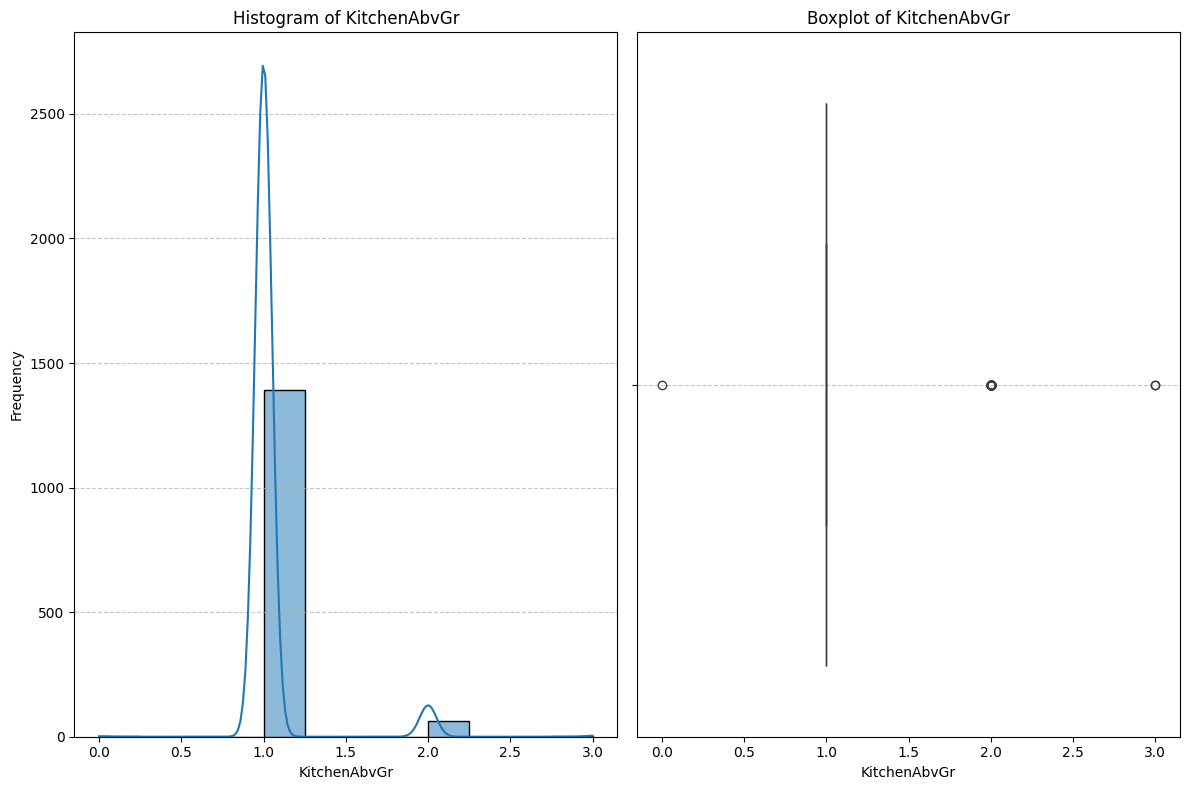

In [30]:
univariate_analyzer.analyze(df, 'KitchenAbvGr')

#### Insight:
- The histogram of `KitchenAbvGr` (number of kitchens above ground) shows a discrete distribution, with the majority of properties having exactly 1 kitchen. A very small proportion of properties have 2 kitchens, and even fewer have 3.
- The boxplot reflects this pattern, with almost all values clustered at 1. Properties with more than 1 kitchen are rare outliers.
#### Implication:
- Since most properties have 1 kitchen, this variable can be treated as categorical or binary, with a separate category for outliers (e.g., "multiple kitchens").
- The outliers with 2 or more kitchens likely represent unique or luxury properties. Analyzing their correlation with the target variable (`SalePrice`) may reveal whether these properties significantly impact predictions.
- Given the lack of variability in this feature, its overall importance in modeling may be limited unless multiple kitchens are strongly associated with higher property values.
### TotRmsAbvGrd

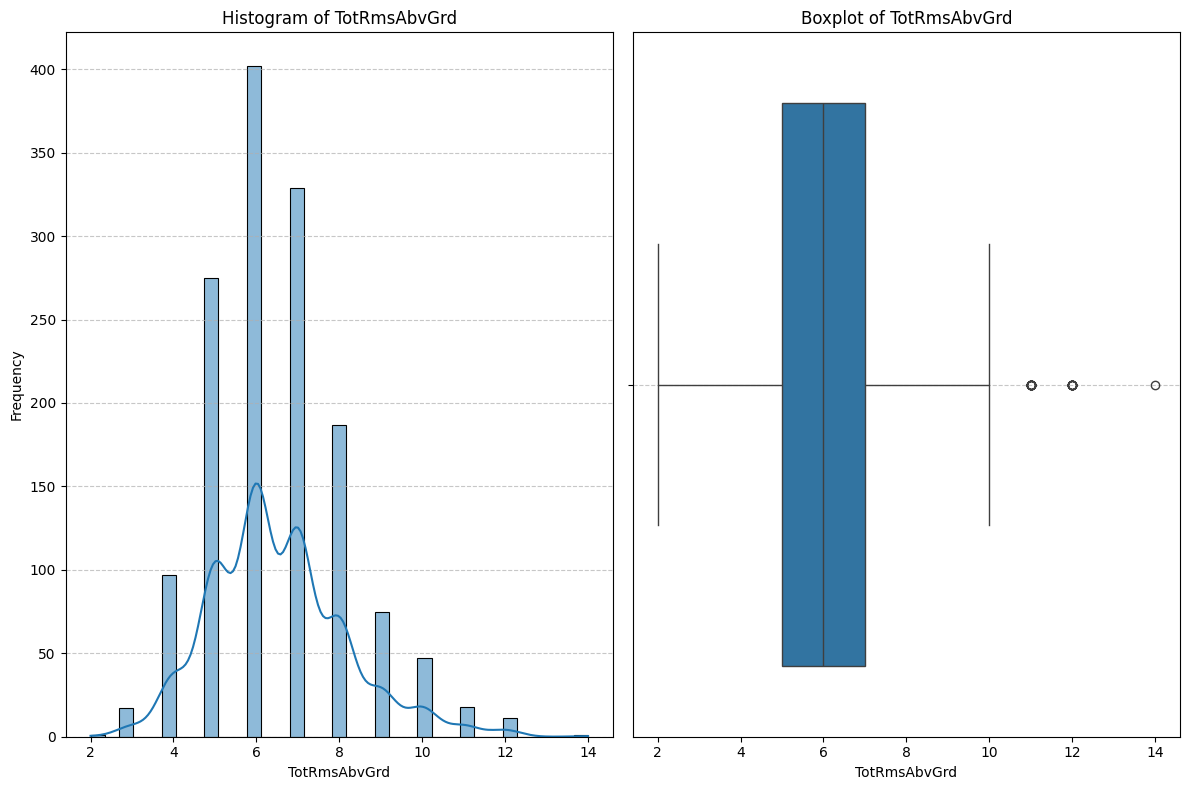

In [31]:
univariate_analyzer.analyze(df, 'TotRmsAbvGrd')

#### Insight:
- The histogram of `TotRmsAbvGrd` (total rooms above ground) shows a distribution centered around 5 to 8 rooms, with a peak at 6 rooms. Properties with fewer than 4 rooms or more than 10 rooms are relatively rare.
- The boxplot highlights that most properties fall within the range of 5 to 8 rooms. A few properties with more than 10 rooms are identified as outliers.
#### Implication:
- As a discrete numerical variable, `TotRmsAbvGrd` can be used directly in predictive models. The variability in the number of rooms makes it a potentially significant feature for property valuation, likely correlating with `GrLivArea` and `SalePrice`.
- The outliers (homes with more than 10 rooms) likely represent larger or luxury properties and may need separate handling depending on their influence on the target variable.
- If needed for interpretability, `TotRmsAbvGrd` can be grouped into categories (e.g., small, medium, large homes) or analyzed alongside other features like the number of bedrooms and bathrooms to assess combined living space.
### Fireplaces

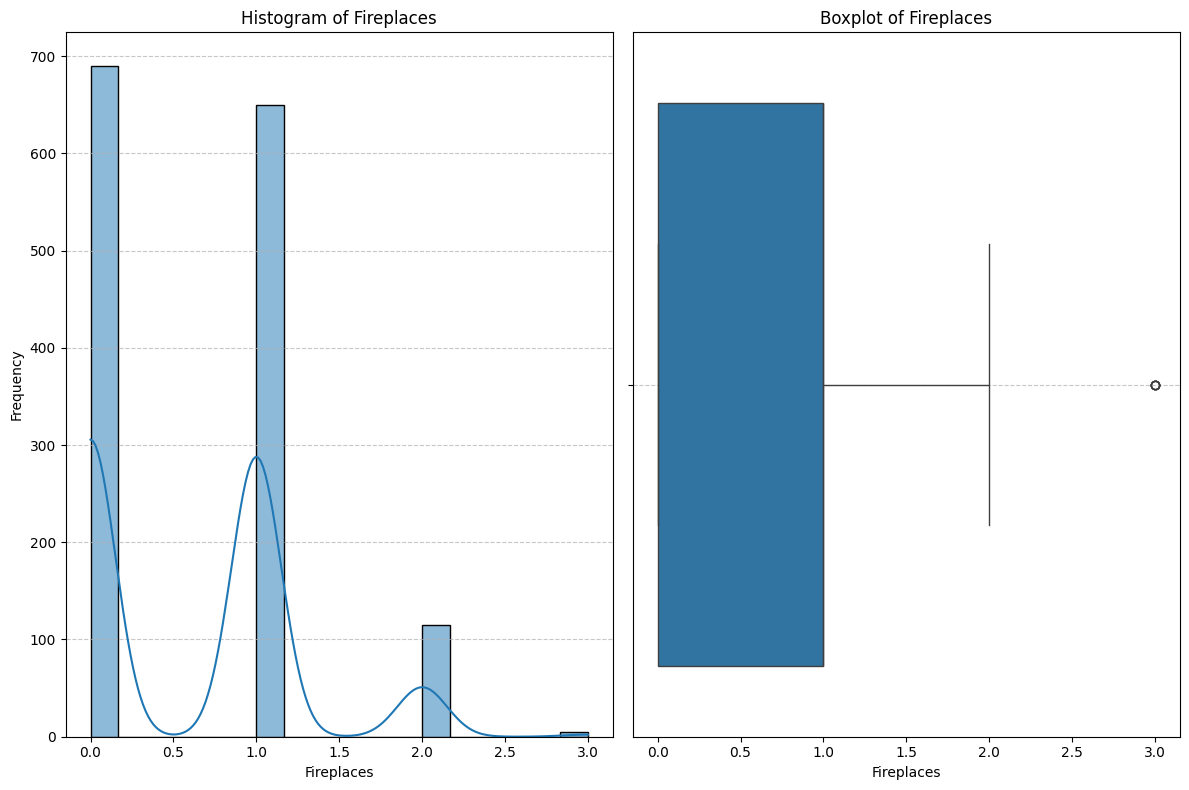

In [32]:
univariate_analyzer.analyze(df, 'Fireplaces')

#### Insight:
- The histogram of `Fireplaces` (number of fireplaces in a property) shows a discrete distribution, with the majority of properties having either 0 or 1 fireplace. A smaller proportion of properties have 2 fireplaces, and very few have 3.
- The boxplot confirms this trend, with the majority of properties having no fireplaces or 1 fireplace. Properties with 3 fireplaces are rare and appear as outliers.
### Implication:
- Since most properties have either no fireplaces or one, this variable can be treated as a categorical or binary feature.
- Properties with 2 or more fireplaces might represent luxury homes, which could have a strong correlation with `SalePrice`. These outliers may need further analysis to assess their impact on predictive models.
- As fireplaces are often considered a desirable feature in homes, this variable likely has some influence on property valuation. Exploring its interaction with other variables (e.g., `GrLivArea` or `TotRmsAbvGrd`) could provide additional insights.
### GarageYrBlt

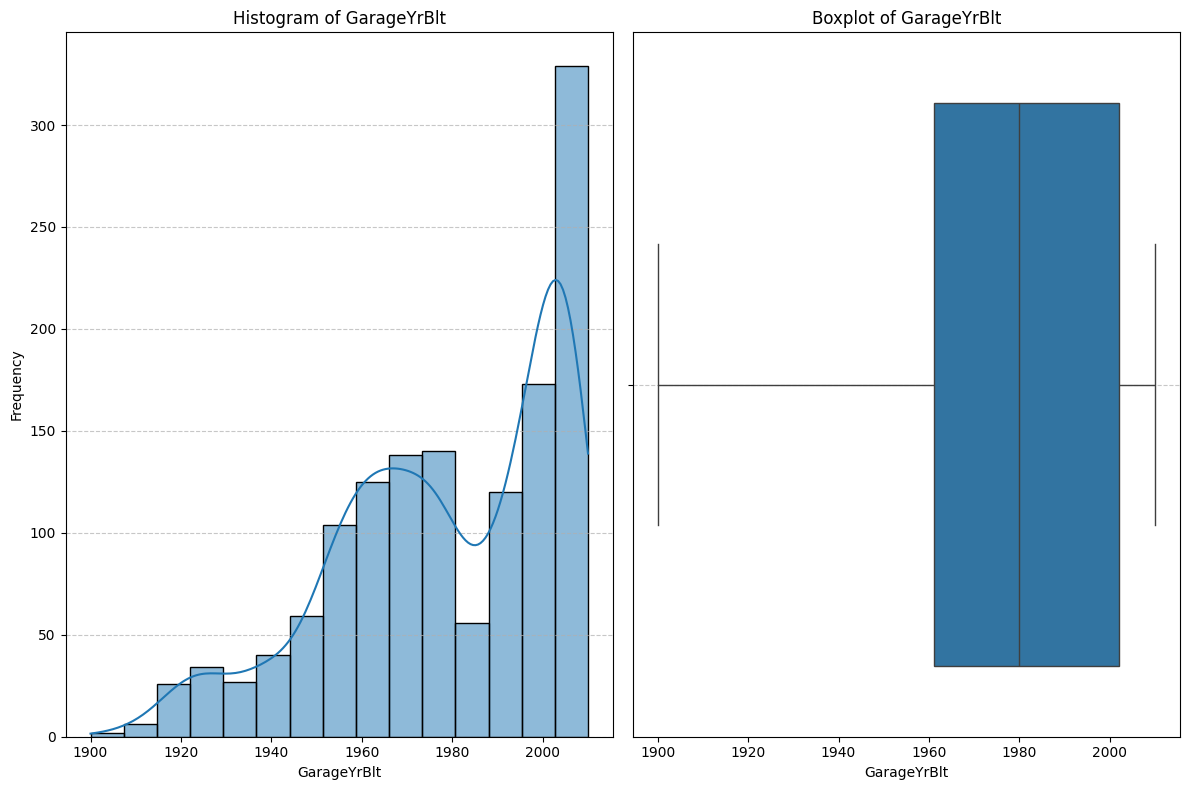

In [33]:
univariate_analyzer.analyze(df, 'GarageYrBlt')

#### Insight:
- The histogram of `GarageYrBlt` (year the garage was built) shows a distribution skewed toward more recent years, with a significant peak around the 2000s. Older garages (pre-1950) are relatively rare, and the frequency gradually increases from 1950 onward.
- The boxplot confirms that the majority of garages were built between 1950 and 2000.
#### Implication:
- `GarageYrBlt` could be used as a numerical variable or transformed into age by subtracting it from the current year (e.g., GarageAge = CurrentYear - GarageYrBlt). This transformation might better capture the impact of garage age on property value.
- The distribution aligns with the general property trends, and its correlation with `SalePrice` should be analyzed. Newer garages might add more value to a property, making this feature an important predictor.
### GarageCars

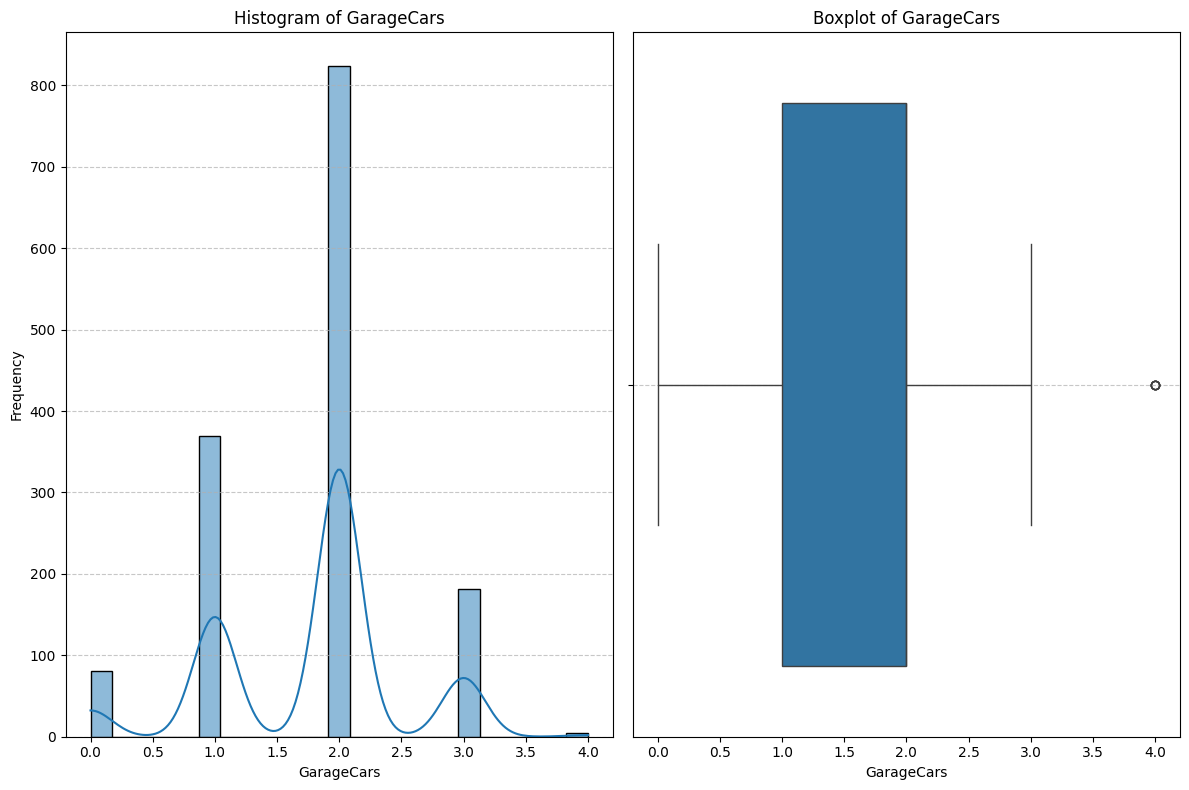

In [34]:
univariate_analyzer.analyze(df, 'GarageCars')

#### Insight:
- The histogram of `GarageCars` (number of cars the garage can hold) shows a discrete distribution, with the majority of properties having garages that can hold 2 cars. A significant portion also has 1-car garages, and a smaller number have garages for 3 cars. Garages accommodating 0 or 4 cars are rare.
- The boxplot confirms that most values fall between 1 and 2 cars, with properties having 4-car garages appearing as outliers.
#### Implication:
- As a discrete variable, `GarageCars` can be directly used in predictive models or analyzed as a categorical feature.
- Properties with larger garages (3 or more cars) likely represent higher-end homes and could be important in explaining variations in property value (`SalePrice`). Exploring the relationship between `GarageCars` and the target variable could provide insights into its predictive significance.
- For properties with no garages, additional analysis could be performed to assess their impact on property value, as these properties might belong to a distinct segment of the market.
### GarageArea

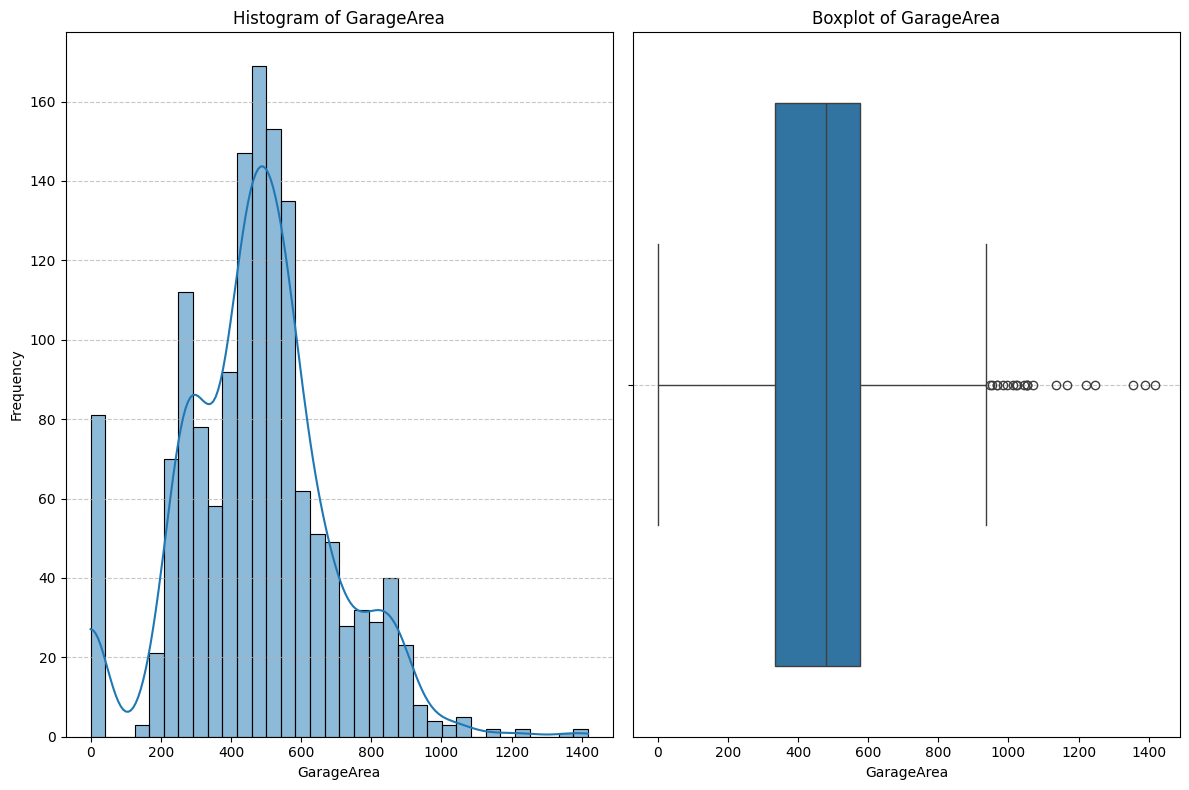

In [35]:
univariate_analyzer.analyze(df, 'GarageArea')

#### Insight:
- The histogram of `GarageArea` (total square footage of the garage) shows a right-skewed distribution, with most garages having an area between 200 and 600 square feet. A small number of garages have a larger area, exceeding 1,000 square feet.
- The boxplot confirms that the majority of garage areas are concentrated around the interquartile range of 200–600 square feet, with outliers representing garages with very large areas.
#### Implication:
- `GarageArea` is a continuous variable and can be used directly in predictive models. The skewness suggests that a log transformation may be useful to normalize the distribution if required for linear models.
- Larger garages (outliers) may indicate luxury properties, which could have a significant impact on `SalePrice`.
- `GarageArea` is likely highly correlated with `GarageCars`, but it provides more granularity and may capture differences between properties with similar car capacities but varying total garage space.
### WoodDeckSF

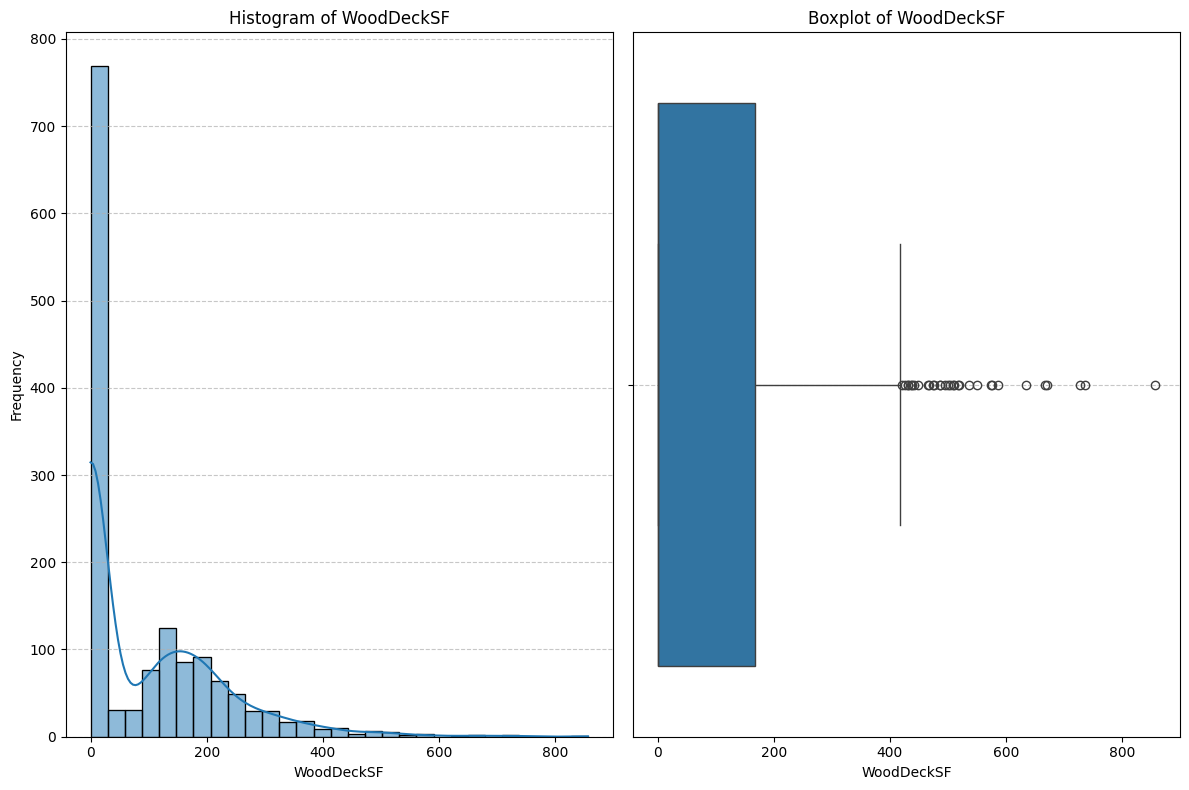

In [36]:
univariate_analyzer.analyze(df, 'WoodDeckSF')

#### Insight:
- The histogram of `WoodDeckSF` (square footage of wood decks) is highly right-skewed, with a large proportion of properties having no wood decks or very small decks (under 200 square feet). There are relatively few properties with decks larger than 400 square feet, and the distribution tails off significantly.
- The boxplot confirms that the majority of values lie below 200 square feet, with a few outliers representing very large decks exceeding 400 square feet.
#### Implication:
- This skewness indicates that most properties either do not have wood decks or have modestly sized ones. Larger wood decks may be associated with higher property values, but they represent a smaller subset of properties.
- If used in predictive models, a log or square root transformation might help to normalize this feature, especially if it is correlated with the target variable (`SalePrice`).
- Properties with very large decks (outliers) could be unique in terms of property design or luxury features. These cases should be analyzed further to understand their impact on the dataset.
### OpenPorchSF

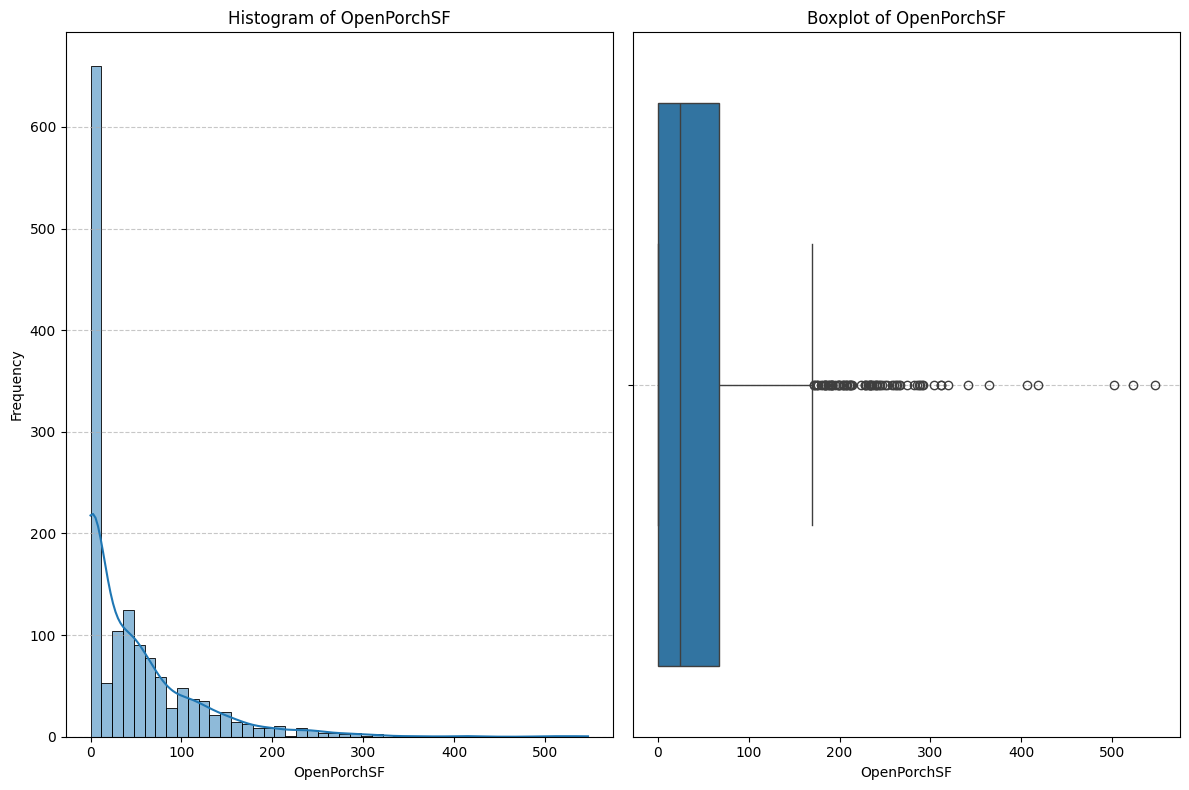

In [37]:
univariate_analyzer.analyze(df, 'OpenPorchSF')

#### Insight:
- The histogram of `OpenPorchSF` (square footage of open porches) shows a highly right-skewed distribution. A significant proportion of properties have no open porches, with a steep decline in frequency as the square footage increases.
- The boxplot confirms that most properties have open porch square footage below 100, with several outliers extending beyond 180 square feet. These outliers represent properties with exceptionally large open porches.
#### Implication:
- The skewness suggests that open porches are either absent or relatively small in most properties. Larger open porches might add unique value to these properties and could be considered a luxury feature.
- A log or square root transformation of `OpenPorchSF` could normalize the data for use in models, particularly if this feature significantly impacts the target variable (`SalePrice`).
- It may be worth investigating the correlation between `OpenPorchSF` and property value to determine its predictive power.
### EnclosedPorch

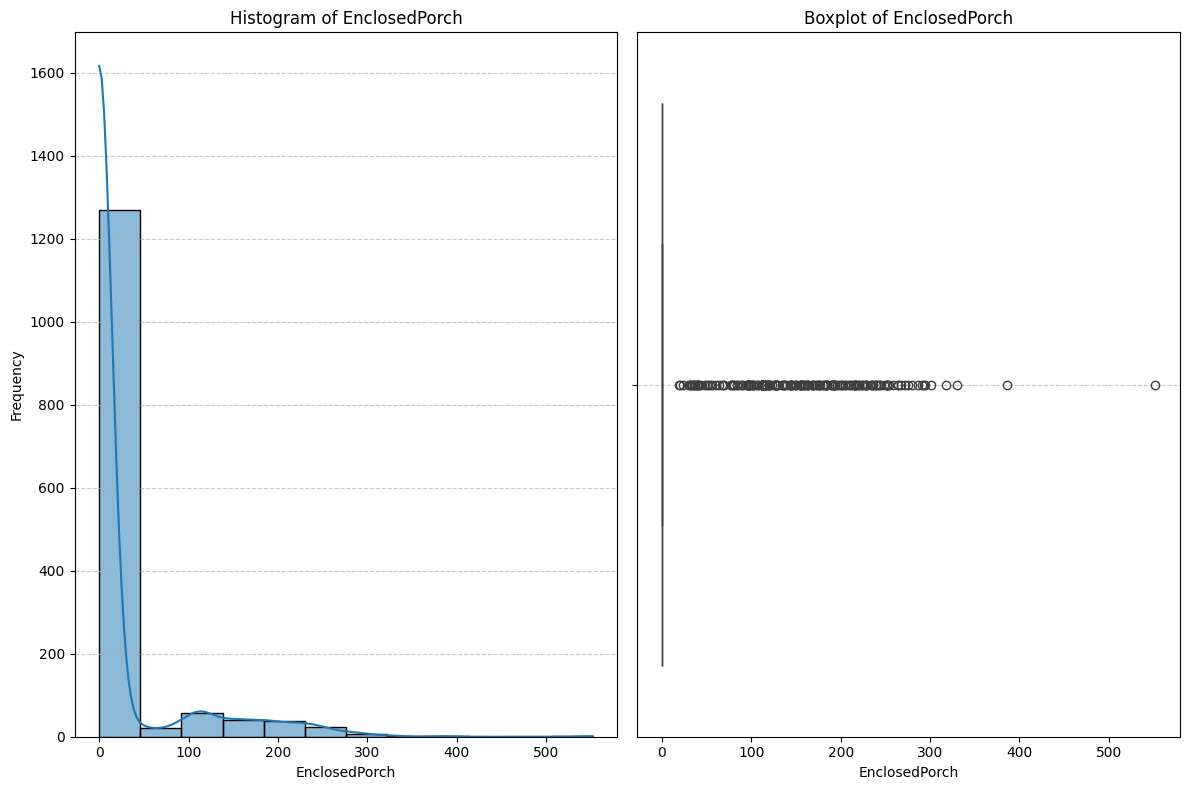

In [38]:
univariate_analyzer.analyze(df, 'EnclosedPorch')

#### Insight:
- The histogram of `EnclosedPorch` (square footage of enclosed porches) shows a highly right-skewed distribution, with most properties having zero square footage. A small percentage of properties have enclosed porches, typically less than 100 square feet.
- The boxplot corroborates this observation, with the bulk of the data lying close to zero and a few outliers extending beyond 300 square feet.
#### Implication:
- `EnclosedPorch` appears to be a rare feature, indicating it may be a distinguishing factor for certain homes. Its sparse nature suggests it might have limited influence on models unless heavily weighted or correlated with high property values.
- If this feature shows a strong relationship with the target variable, I will consider treating it as a categorical feature (presence vs. absence) or applying a transformation to normalize its skewed distribution.
### 3SsnPorch

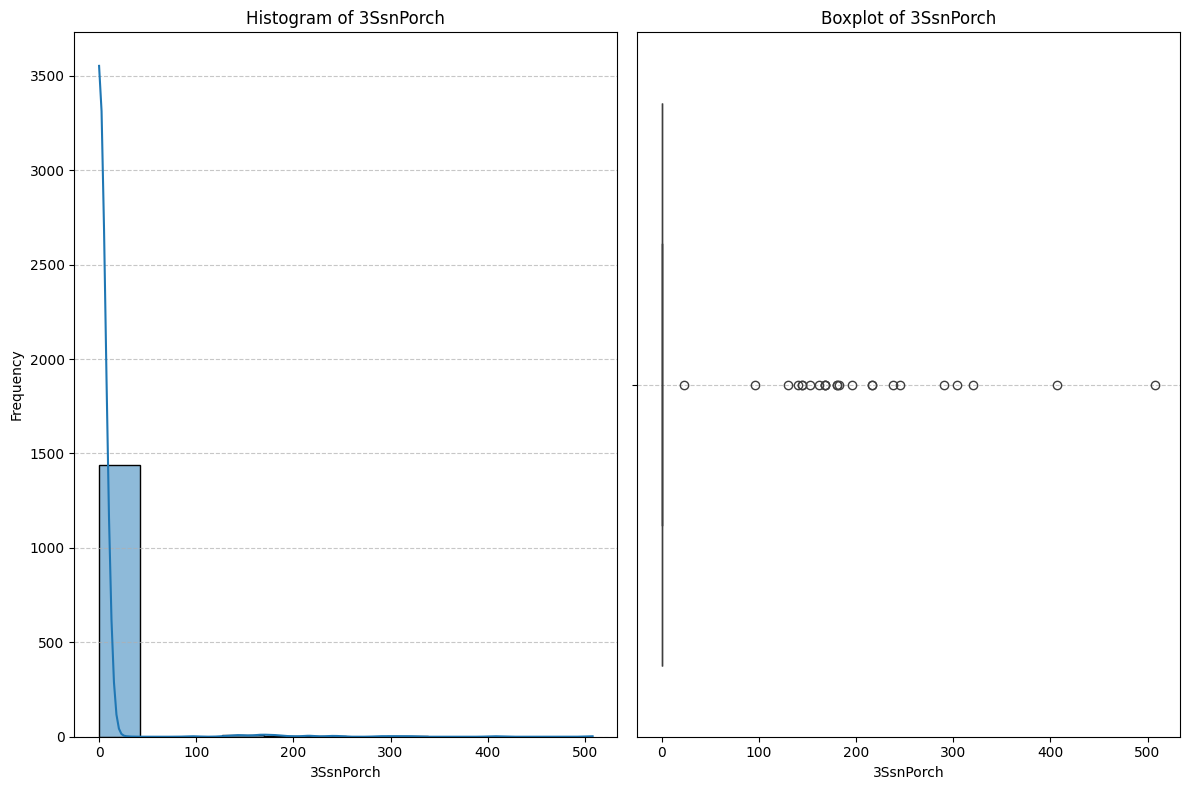

In [39]:
univariate_analyzer.analyze(df, '3SsnPorch')

#### Insight:
- The histogram for `3SsnPorch` (three-season porch area) shows that the vast majority of houses have no three-season porch. A small number of properties have some three-season porch area, typically below 150 square feet.
- The boxplot reveals a similar pattern, with most data concentrated at zero, and a few outliers with higher square footage extending up to 500 square feet.
#### Implication:
- This feature is sparse, with many zero values indicating no three-season porch for most properties. For modeling purposes, it might be beneficial to treat this as a binary feature or considering its sparsity while engineering features.
- If the feature shows a significant correlation with the target variable, its impact may be amplified by its rarity.
### ScreenPorch

In [40]:
univariate_analyzer.analyze(df, 'ScreenPorch')

#### Insight:
- The histogram for `ScreenPorch` (screened porch area) shows a highly skewed distribution with most homes having no screened porch area.
- The boxplot highlights that a significant portion of the data is at zero, with a small number of properties having values ranging up to 500 square feet. Outliers are evident, as indicated by the dots far above the whiskers.
#### Implication:
- This feature is sparse, similar to 3SsnPorch. For analysis and modeling:
    - It could be transformed into a binary variable indicating the presence or absence of a screened porch.
    - Alternatively, further statistical tests can assess its correlation with the target variable to justify its inclusion in the model.
- If retained as is, the feature may require normalization or handling of outliers during preprocessing.
### PoolArea

In [41]:
univariate_analyzer.analyze(df, 'PoolArea')

#### Insight:
- The histogram for `PoolArea` (pool area in square feet) is heavily skewed, with most values at zero, indicating that the majority of properties in the dataset do not have pools.
- The boxplot confirms this, showing a narrow interquartile range (IQR) near zero and a few significant outliers for properties with pools.
#### Implication:
- This variable has a high sparsity, making it a potential candidate for transformation into a binary indicator (e.g., HasPool: 1 for non-zero values and 0 otherwise).
- Alternatively, properties with pools can be analyzed separately, as they represent a distinct group that may influence certain outcomes.
### MiscVal

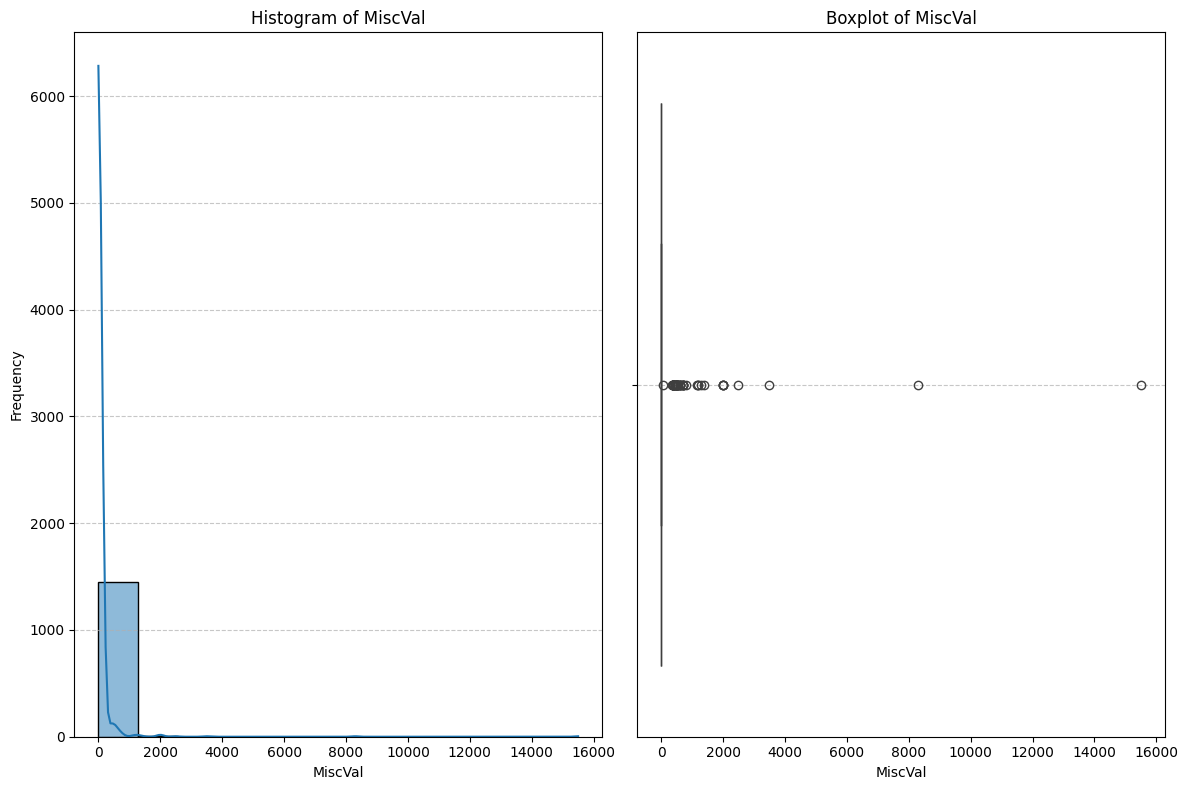

In [42]:
univariate_analyzer.analyze(df, 'MiscVal')

#### Insight:
- The histogram for `MiscVal` (miscellaneous feature value) is highly skewed, with most values concentrated at zero. This indicates that a majority of properties do not have significant miscellaneous feature values.
- The boxplot reveals a few extreme outliers, which likely represent properties with unusually high miscellaneous feature values.
#### Implication:
- Similar to PoolArea, this variable exhibits high sparsity. Converting it to a binary indicator (e.g., HasMiscVal: 1 for non-zero values, 0 otherwise) might be beneficial.
- The outliers may warrant further investigation to understand their impact on the dataset (e.g., correlation with property value).
### MoSold

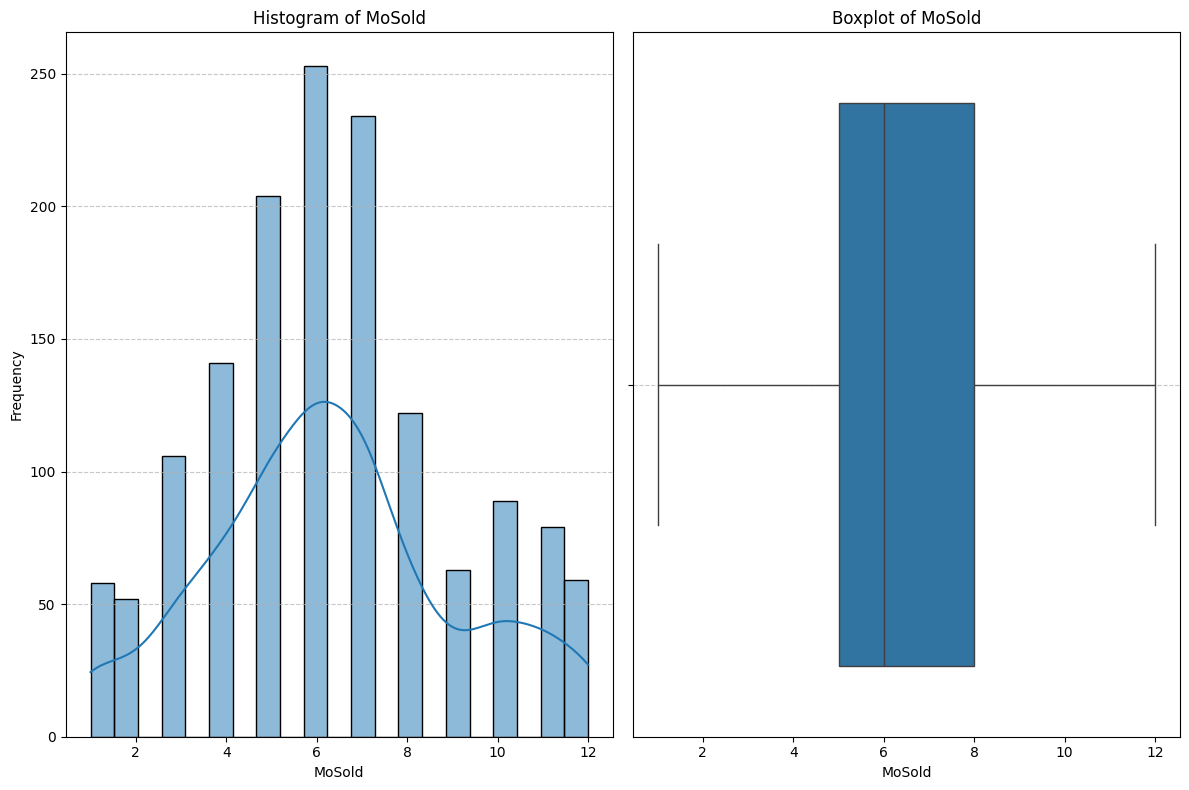

In [43]:
univariate_analyzer.analyze(df, 'MoSold')

#### Insight:
- The histogram for `MoSold` (month of sale) displays a relatively uniform distribution, with a slight peak during the mid-year months (June and July). This suggests a seasonal trend in sales, likely influenced by market demand or weather patterns.
- The boxplot confirms that the values are evenly spread across the months, with no apparent outliers.
#### Implication:
- `MoSold` could potentially be used as a categorical variable to account for seasonality in sales. Encoding the months into seasons (e.g., Winter, Spring, Summer, Fall) might highlight underlying patterns more effectively.
- If combined with other time-related variables (like YrSold), it could provide further insights into trends over time.
### YrSold

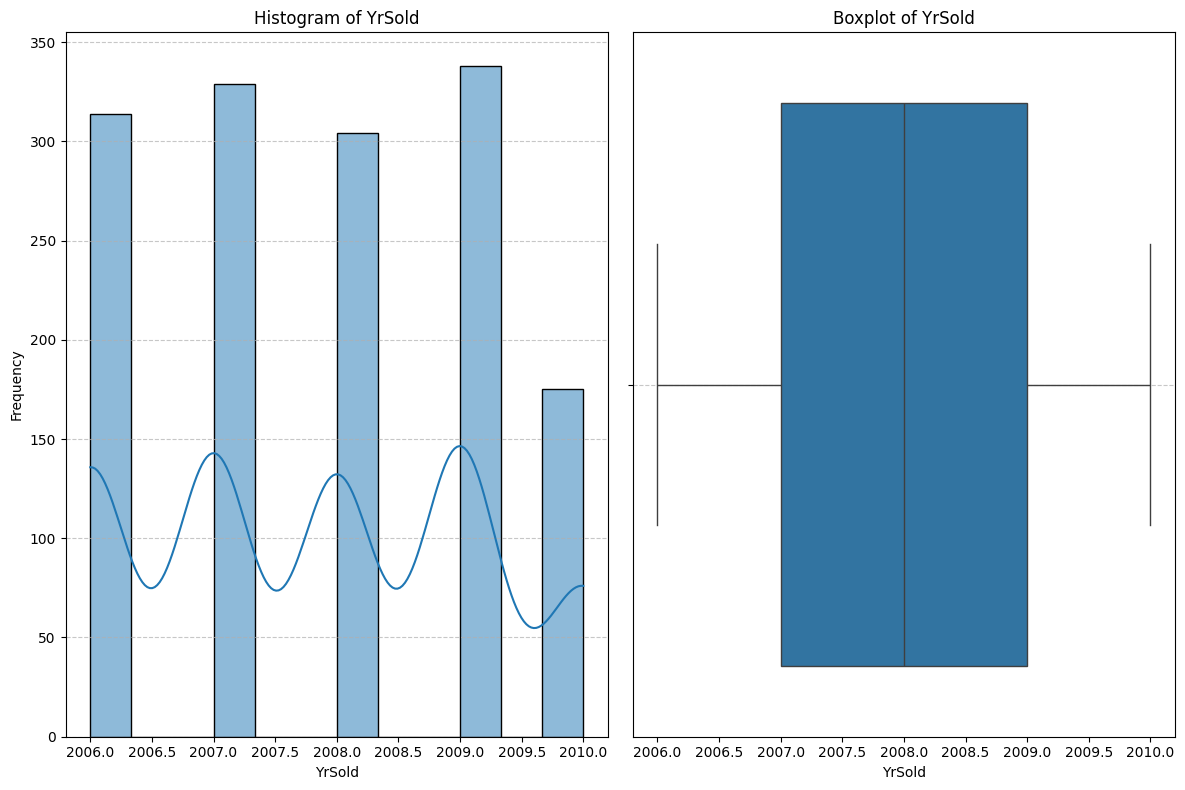

In [44]:
univariate_analyzer.analyze(df, 'YrSold')

#### Insight:
- The histogram for `YrSold` (year of sale) indicates that the number of sales was relatively consistent from 2006 to 2009, with a noticeable drop in 2010. This decline could correspond to external factors like market conditions, economic downturns, or specific regional events.
- The boxplot reflects this consistency, with no extreme outliers across the years.
#### Implication:
- The variable `YrSold` can provide temporal context for sales patterns. However, since it spans only five years, it might be better to use it in conjunction with `MoSold` to capture both yearly and seasonal variations.
- For predictive modeling, you could encode `YrSold` as a categorical variable or as an ordinal one, depending on its importance in understanding trends.
### SalePrice

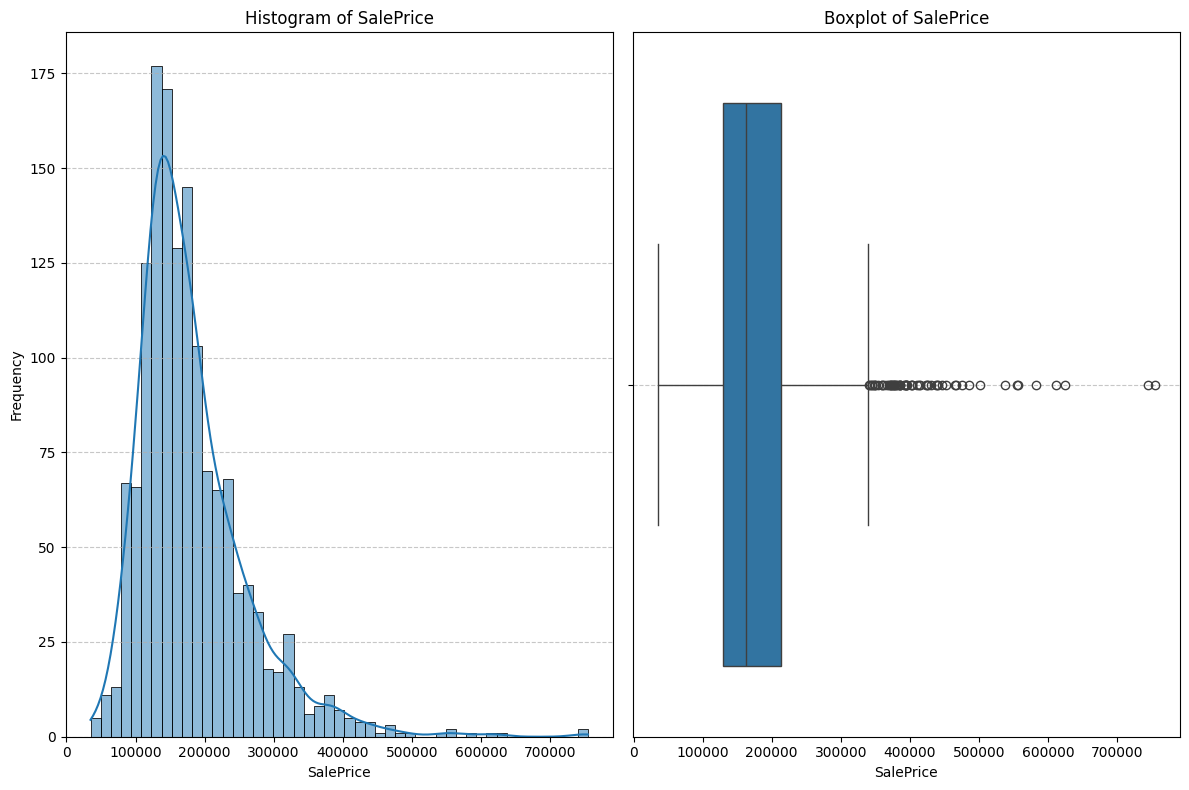

In [8]:
univariate_analyzer.analyze(df, 'SalePrice')

#### Insight:
- The histogram of `SalePrice` exhibits a right-skewed distribution, indicating that most houses are priced in the lower range, with fewer houses at higher price points extending the tail to the right.
- The majority of house prices are concentrated between \$100,000 and \$250,000, with a noticeable peak around $150,000.
- The boxplot confirms the presence of high-value outliers beyond the upper whisker, representing houses that are significantly more expensive than the average.
- The interquartile range (IQR) is relatively narrow, suggesting that most houses fall within a tight price range, while the high-priced houses are exceptions rather than the norm.
#### Implication:
- The right skewness of `SalePrice` suggests that applying a logarithmic transformation may help normalize the distribution, making it more suitable for statistical models that assume normality.
- The presence of high-value outliers could influence model performance, especially in regression analyses where they can disproportionately affect the slope. It may be necessary to investigate these outliers to determine if they are data entry errors or legitimate high-end properties.
- Robust statistical methods or outlier treatment techniques (such as capping or excluding extreme values) might be required to ensure accurate predictive modeling.
- Understanding the distribution of `SalePrice` is crucial for setting realistic expectations in property valuation and for detecting potential anomalies in the data that could skew analysis results.


## Categorical Features

In [45]:
univariate_analyzer = univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())

### MSZoning

In [50]:
univariate_analyzer.analyze(df, 'MSZoning')

#### Insight:
- The feature MSZoning displays a highly imbalanced distribution, with RL (Residential Low Density) being the most common zoning type by a significant margin. Other categories such as RM (Residential Medium Density) and FV (Floating Village Residential) are less frequent, while C (all) (Commercial) and RH (Residential High Density) are rare.
#### Implication:
- The dominance of RL suggests that most properties are in low-density residential zones, which may reflect the target market of the dataset.
- The smaller categories (C (all) and RH) might require careful handling in analysis and modeling to prevent their sparsity from leading to bias or instability.
- For predictive modeling, MSZoning could be encoded as a categorical variable, with techniques like one-hot encoding or frequency encoding. Additionally, grouping infrequent categories into an "other" group may improve model robustness while retaining meaningful insights.
### Street

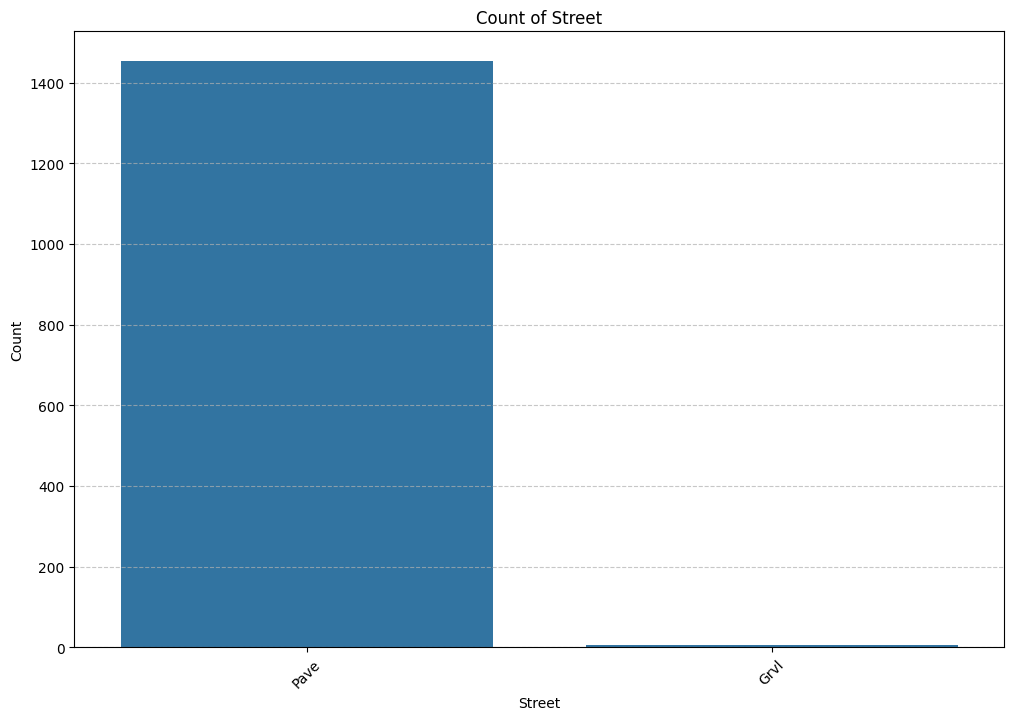

In [51]:
univariate_analyzer.analyze(df, 'Street')

#### Insight:
- The Street feature shows a highly imbalanced distribution, with nearly all observations having a street type of Pave (paved roads). Only a small fraction of the data corresponds to the Grvl (gravel roads) category.
#### Implication:
- This imbalance indicates that most properties are located on paved streets, which could be a factor in their valuation or appeal.
- Due to the sparsity of the Grvl category, its influence on predictive modeling might be limited, and it may contribute more noise than signal. Techniques such as grouping or binary encoding (0 for Grvl and 1 for Pave) could simplify its inclusion in models while retaining its essence.
### Alley

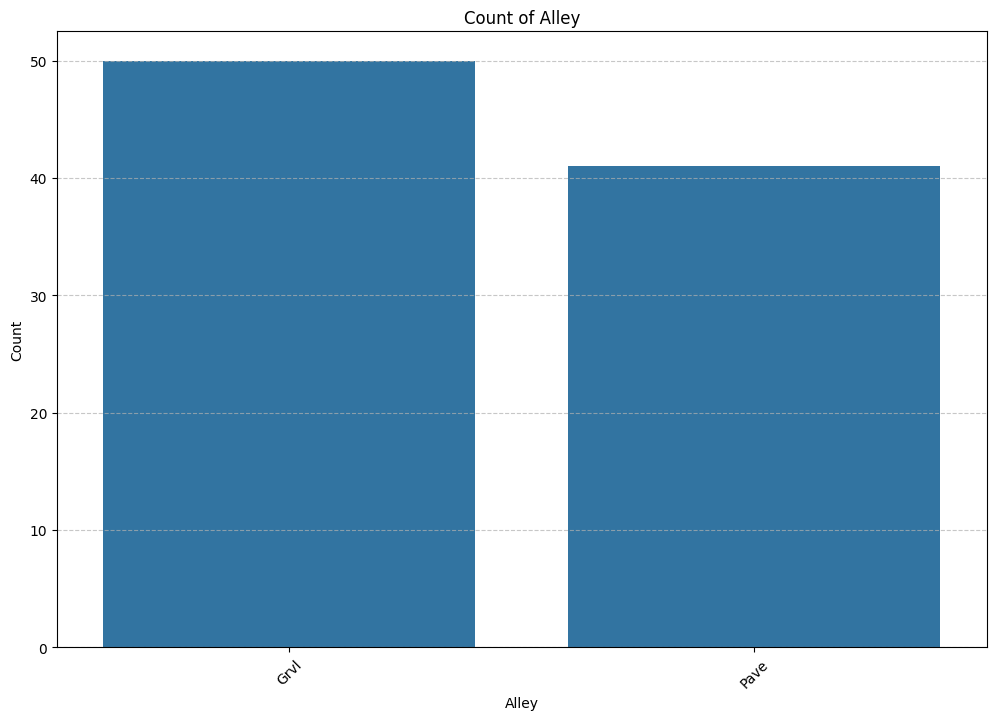

In [52]:
univariate_analyzer.analyze(df, 'Alley')

#### Insight:
- The Alley feature shows a fairly balanced distribution between Grvl (gravel alleys) and Pave (paved alleys), with a slight preference towards Grvl.
- However, the total counts for this feature appear to be relatively low, indicating a large number of missing values in the dataset for this variable.
#### Implication:
- The low representation of this feature in the dataset suggests that it may not be universally applicable to all properties, potentially limiting its usefulness in modeling.
- Since the missing values are not random (i.e., they correspond to properties without alleys), imputation or the addition of a `No Alley` category could improve its representation.
- Encoding strategies like one-hot encoding or binary encoding could be useful, but the feature’s sparse nature may require a more nuanced approach to ensure it contributes positively to predictive modeling.
### LotShape

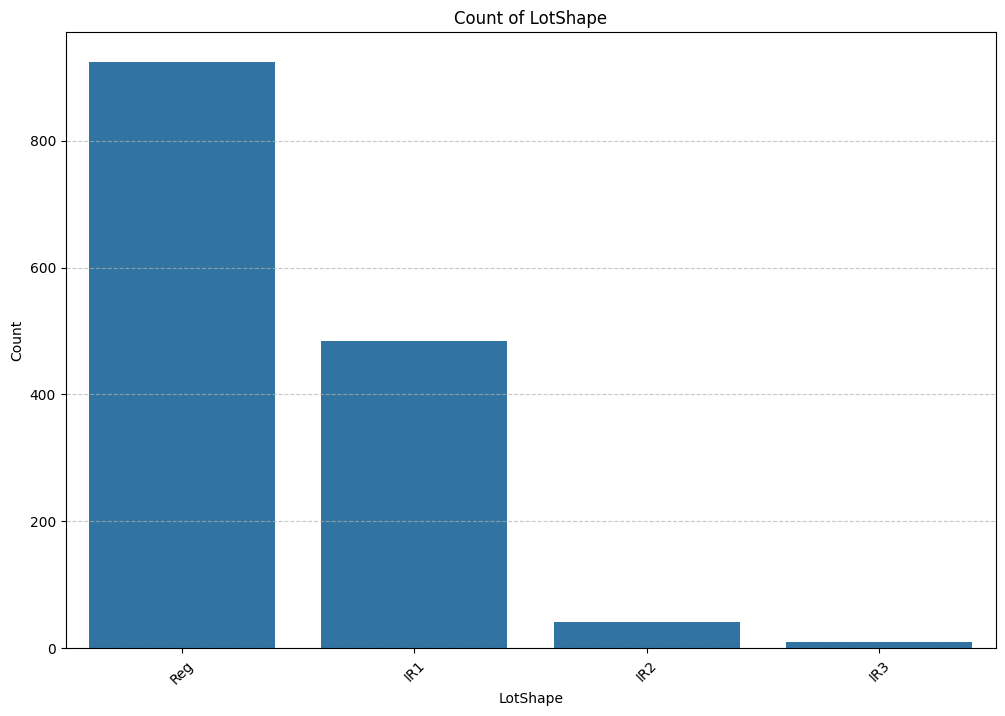

In [53]:
univariate_analyzer.analyze(df, 'LotShape')

#### Insight:
- The LotShape feature indicates that most lots are classified as Reg (Regular), followed by IR1 (Slightly irregular). The categories IR2 and IR3 are less common, with very few observations.
- The significant prevalence of Reg lots suggests a general trend in lot uniformity within the dataset.
#### Implication:
- The dominance of Reg lots may reduce the predictive power of this feature unless the irregularity categories (IR1, IR2, IR3) have a strong association with target variable.
- For predictive modeling, this feature could be encoded ordinally to represent the degree of irregularity, as the categories suggest an ordered relationship.
- The smaller categories (IR2 and IR3) might require careful handling to avoid issues with sparsity in the dataset, such as merging or grouping with similar categories if deemed necessary.
### LandContour

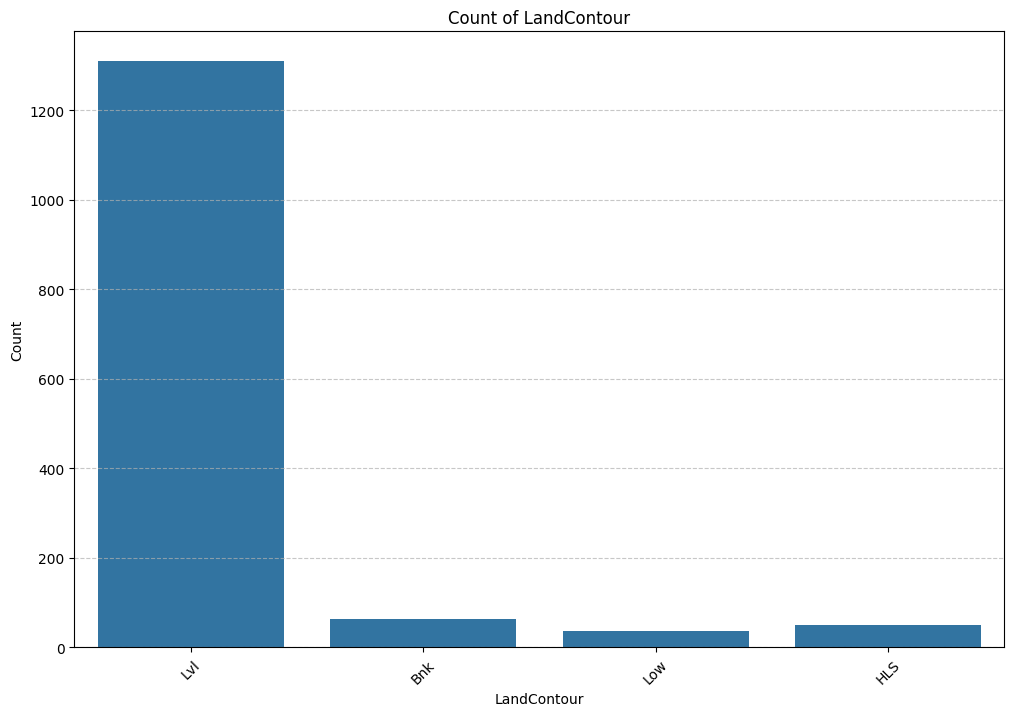

In [54]:
univariate_analyzer.analyze(df, 'LandContour')

#### Insight:
- The LandContour feature is heavily dominated by the Lvl (Level) category, indicating that most properties are on level ground. The other categories (Bnk, Low, HLS) are relatively rare, with significantly fewer observations.
#### Implication:
- The strong imbalance in the LandContour distribution suggests that the feature might have limited predictive power due to the overwhelming representation of the Lvl category.
- For predictive modeling, this feature could be encoded as a one-hot encoding if the minority categories have specific influences on the target variable. Alternatively, the less common categories could be grouped if their impact is minimal, to simplify the model and reduce sparsity issues.
- Careful analysis is required to understand if the less common categories contribute to variations in the target variable, as these could represent unique property traits that influence valuation.
### Utilities

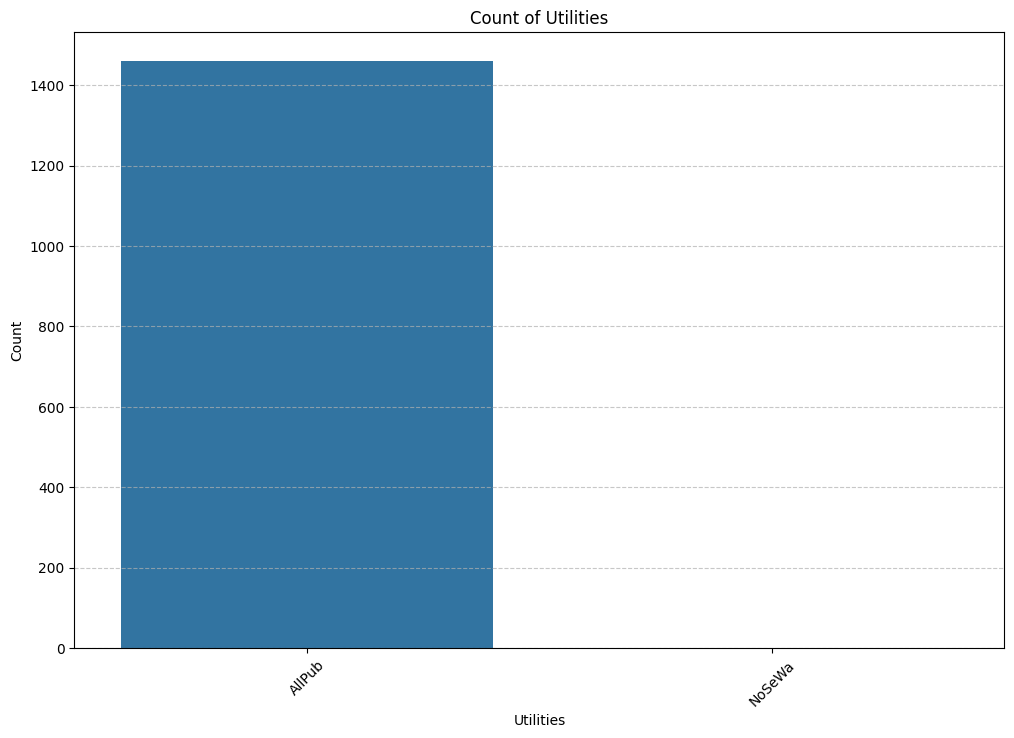

In [55]:
univariate_analyzer.analyze(df, 'Utilities')

#### Insight:
- The Utilities feature is highly imbalanced, with the vast majority of properties having AllPub (all public utilities available). The NoSeWa (Electricity and Gas Only) category has an extremely small number of observations.
#### Implication:
- Given the extreme imbalance in this feature, it is unlikely to provide significant predictive value in most modeling scenarios.
- The rarity of the NoSeWa category suggests it might represent special cases, such as properties in very remote or undeveloped areas. If such properties are known to impact the target variable, this feature might still be useful in identifying outliers or unique characteristics.
- For modeling purposes, `Utilities` could either be excluded due to its lack of variability or used as a binary indicator if the `NoSeWa` category aligns with meaningful trends in the data.
### LotConfig

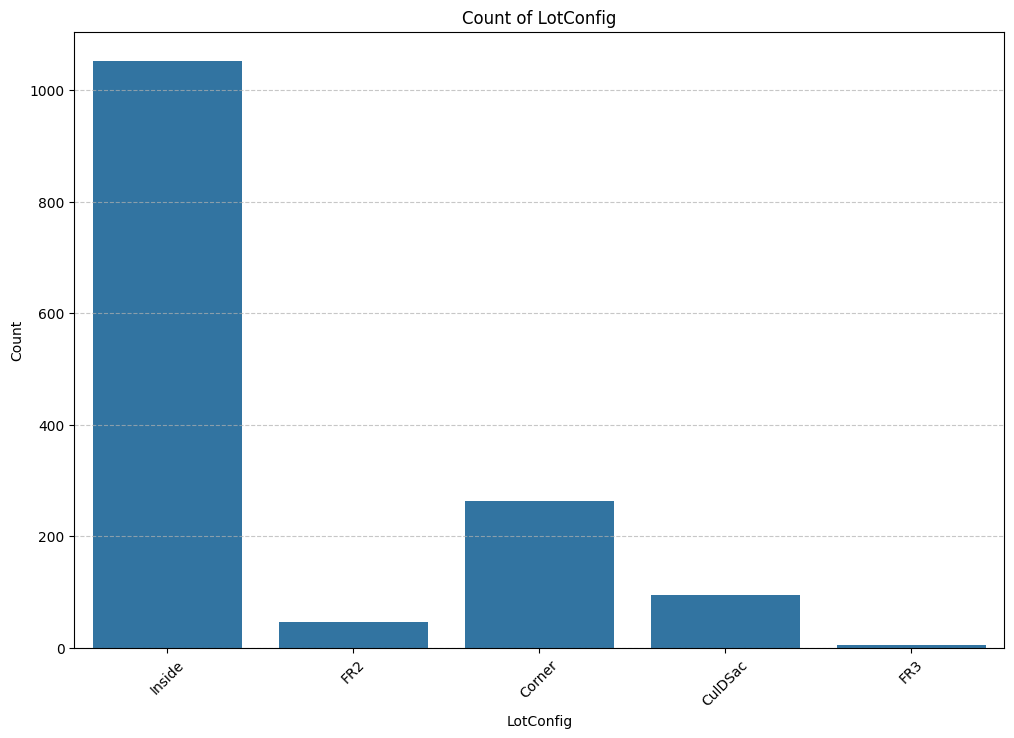

In [56]:
univariate_analyzer.analyze(df, 'LotConfig')

#### Insight:
- The LotConfig feature shows a significant dominance of the Inside category, with a smaller but notable presence of Corner and CulDSac configurations. The FR2 and FR3 categories have much fewer observations.
#### Implication:
- The prevalence of Inside lots suggests that this configuration might be the standard or most common type of lot in the dataset's geographic area.
- Corner and CulDSac lots may have unique characteristics influencing property value, such as larger lot sizes or more privacy.
- The low representation of FR2 and FR3 suggests these categories might contribute limited variability to predictive modeling. Grouping these less frequent categories into a single "Other" category could help stabilize models and reduce noise.
- This feature may have strong predictive power if different lot configurations significantly impact property prices. Frequency encoding or one-hot encoding could be appropriate techniques to handle this variable.
### LandSlope

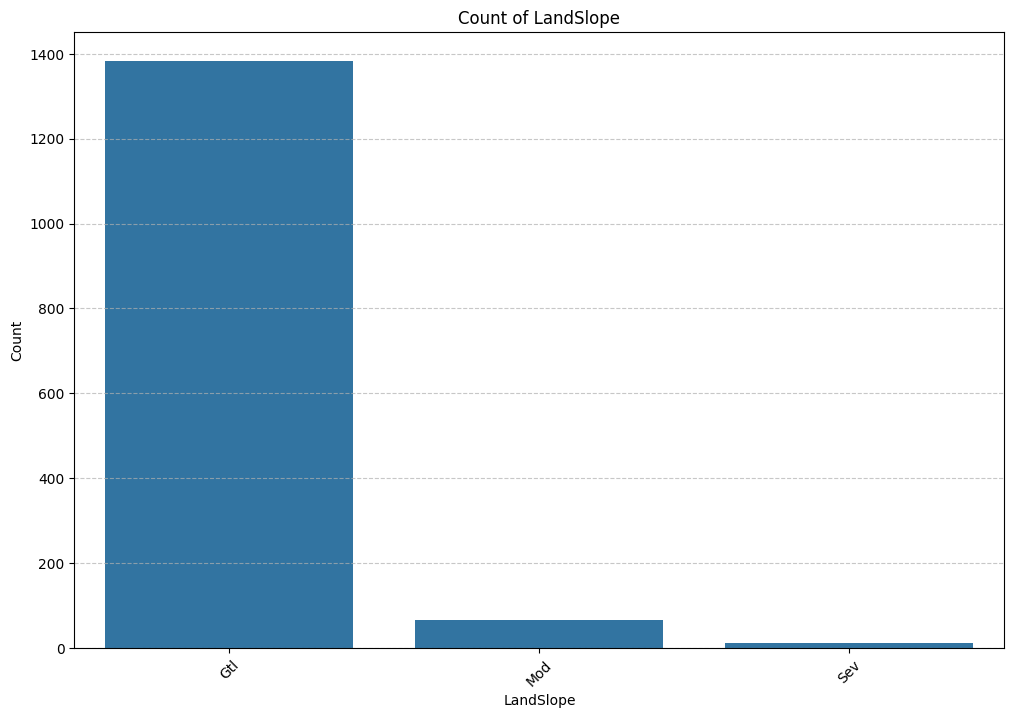

In [57]:
univariate_analyzer.analyze(df, 'LandSlope')

#### Insight:
- The LandSlope feature is highly skewed towards the Gtl (gentle slope) category, with the majority of the observations falling into this category. Mod (moderate slope) has a significantly smaller count, and Sev (severe slope) is barely represented in the dataset.
#### Implication:
- The dominance of the Gtl category suggests that the dataset mostly includes properties situated on gentle slopes, which could indicate a preference or practicality for such land in the studied area.
- The low representation of Mod and Sev slopes implies limited variability in the dataset regarding this feature, reducing its potential impact on model predictions.
- For predictive modeling, the LandSlope variable might be encoded ordinally to reflect its natural ordering. Alternatively, due to the skewness, grouping Mod and Sev into a single category could simplify the feature for better generalization.
### Neighborhood

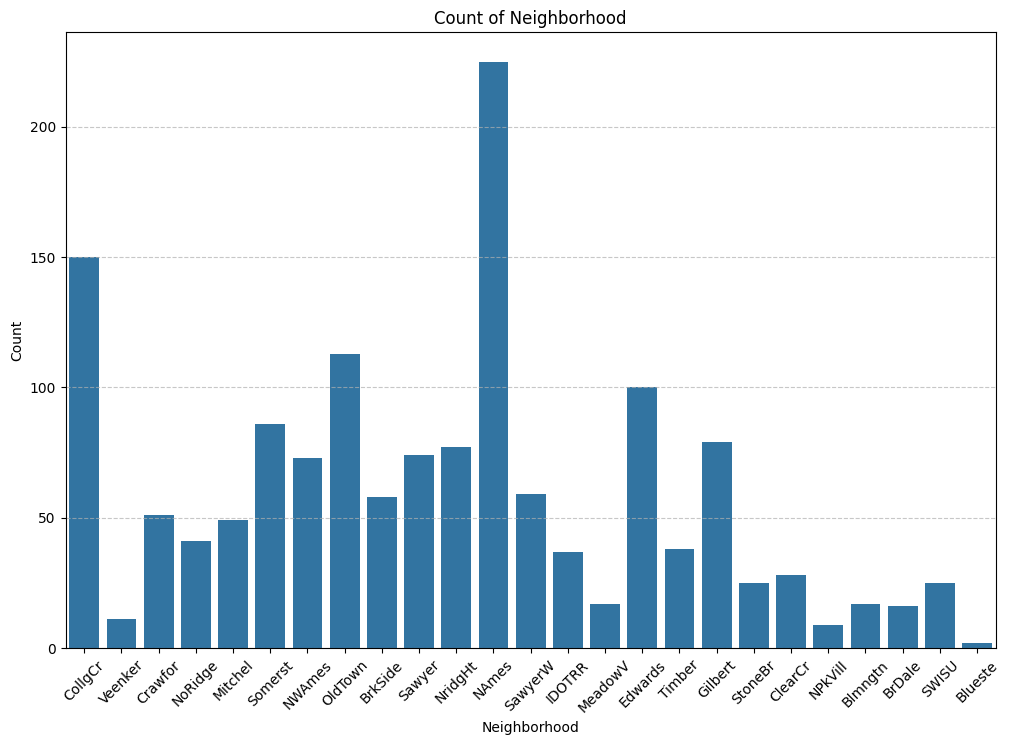

In [58]:
univariate_analyzer.analyze(df, 'Neighborhood')

#### Insight:
- The `Neighborhood` feature displays a varied distribution. The neighborhood `NAmes` has the highest frequency of observations, followed by `CollgCr` and `OldTown`. Other neighborhoods like `Blueste` and `ClearCr` have very few observations, indicating uneven representation.
- The significant variation in neighborhood counts suggests diverse areas with distinct characteristics.
#### Implication:
- Neighborhoods with a higher frequency, such as NAmes, are likely to have a greater influence on housing price trends in the dataset. This could reflect trends in desirability, location, or other neighborhood-specific factors.
- For neighborhoods with fewer observations, special handling may be required during modeling to prevent overfitting. This could include grouping them into broader categories based on shared characteristics or encoding them using frequency-based methods.
- As neighborhoods often correlate with socioeconomic factors, the Neighborhood feature is expected to be a significant predictor of housing prices.
### Condition1

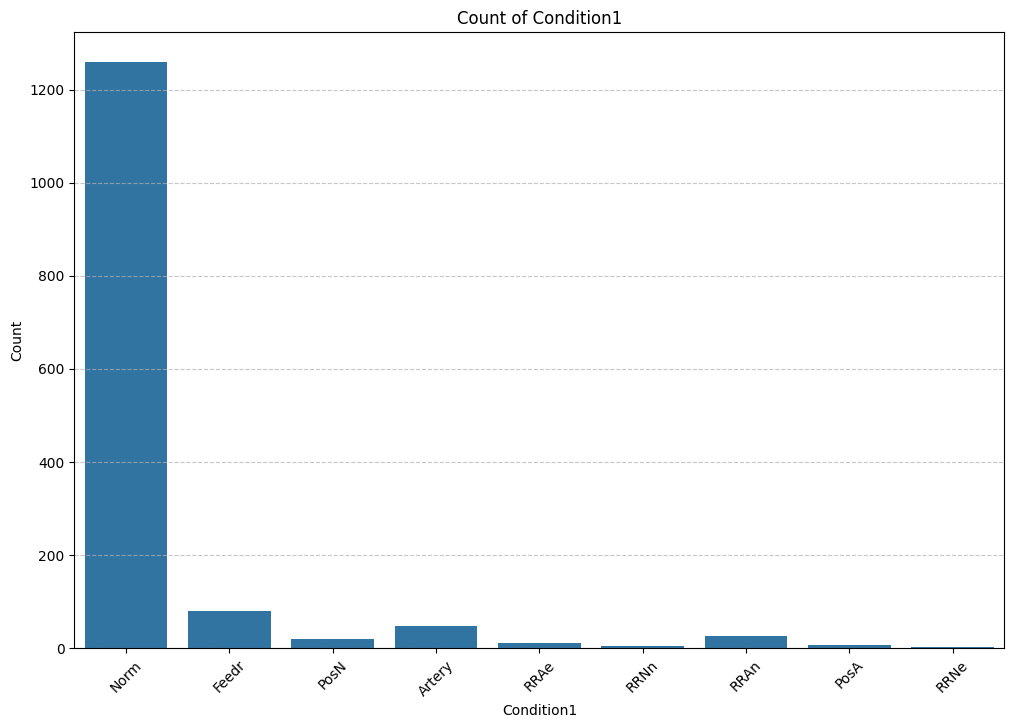

In [59]:
univariate_analyzer.analyze(df, 'Condition1')

#### Insight:
- The `Condition1` feature is heavily skewed, with the vast majority of observations falling into the category Norm. Other categories, such as Feedr, Artery, and RRNn, have significantly fewer observations, with some categories being almost negligible.
- This distribution highlights that most properties are in a standard or typical condition, with few adjacent to features like feeders or railroads.
#### Implication:
- The dominance of the Norm category suggests that `Condition1` might have limited variation for predictive modeling unless the less frequent categories strongly influence the target variable `SalePrice`.
- For modeling, techniques like one-hot encoding could inflate the feature space due to the many underrepresented categories. To counter this, rare categories could be grouped together based on similar conditions, or frequency encoding could be employed.
- This feature is worth exploring further to assess its correlation with housing prices, as proximity to specific conditions (like railroads or arterial streets) may significantly affect property values.
### Condition2

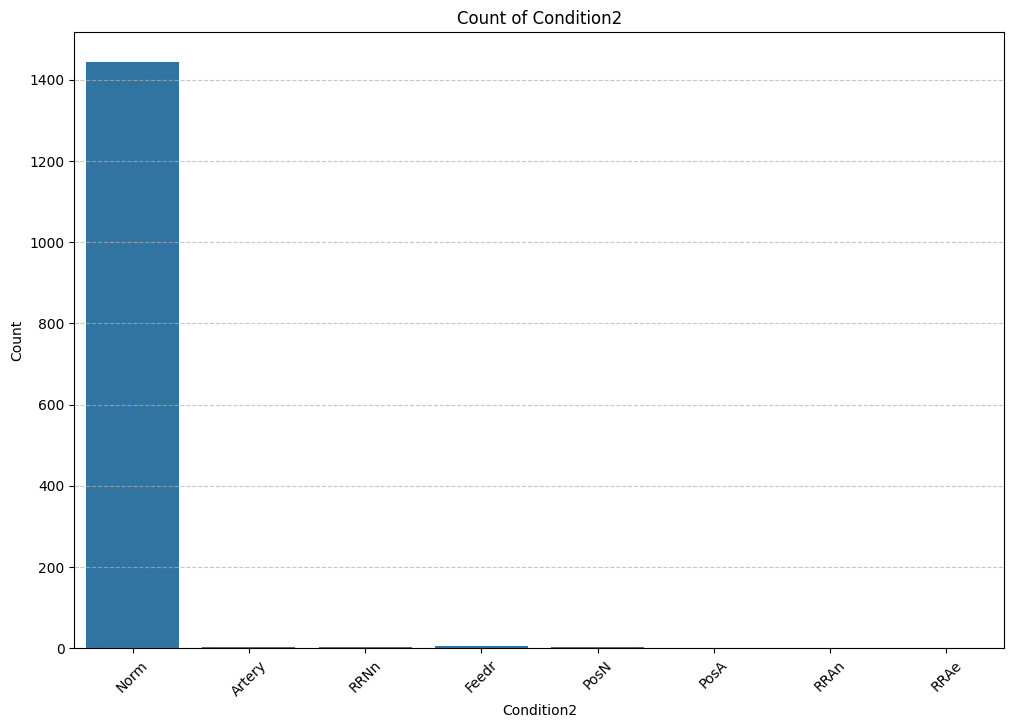

In [60]:
univariate_analyzer.analyze(df, 'Condition2')

#### Insight:
- The `Condition2` feature is overwhelmingly dominated by the Norm category, with all other categories appearing extremely infrequently. This suggests that most properties in the dataset are in standard condition for their secondary attribute.
- Categories such as Artery, RRNn, Feedr, and others have very few observations, making them highly underrepresented.
#### Implication:
- The lack of diversity in `Condition2` reduces its potential impact on predictive modeling unless the rare categories have a disproportionately strong influence on housing prices.
- For modeling purposes, `Condition2` could be combined with `Condition1` to create a composite feature, or rare categories could be grouped to prevent issues like overfitting.
- Alternatively, this feature might be dropped altogether if its contribution to model performance is found to be negligible during feature selection or importance analysis.
### BldgType

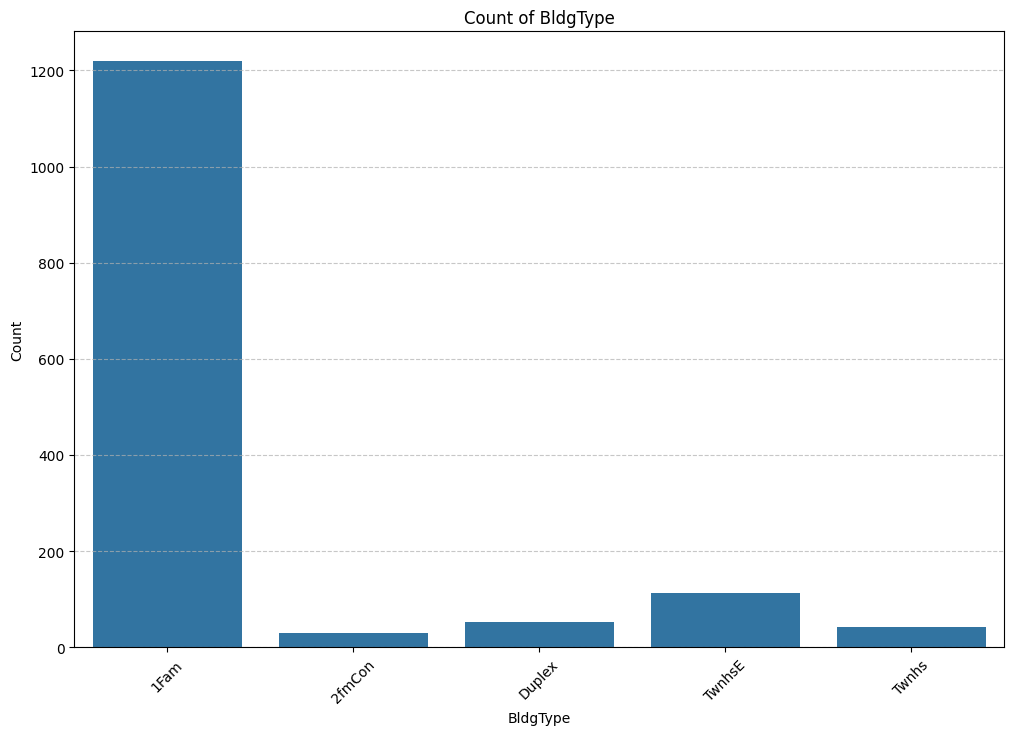

In [61]:
univariate_analyzer.analyze(df, 'BldgType')

#### Insight:
- The `BldgType` feature is dominated by the 1Fam (single-family) building type, which comprises the vast majority of the dataset. Other building types like `2fmCon`, `Duplex`, `TwnhsE`, and `Twnhs` appear far less frequently, with `2fmCon` being the least common.
- This indicates that the dataset is heavily skewed toward single-family homes.
#### Implication:
- The predominance of `1Fam` suggests that the dataset's trends and models might heavily favor characteristics associated with single-family homes.
- For predictive modeling, the rare building types may need to be aggregated into broader categories to improve representation or analyzed separately to avoid overfitting.
- Depending on the model's purpose, `BldgType` could provide valuable insights into property segmentation or be treated as a categorical feature with appropriate encoding techniques.
### HouseStyle

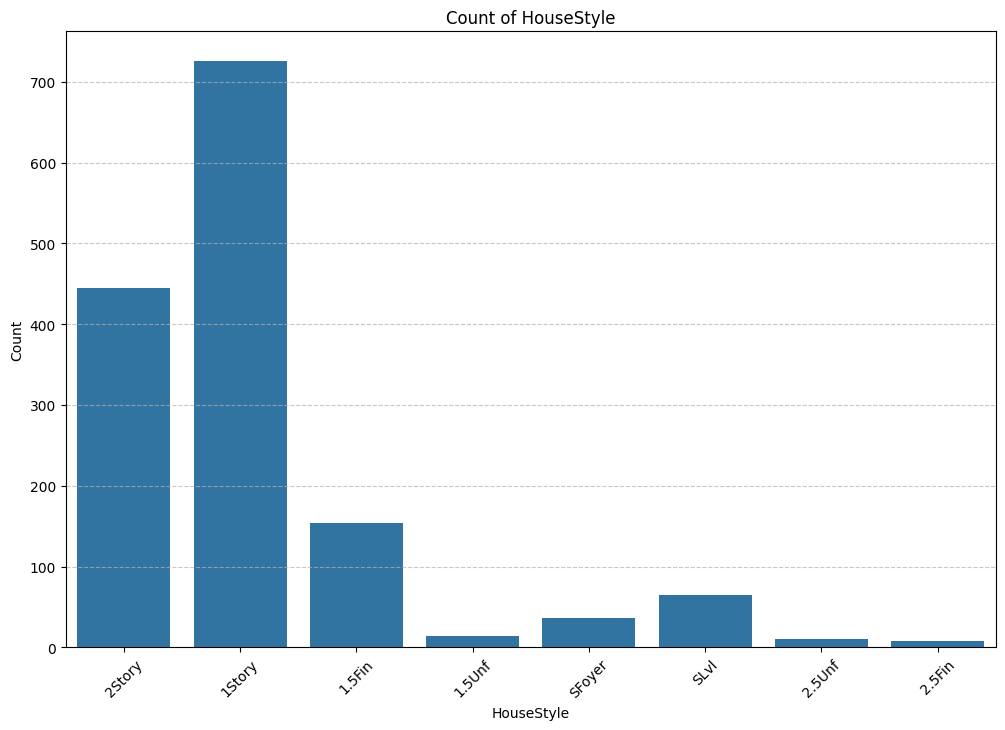

In [62]:
univariate_analyzer.analyze(df, 'HouseStyle')

#### Insight:
- The `HouseStyle` feature is dominated by `1Story` and `2Story` house styles, which collectively represent the majority of the dataset.
- Other house styles such as `1.5Fin`, `SFoyer`, `SLvl`, and `1.5Unf` have fewer occurrences, with `2.5Unf` and `2.5Fin` being the least common.
#### Implication:
- The predominance of `1Story` and `2Story` styles suggests that housing characteristics and pricing trends in the dataset will likely be skewed toward these types.
- For predictive modeling, rare categories like `2.5Unf` and `2.5Fin` might need to be aggregated with similar styles or carefully encoded to ensure stability in predictions.
- If the house style is an important predictor, this feature could highlight segmentation in the dataset based on architectural design, influencing factors like space utilization and resale value.
### RoofStyle

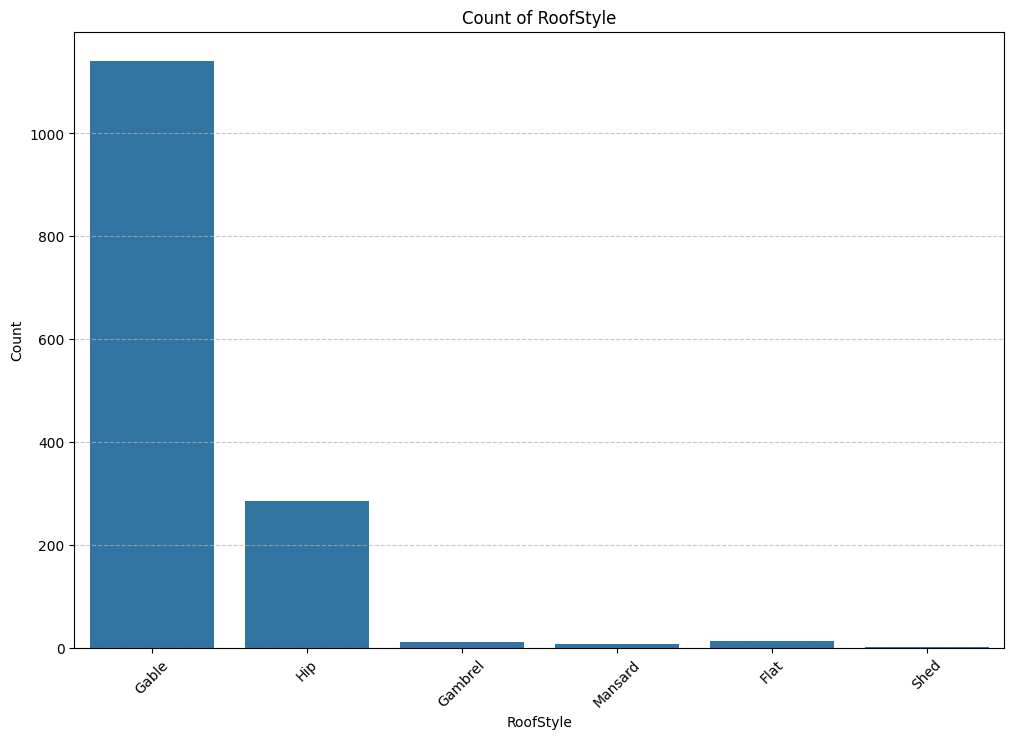

In [63]:
univariate_analyzer.analyze(df, 'RoofStyle')

#### Insight:
- The `RoofStyle` feature is heavily dominated by `Gable` roofs, followed by `Hip` roofs. Other styles, such as `Gambrel`, `Mansard`, `Flat`, and `Shed`, are relatively rare in the dataset.
- This indicates that the majority of the houses follow a traditional or standard roof design.
#### Implication:
- The dominance of `Gable` roofs suggests that architectural preferences or cost considerations likely favor this style.
- Rare categories like `Mansard` or `Shed` might be grouped together or encoded carefully to avoid bias in predictive models.
- The `RoofStyle` could play a role in identifying unique property characteristics, especially if rare styles are associated with specific price ranges or historical periods.
### RoofMatl

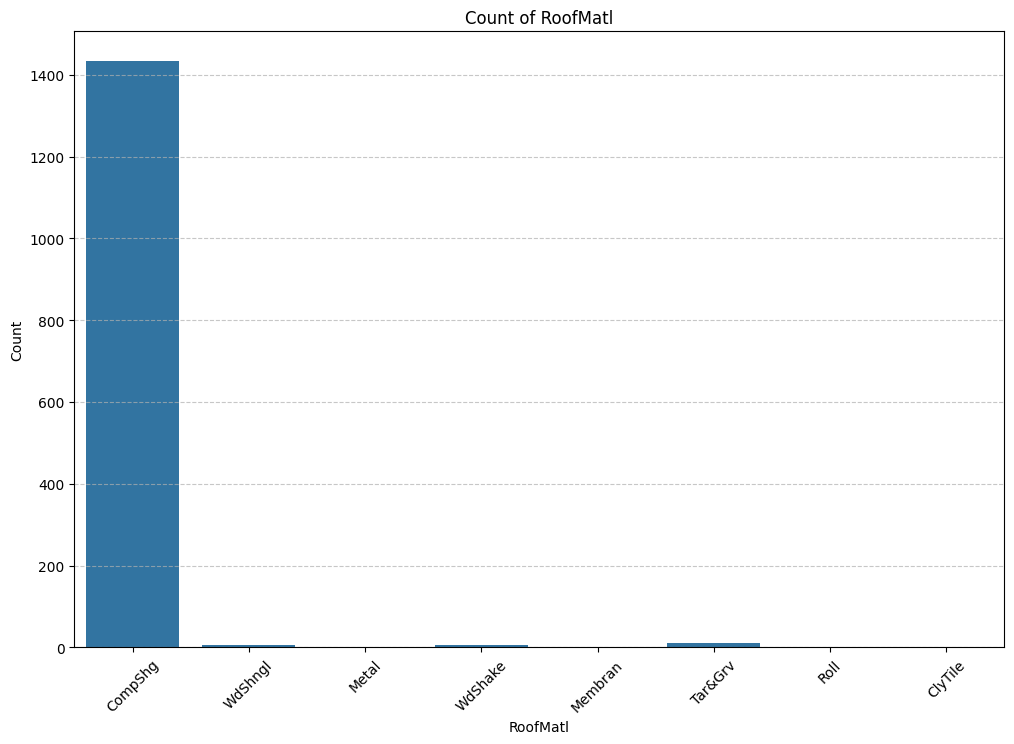

In [64]:
univariate_analyzer.analyze(df, 'RoofMatl')

#### Insight:
- The RoofMatl feature is overwhelmingly dominated by `CompShg` (composition shingles), with very few observations for other materials like `WdShngl`, `Metal`, `WdShake`, `Membran`, `Tar&Grv`, `Roll`, and `ClyTile`.
- The dataset shows a clear preference or prevalence for `CompShg`, indicating that it is the standard material used in most houses.
#### Implication:
- The heavy skew towards CompShg suggests limited variability in roofing materials, potentially making this feature less influential in predicting house prices.
- Rare categories could be grouped together or treated as a single category to reduce noise and prevent overfitting in predictive models.
- If these rare materials are associated with specific types of houses or neighborhoods, they might still hold significance in niche market segments.
### Exterior1st

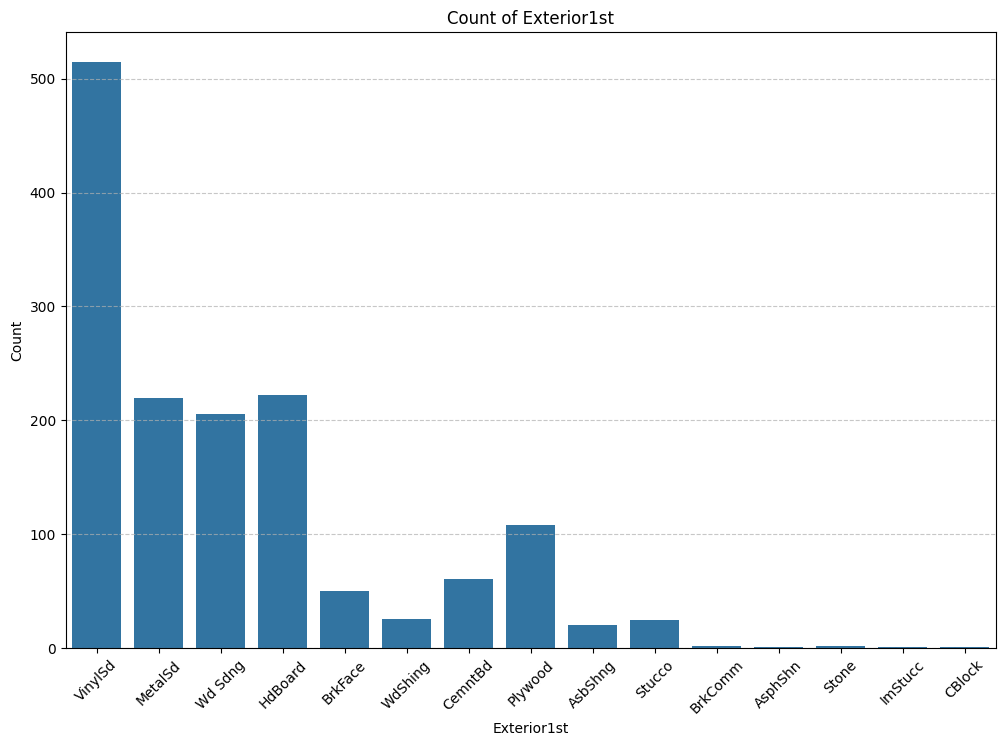

In [65]:
univariate_analyzer.analyze(df, 'Exterior1st')

#### Insight:
- The Exterior1st feature demonstrates significant variability, with VinylSd (Vinyl Siding) being the most common exterior material by a large margin. Other popular materials include MetalSd, Wd Sdng, and HdBoard.
- Materials like CBlock, Stone, and ImStucc are extremely rare in the dataset.
#### Implication:
- The dominance of VinylSd suggests it may act as a baseline material in predictive models. The variability in this feature could provide meaningful information about housing quality and preferences in construction.
- Rare categories may need to be grouped or consolidated to avoid sparsity issues during model training, particularly if these materials don't significantly contribute to the target variable.
- If certain materials are indicative of higher or lower house prices, this feature could be an important predictor.
### Exterior2nd

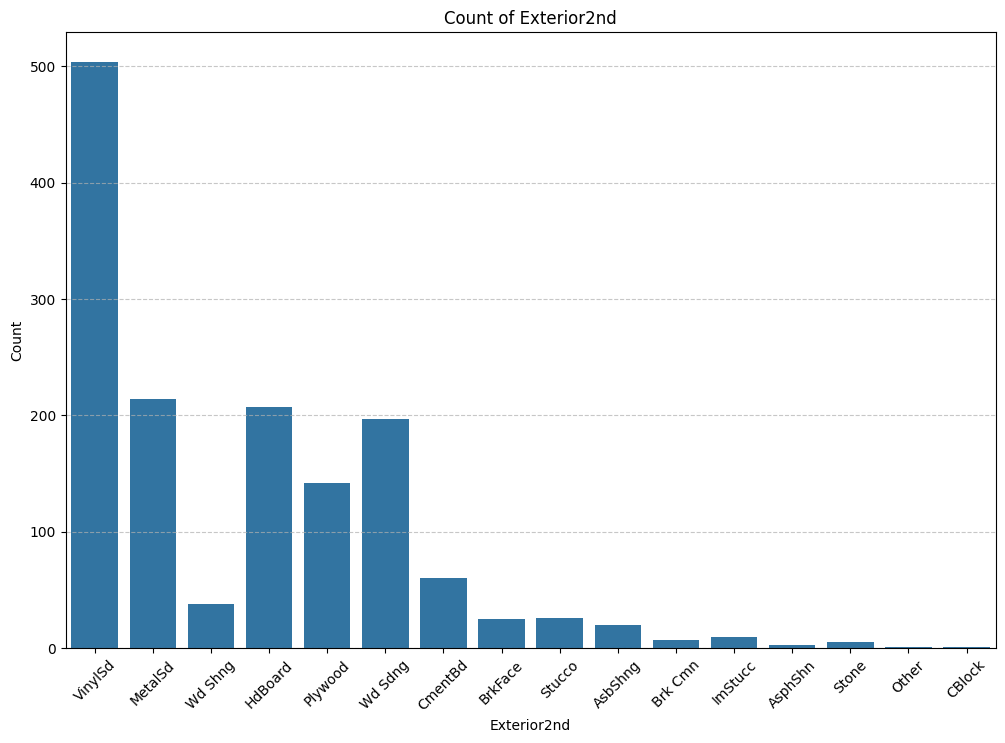

In [66]:
univariate_analyzer.analyze(df, 'Exterior2nd')

#### Insight:
- The Exterior2nd feature, which denotes the second exterior covering on the house, has a distribution similar to Exterior1st. VinylSd (Vinyl Siding) is the most common, followed by MetalSd, Wd Shng, and HdBoard.
- Some exterior types, like CBlock, Stone, and ImStucc, occur very infrequently, mirroring the pattern observed in Exterior1st.
#### Implication:
- The similarity between Exterior1st and Exterior2nd distributions suggests potential correlation or redundancy between the two features. This might need to be assessed to avoid multicollinearity in modeling.
- The diversity in this feature provides additional granularity for understanding housing exteriors. Grouping rare categories might simplify analysis and prevent overfitting.
- For predictive modeling, the relationship between Exterior2nd and house price should be tested to determine its significance and whether it adds unique value over Exterior1st.
### MasVnrType

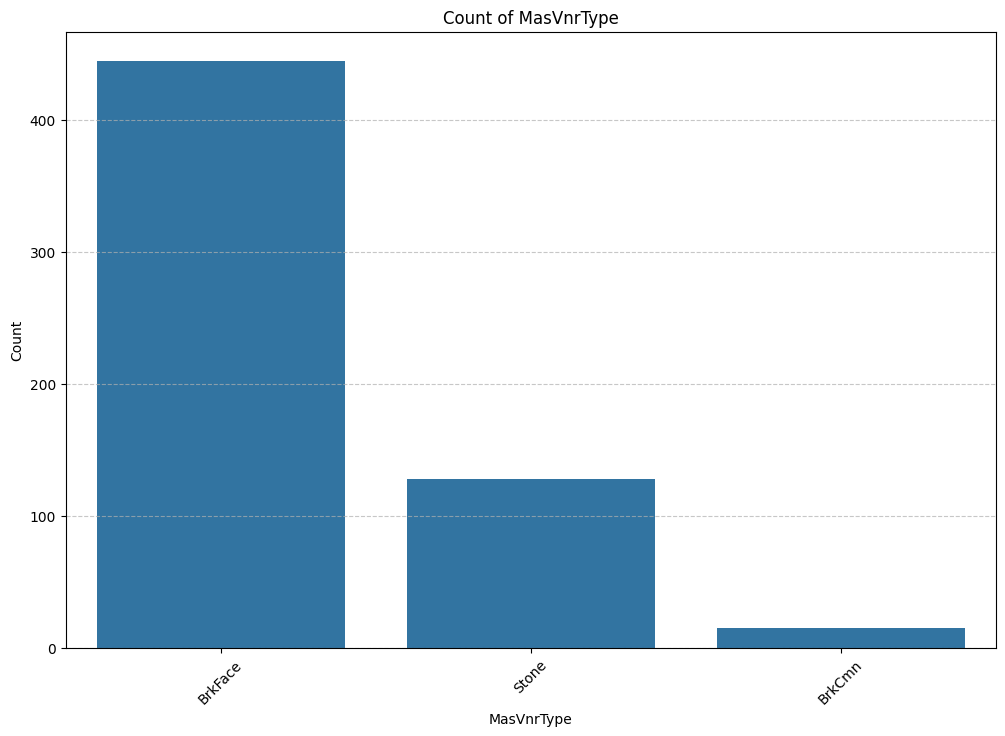

In [67]:
univariate_analyzer.analyze(df, 'MasVnrType')

#### Insight:
- The MasVnrType (Masonry Veneer Type) feature shows that BrkFace (Brick Face) is the most commonly used masonry veneer type, followed by Stone and then BrkCmn (Brick Common).
- There is a notable dominance of BrkFace, with fewer observations for the other categories.
#### Implication:
- The heavy skew towards BrkFace suggests it could be a default or preferred choice for veneer types in the dataset's housing market. This could influence its correlation with property value.
- The smaller counts for Stone and BrkCmn may require combining rare categories or encoding them as binary variables to reduce noise in modeling.
- It would be prudent to explore the relationship between MasVnrType and housing price to assess its predictive significance, as it could provide insights into the aesthetic or structural preferences affecting property valuation.
### ExterQual

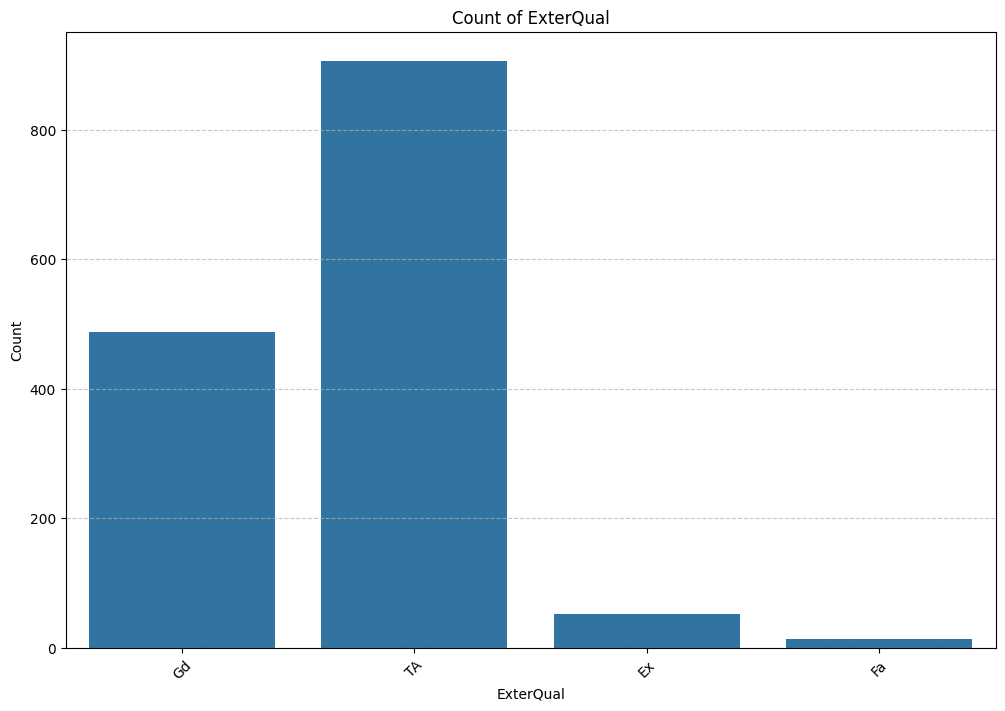

In [68]:
univariate_analyzer.analyze(df, 'ExterQual')

#### Insight:
- The ExterQual (Exterior Quality) feature is dominated by the TA (Typical/Average) category, followed by Gd (Good). The Ex (Excellent) and Fa (Fair) categories have significantly fewer observations.
- This suggests that most properties have an average or good exterior quality, with few outliers having excellent or poor quality.
#### Implication:
- The ExterQual feature may play a critical role in determining housing prices, especially the presence of the Ex category, which could indicate premium properties.
- For predictive modeling, this feature can be encoded ordinally to capture its natural order (e.g., Ex > Gd > TA > Fa).
- Since the distribution is skewed, analyzing its correlation with the target variable could provide insights into the importance of exterior quality in determining property values.
### ExterCond

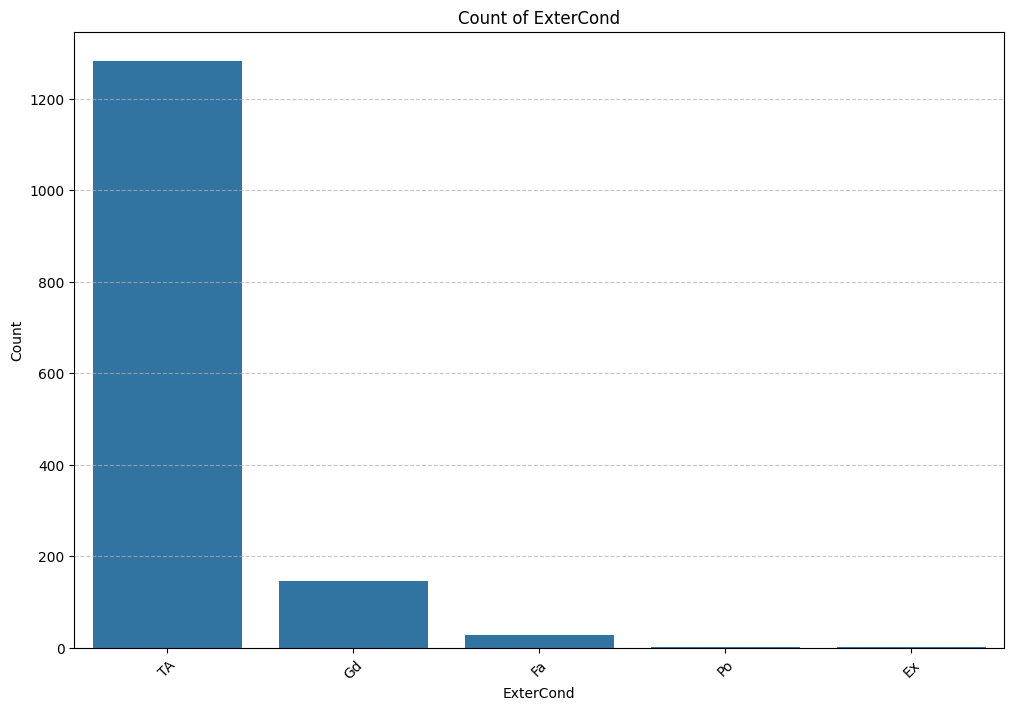

In [69]:
univariate_analyzer.analyze(df, 'ExterCond')

#### Insight:
- The ExterCond (Exterior Condition) feature shows that the majority of properties have a TA (Typical/Average) condition, followed by Gd (Good). The categories Fa (Fair), Po (Poor), and Ex (Excellent) have very few observations.
- This suggests that most properties are maintained at an average level of exterior condition, with only a small fraction showing poor or excellent conditions.
#### Implication:
- The ExterCond feature may have limited variability, but the presence of extreme categories (Po and Ex) could be significant outliers influencing property valuation.
- For predictive modeling, this feature could also be encoded ordinally (Ex > Gd > TA > Fa > Po), as it represents a clear hierarchy.
- Since the distribution is highly skewed toward the TA category, it might have limited impact on the model unless these extreme cases are particularly influential in relation to the target variable.
### Foundation

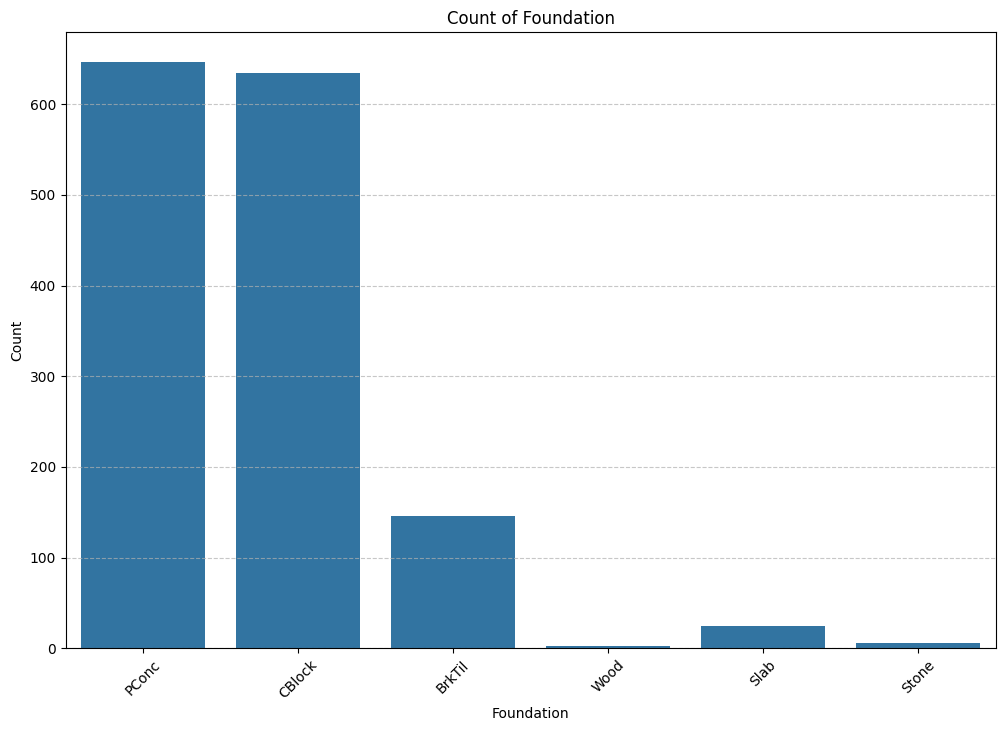

In [70]:
univariate_analyzer.analyze(df, 'Foundation')

#### Insight:
- The Foundation feature is dominated by two categories: PConc (Poured Concrete) and CBlock (Cinder Block), which make up the majority of the data. The other categories (BrkTil, Wood, Slab, and Stone) have significantly fewer observations.
- This indicates that most houses have either poured concrete or cinder block foundations, reflecting standard construction practices.
#### Implication:
- The strong dominance of PConc and CBlock suggests that the other categories might have limited impact in predictive models unless they are strongly correlated with the target variable.
- For modeling purposes, one approach could be to group the less frequent categories into a single "Other" category to avoid overfitting or data sparsity issues.
- Alternatively, consider encoding the foundation types as one-hot features if they exhibit significant variation in their influence on the target variable.
### BsmtQual

In [71]:
univariate_analyzer.analyze(df, 'BsmtQual')

#### Insight:
- The BsmtQual (Basement Quality) feature shows that the majority of houses have either Gd (Good) or TA (Typical/Average) basement quality, with both categories having similar counts.
- The other categories (Ex - Excellent, Fa - Fair, and null/missing data) are less frequent, indicating less variation in basement quality across houses.
#### Implication:
- The dominance of Gd and TA suggests that these categories may heavily influence the overall property value, while the less frequent categories might have minor effects unless they are significant outliers in their impact on price.
- When modeling, I will consider encoding this feature ordinally (Ex > Gd > TA > Fa > missing) to capture the hierarchical nature of the basement quality.
### BsmtCond

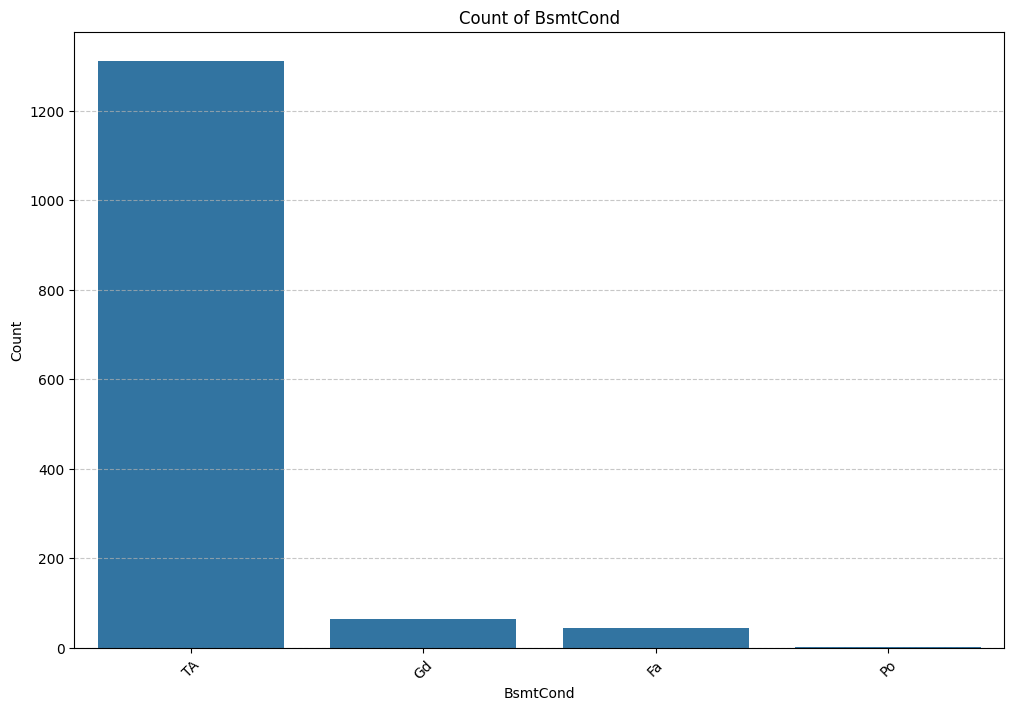

In [72]:
univariate_analyzer.analyze(df, 'BsmtCond')

#### Insight:
- The BsmtCond (Basement Condition) feature is heavily dominated by the TA (Typical/Average) category, with only a small proportion of basements falling into the Gd (Good), Fa (Fair), or Po (Poor) categories.
- The significant skew toward TA indicates limited variation in the basement condition across most houses.
#### Implication:
- The lack of diversity in the `BsmtCond` values may reduce its importance as a predictive feature unless the smaller categories (Gd, Fa, Po) have a disproportionately high or low impact on `SalePrice`.
- This feature could be encoded ordinally (Gd > TA > Fa > Po > missing) to capture the inherent ranking of conditions.
- It may be worth exploring interactions between `BsmtCond` and other features, such as `BsmtQual` or `Foundation`, to determine if specific combinations significantly influence housing prices.
### BsmtExposure

In [73]:
univariate_analyzer.analyze(df, 'BsmtExposure')

#### Insight:
- The `BsmtExposure` (Basement Exposure) feature is dominated by the No category, indicating that the majority of houses do not have a basement with walkout or garden-level exposure.
- A smaller proportion of basements have Av (Average), Mn (Minimum), or Gd (Good) exposure levels, with Av being the next most common.
#### Implication:
- The dominance of the No category suggests limited variation in basement exposure across most houses. However, properties with Gd or Av exposure may contribute positively to `SalePrice`, as such features often enhance a home's appeal.
- For modeling, this feature could be ordinally encoded (Gd > Av > Mn > No) to capture its qualitative ranking.
- It might also be beneficial to explore interactions between `BsmtExposure` and other basement-related features, such as `BsmtFinSF1` (Finished Basement Area) or `BsmtQual`, to determine their combined impact on housing prices.
### BsmtFinType1

In [74]:
univariate_analyzer.analyze(df, 'BsmtFinType1')

#### Insight:
- The `BsmtFinType1` (Basement Finished Type 1) feature indicates that a significant number of houses have unfinished basements (Unf) as the most common type, followed closely by GLQ (Good Living Quarters).
- Other categories such as ALQ (Average Living Quarters), Rec (Recreational Room), and BLQ (Below Average Living Quarters) appear with lower but relatively balanced frequencies.
- The LwQ (Low Quality) type is the least frequent, suggesting that few basements are classified as low-quality living spaces.
#### Implication:
- This feature highlights the variability in basement finishing quality, which could strongly influence housing prices, particularly for properties with `GLQ` or `ALQ` finished basements.
- For predictive modeling, `BsmtFinType1` should be ordinally encoded to reflect the quality hierarchy (GLQ > ALQ > BLQ > Rec > LwQ > Unf).
- Additional analysis might include correlating this feature with `SalePrice` or `BsmtFinSF1` (Finished Square Feet) to better understand the impact of finished basement types on property value.
### BsmtFinType2

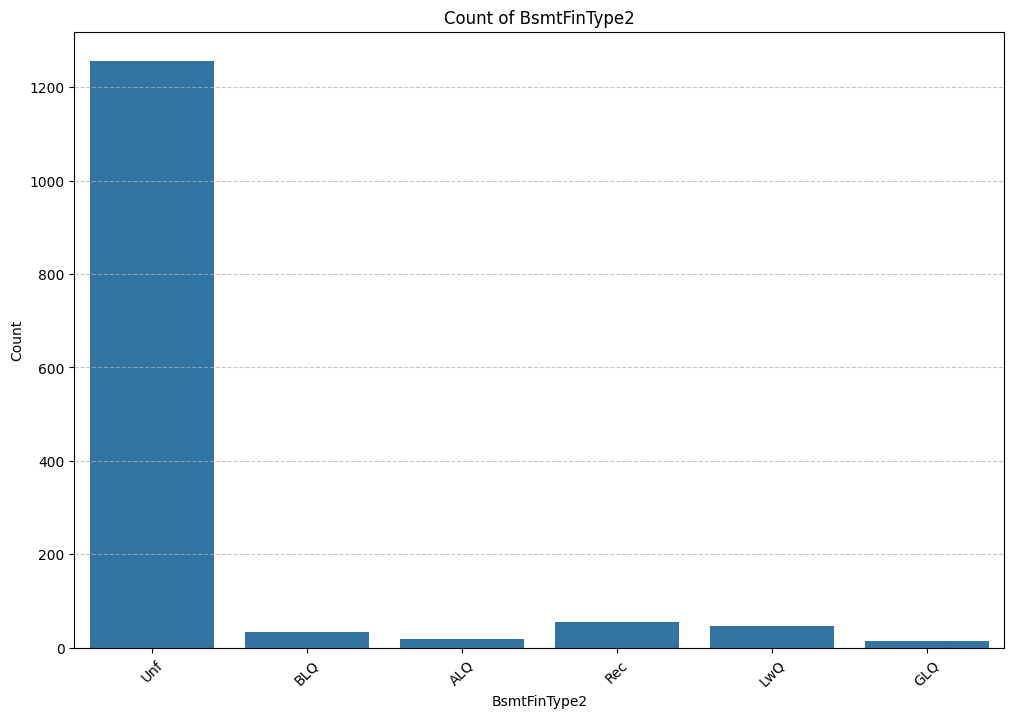

In [75]:
univariate_analyzer.analyze(df, 'BsmtFinType2')

#### Insight:
- The `BsmtFinType2` (Basement Finished Type 2) feature shows that the vast majority of houses have unfinished secondary basements (Unf).
- Other categories such as Rec (Recreational Room), BLQ (Below Average Living Quarters), and LwQ (Low Quality) are present but occur significantly less frequently.
- Higher-quality finishing types like GLQ (Good Living Quarters) and ALQ (Average Living Quarters) are rare for secondary basement finishing.
#### Implication:
- The predominance of unfinished secondary basements suggests that this feature might have limited variability, reducing its predictive power for certain models unless paired with other basement-related features.
- For modeling purposes, the `BsmtFinType2` feature could be simplified by encoding Unf as a separate category and combining the less frequent categories (Rec, BLQ, LwQ, etc.) into a single group to avoid overfitting or sparsity issues.
- Further exploration of the relationship between `BsmtFinType2` and features such as `SalePrice` or `BsmtFinSF2` (Finished Square Feet of Secondary Basement) could provide insights into the impact of secondary basement finishing on property value.
### Heating

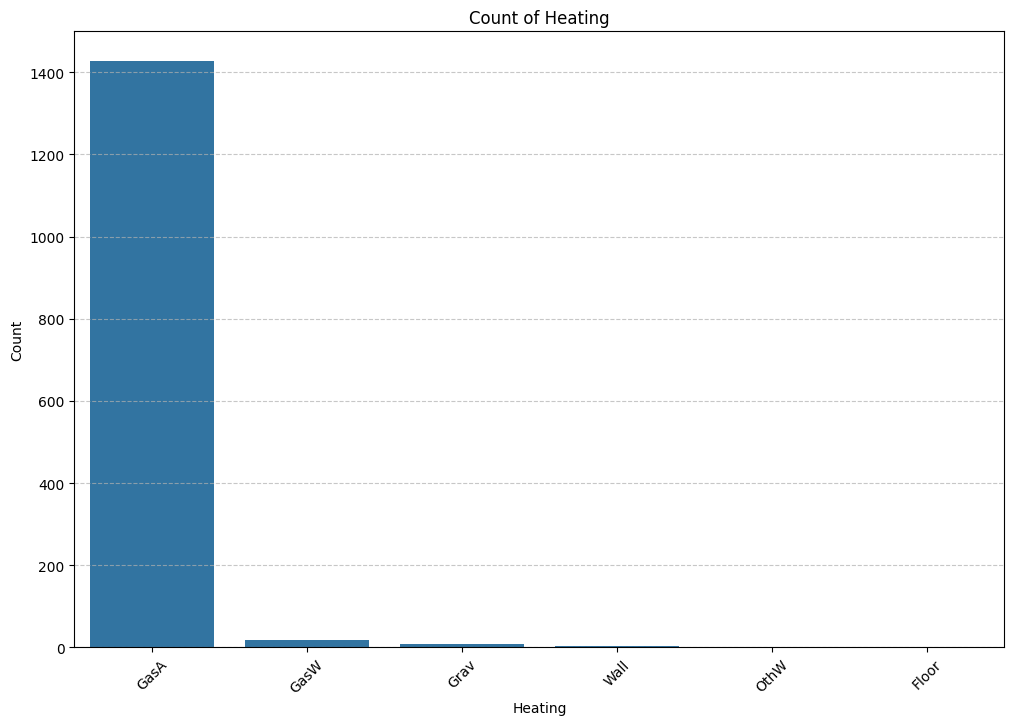

In [76]:
univariate_analyzer.analyze(df, 'Heating')

#### Insight:
- The Heating feature shows an overwhelming dominance of the GasA (Gas forced air) category, indicating it is the most common heating type in the dataset.
- Other heating types like GasW (Gas water), Grav (Gravity heating), and Wall heating are present in very small numbers, with OthW (Other water heating) and Floor heating being even rarer.
#### Implication:
- The strong prevalence of GasA implies limited variability in this feature, which might reduce its significance in predictive modeling if not correlated with other variables.
- Categories with low frequency may contribute little to the model unless they have specific relevance to the target variable. These infrequent categories could be combined into an "Other" category to simplify modeling and avoid sparsity issues.
### HeatingQC

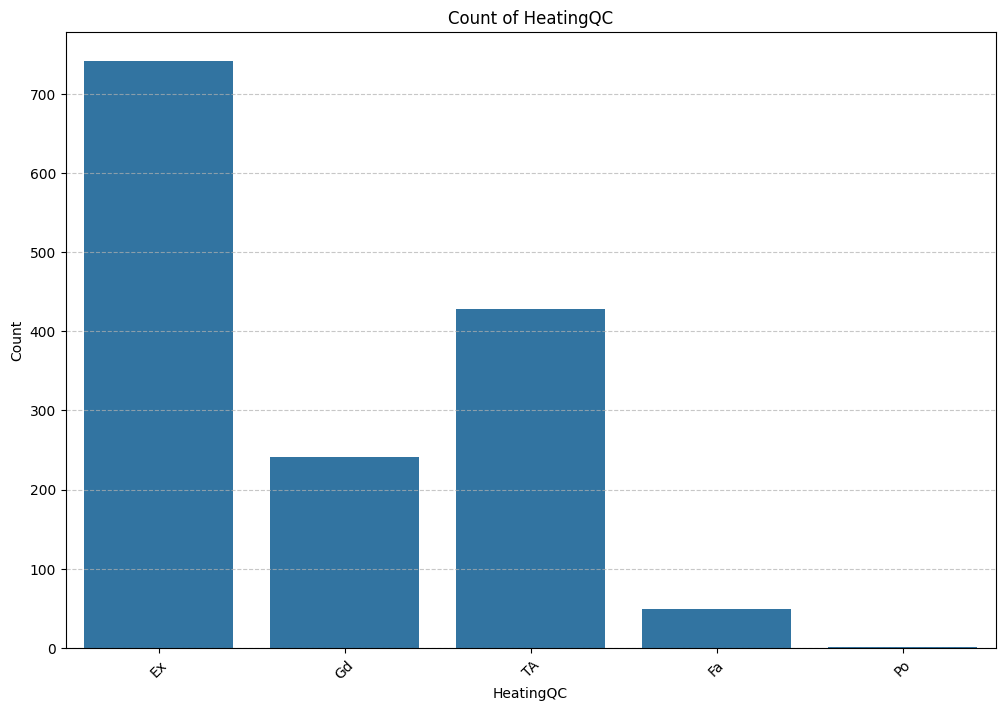

In [77]:
univariate_analyzer.analyze(df, 'HeatingQC')

#### Insight:
- The HeatingQC feature shows a significant concentration in the Ex (Excellent), TA (Typical/Average), and Gd (Good) categories.
- A smaller number of observations fall into Fa (Fair) and Po (Poor) categories.
#### Implication:
- The dominance of Ex and TA indicates that most homes in the dataset have acceptable or better heating quality.
- Observations with Fa and Po heating quality are minimal and may be combined into an "Other" category to reduce sparsity during modeling.
- Since heating quality can directly influence house value or desirability, this variable might have predictive importance in a regression model for housing prices.
### CentralAir

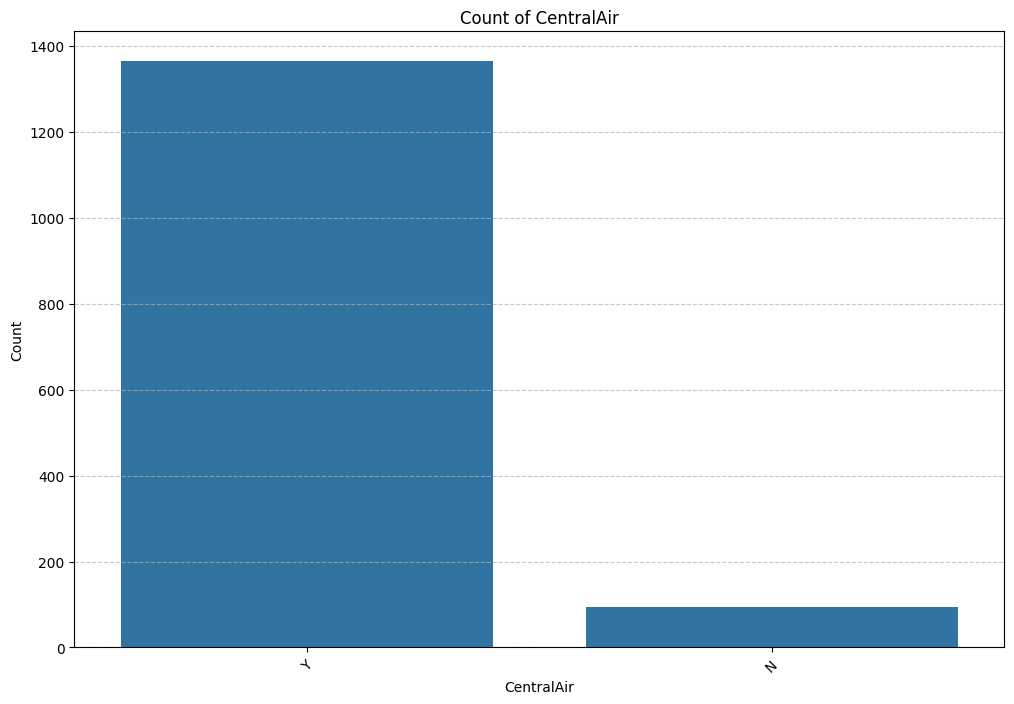

In [78]:
univariate_analyzer.analyze(df, 'CentralAir')

#### Insight:
- The `CentralAir` feature is heavily dominated by the "Y" (Yes) category, indicating that most homes in the dataset are equipped with central air conditioning.
- Only a small proportion of homes lack central air conditioning ("N").
#### Implication:
- This feature is almost binary, with "Y" being the majority class.
- Its predictive importance might depend on the target variable. For instance, homes with central air may have a higher valuation in warm regions.
- Since  the "N" category is too small, it may be worth testing whether this variable has a significant effect on the target outcome or if it can be safely excluded or combined with other features during modeling.
### Electrical

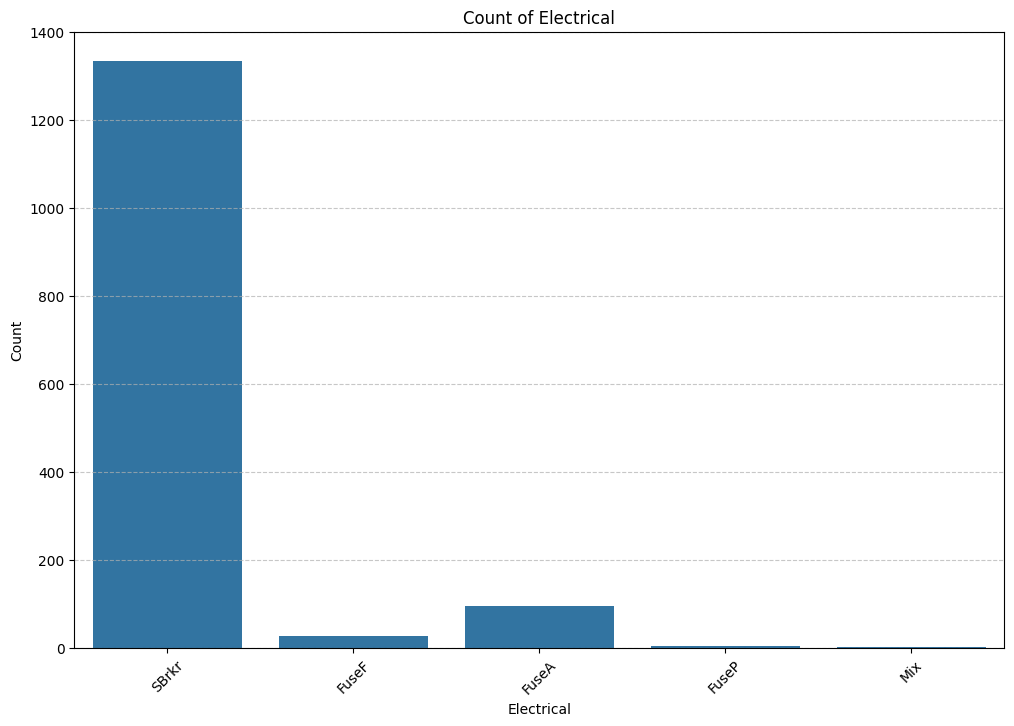

In [79]:
univariate_analyzer.analyze(df, 'Electrical')

#### Insight:
- The Electrical feature is dominated by the "SBrkr" category, which accounts for the vast majority of homes in the dataset.
- Other categories like "FuseF," "FuseA," "FuseP," and "Mix" are sparsely represented.
#### Implication:
- Since "SBrkr" is overwhelmingly the most common, this feature may not have significant variation to contribute to model predictions unless the target variable shows distinct patterns for the less frequent categories.
- If the minority categories are too small, it might be necessary to either group them into a single "Other" category or consider dropping the feature if it does not significantly impact the model.
### KitchenQual

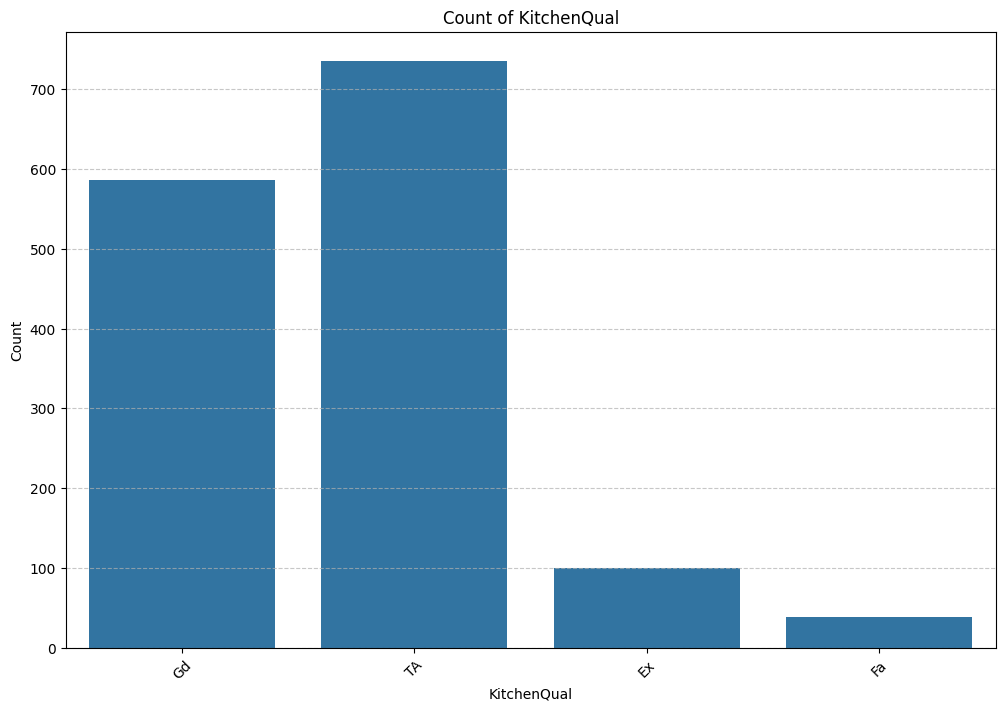

In [80]:
univariate_analyzer.analyze(df, 'KitchenQual')

#### Insight:
- The KitchenQual feature primarily consists of the categories "TA" and "Gd," which dominate the dataset.
- "Ex" and "Fa" categories have significantly fewer instances.
#### Implication:
- Since "TA" and "Gd" account for the majority of the observations, the variation in this feature is somewhat limited. However, if there is a correlation between KitchenQual and the target variable, it could still be valuable for prediction.
- The lower representation of "Ex" and "Fa" categories might require special handling (e.g., grouping or ensuring they're not disproportionately weighted in the model).
### Functional

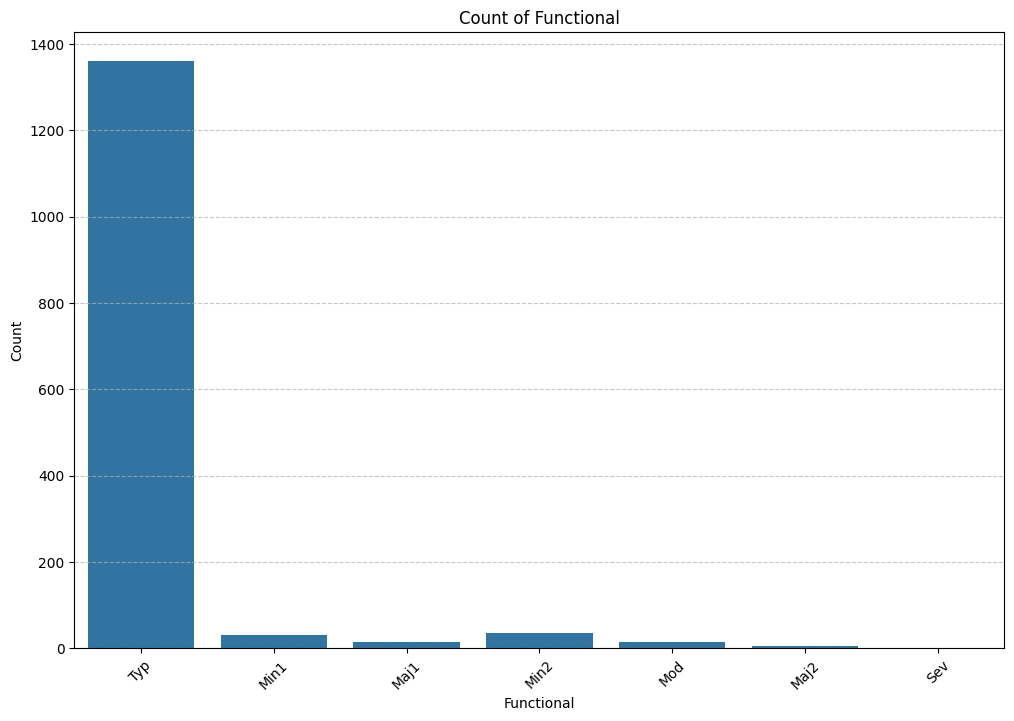

In [81]:
univariate_analyzer.analyze(df, 'Functional')

#### Insight:
- The Functional feature is overwhelmingly dominated by the "Typ" category, indicating that most properties in the dataset are categorized as typical.
- Other categories, such as "Min1," "Min2," "Mod," and "Maj1," are present in very small proportions.
#### Implication:
- The significant imbalance in this feature may reduce its predictive power in certain models unless the small categories strongly correlate with the target variable.
- We should consider:
    - Grouping minor categories into a single category, such as "Other," to simplify analysis.
    - Exploring the relationship between Functional and the target variable to determine its relevance in the prediction task.
### FireplaceQu

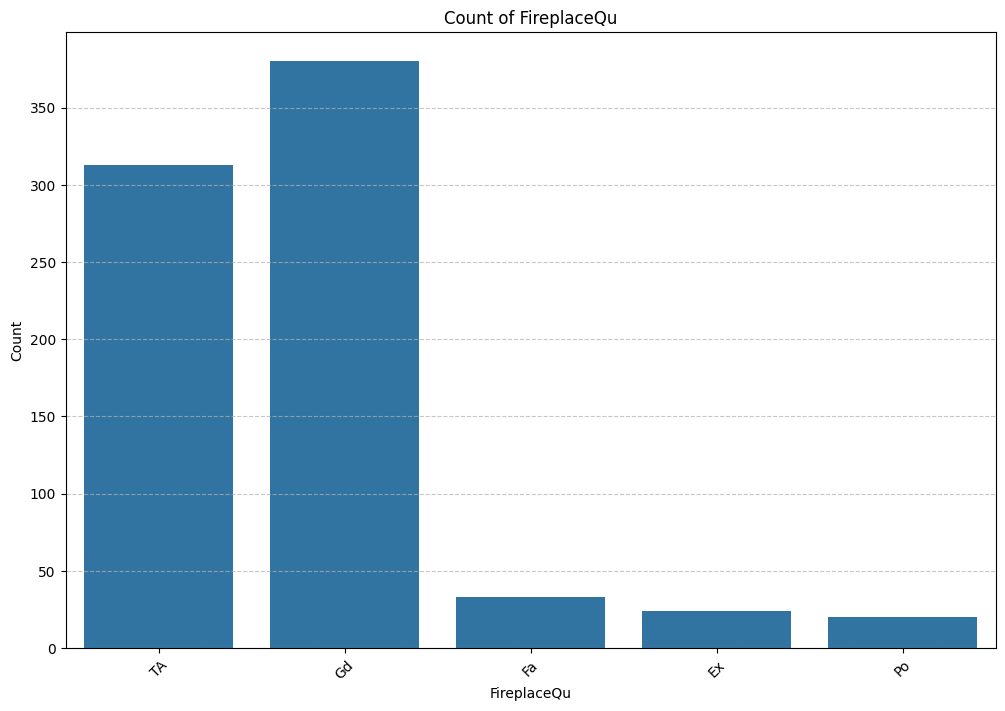

In [82]:
univariate_analyzer.analyze(df, 'FireplaceQu')

#### Insight:
- The FireplaceQu (Fireplace Quality) feature is split across categories, with TA (Typical/Average) and Gd (Good) being the most common.
- Categories like Ex (Excellent) and Po (Poor) have significantly lower counts, indicating fewer properties fall into these extreme quality ratings.
#### Implication:
- The wide distribution suggests potential relevance for modeling, as the FireplaceQu feature may provide a signal for property value or condition.
- We should consider:
    - Verifying the relationship between FireplaceQu and the target variable.
    - Encoding the categories ordinally if the values correspond to quality levels (e.g., Po < Fa < TA < Gd < Ex).
### GarageType

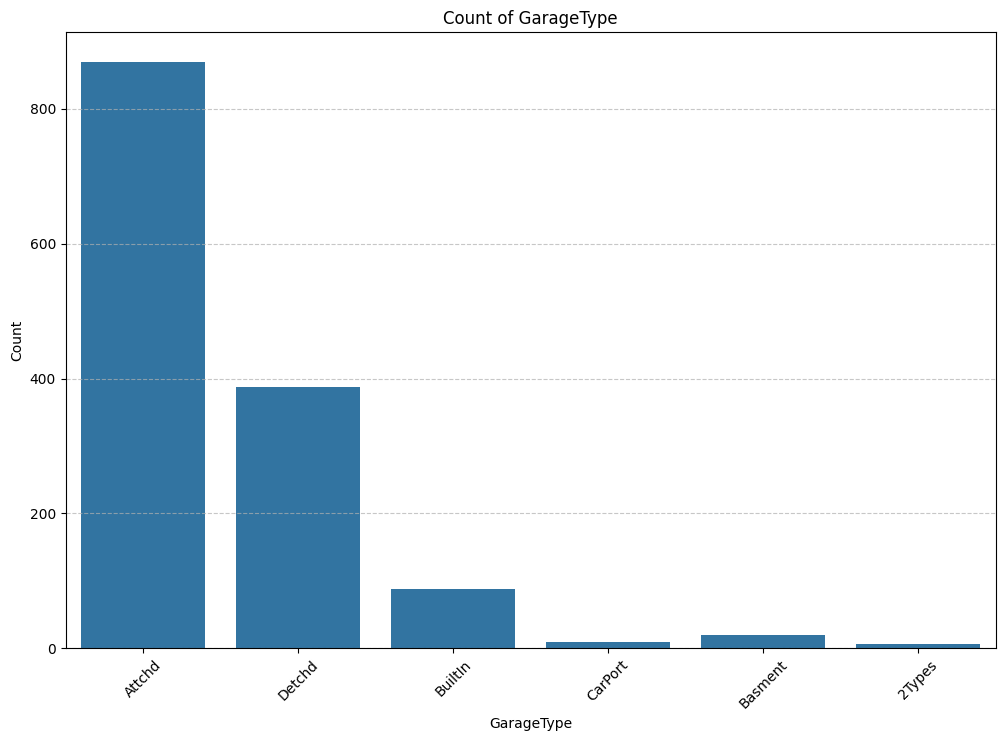

In [83]:
univariate_analyzer.analyze(df, 'GarageType')

#### Insight:
- The majority of properties have an Attchd (attached) garage type, followed by Detchd (detached) garages.
- Other garage types like BuiltIn, CarPort, Basement, and 2Types are significantly less frequent.
#### Implication:
- GarageType is a key feature to explore further:
    - The dominance of Attchd garages could indicate a trend in property preference or development patterns.
    - It may be worth analyzing how different garage types correlate with the target variable.
- Encoding this categorical variable as one-hot or ordinal (depending on data correlation) could help in predictive modeling.
### GarageFinish

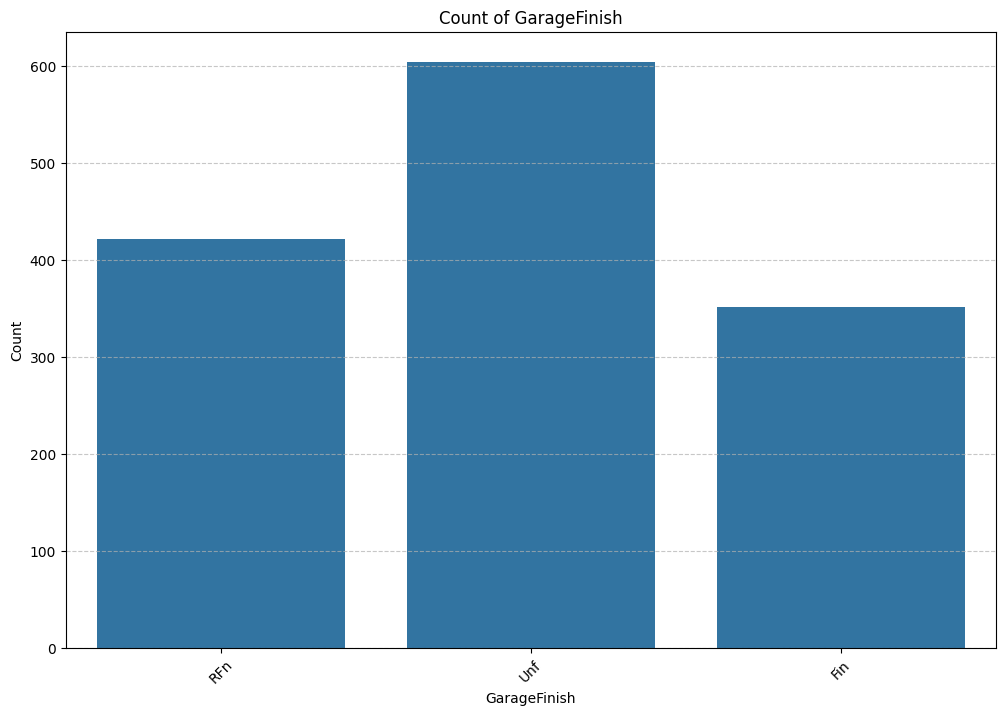

In [84]:
univariate_analyzer.analyze(df, 'GarageFinish')

#### Insight:
- The distribution of GarageFinish shows that the majority of garages are Unf (unfinished), followed by RFn (rough finish), and Fin (finished).
### Implications:
- This distribution indicates a trend where most properties do not invest in garage finishing, possibly due to cost considerations or a lack of demand for finished garages.
- GarageFinish could correlate with the property's price, as finished garages may add value.
### GarageQual

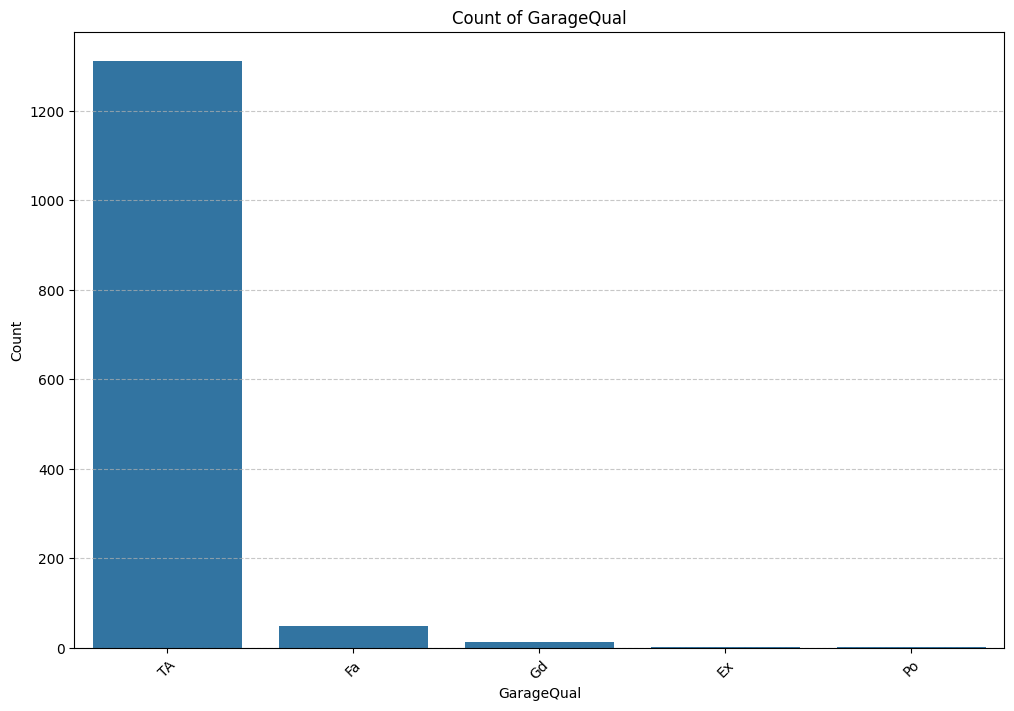

In [85]:
univariate_analyzer.analyze(df, 'GarageQual')

#### Insight:
- The GarageQual (Garage Quality) distribution indicates that the majority of garages have a quality rating of TA (Typical/Average) and very few garages fall under Ex (Excellent), Fa (Fair), or Po (Poor).
#### Implications:
- The dominance of TA suggests that garage quality is mostly average, with limited diversity.
- This variable might have limited predictive power in distinguishing property prices unless higher/lower quality garages correlate strongly with price.
### GarageCond

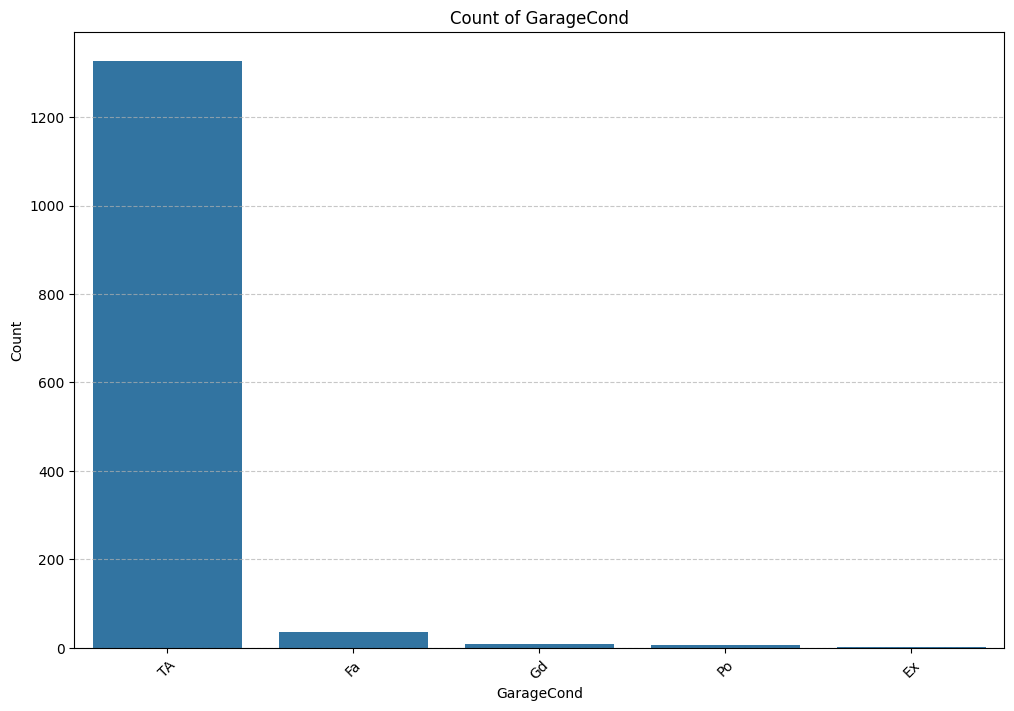

In [86]:
univariate_analyzer.analyze(df, 'GarageCond')

#### Insight:
- The GarageCond (Garage Condition) distribution highlights that the vast majority of garages are rated TA (Typical/Average) condition and only a very small number of garages are rated as Fa (Fair), Po (Poor), or Gd (Good).
#### Implications:
- The variable is highly imbalanced, with most values concentrated on TA.
- Similar to `GarageQual`, it might have limited variation for predictive modeling unless the rare categories significantly affect the target variable.

### PavedDrive

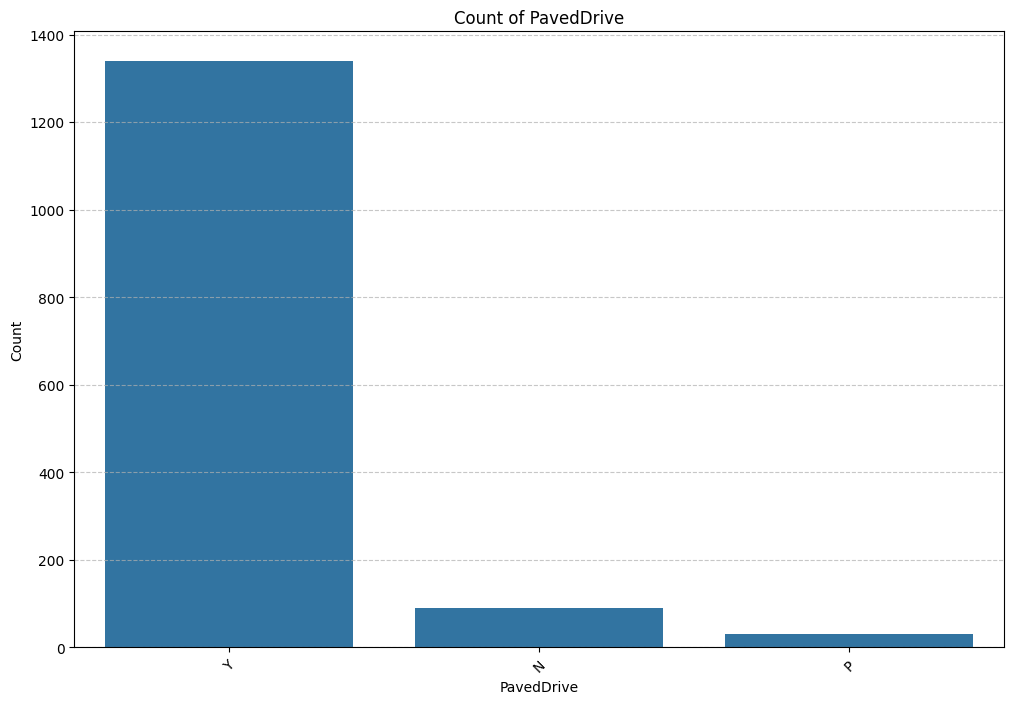

In [87]:
univariate_analyzer.analyze(df, 'PavedDrive')

#### Insight:
- The PavedDrive (Paved Driveway) variable distribution shows a significant majority of properties have a Y (Yes) for a paved driveway.
- Few properties have N (No) or P (Partial) for this feature.
#### Implications:
- The feature is imbalanced, with most properties having a paved driveway.
- The presence of a paved driveway (Y) might correlate positively with property prices, while N or P could potentially indicate lower property values.
### PoolQC

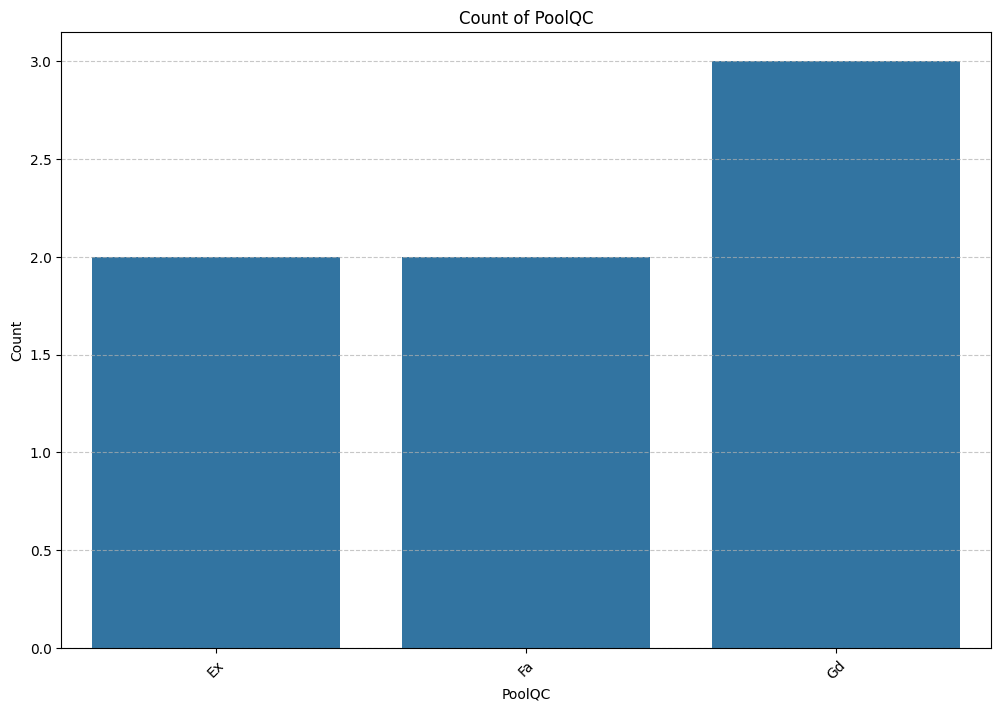

In [88]:
univariate_analyzer.analyze(df, 'PoolQC')

#### Insight:
- The PoolQC (Pool Quality) variable is sparsely distributed across three quality levels (Ex, Gd, and Fa) with very few observations.
#### Implications:
- Most houses do not have pools, as indicated by the extremely low counts of pool quality data.
- This feature may not be informative for general modeling unless focused on high-end properties where pools are more common.
- Convert the PoolQC variable into a binary feature: HasPool (Yes/No), based on whether a pool is present could improve model performance
### Fence

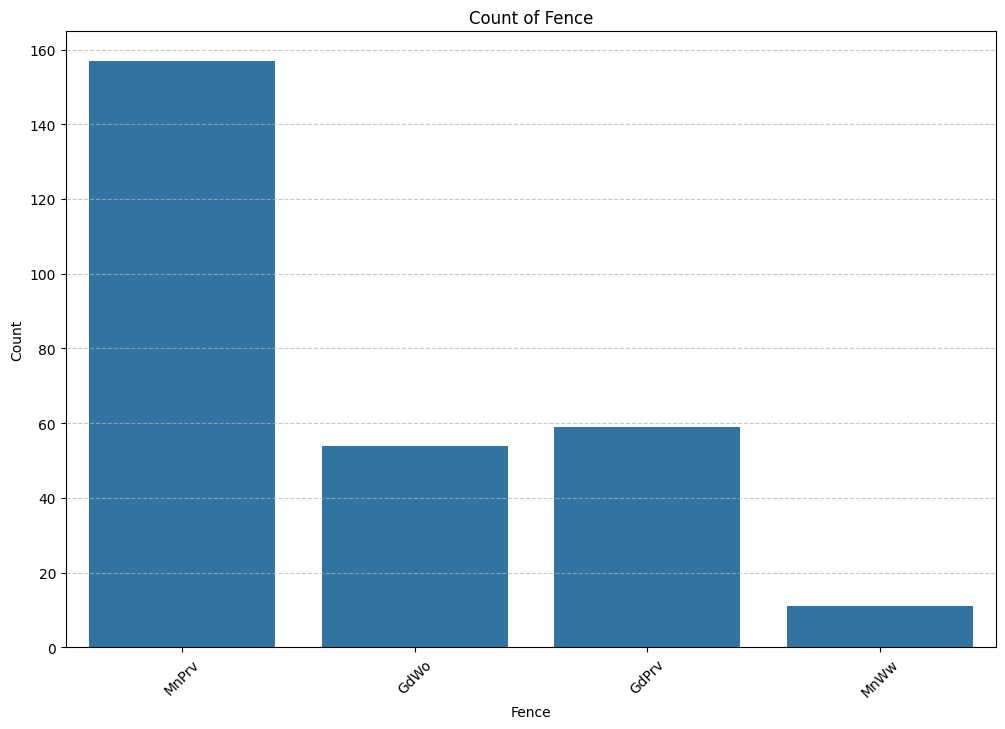

In [89]:
univariate_analyzer.analyze(df, 'Fence')

#### Insight:
- The Fence variable shows a small distribution across four categories with MnPrv (Minimum Privacy) dominating the dataset.
- GdWo (Good Wood), GdPrv (Good Privacy), and MnWw (Minimum Wood/Wire) have significantly lower counts.
#### Implications:
- Many properties do not have a fence, which is reflected as missing values in the dataset.
- Like the PoolQC variable, the presence of a fence might be a more useful feature than its specific type.
- Potential Feature Engineering:
    - Create a binary variable HasFence (Yes/No) based on whether a fence is present or not.
    - Investigate the correlation between having a fence and property prices or other key features.
### MiscFeature

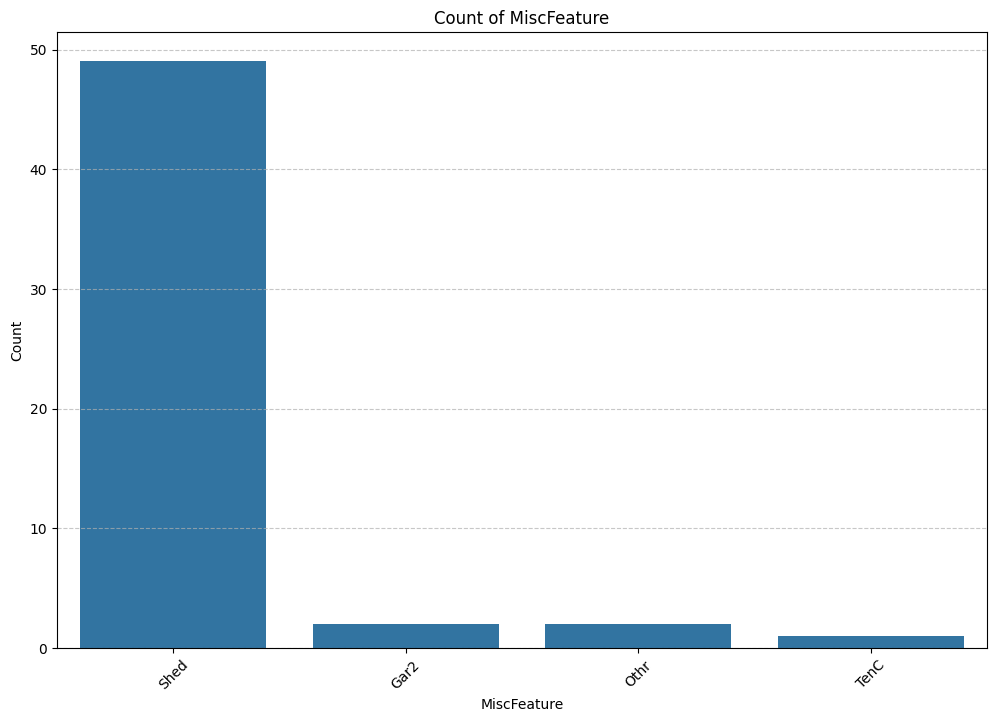

In [90]:
univariate_analyzer.analyze(df, 'MiscFeature')

#### Insight:
- The MiscFeature variable is highly sparse, with the majority of data being null or not having a value.
- Among the non-null values, the majority are categorized as Shed, with very few instances of Gar2 (second garage), Othr (other), and TenC (tennis court).
### Implications:
- This variable might not contribute significantly to predictive models due to its sparsity.
- Most properties lack a MiscFeature, making it less informative.
- Potential Feature Engineering:
    - Create a binary variable, e.g., HasMiscFeature (Yes/No), to represent the presence of any miscellaneous feature.
    - If Shed is strongly correlated with the target variable, consider creating a specific binary variable for HasShed.
### SaleType

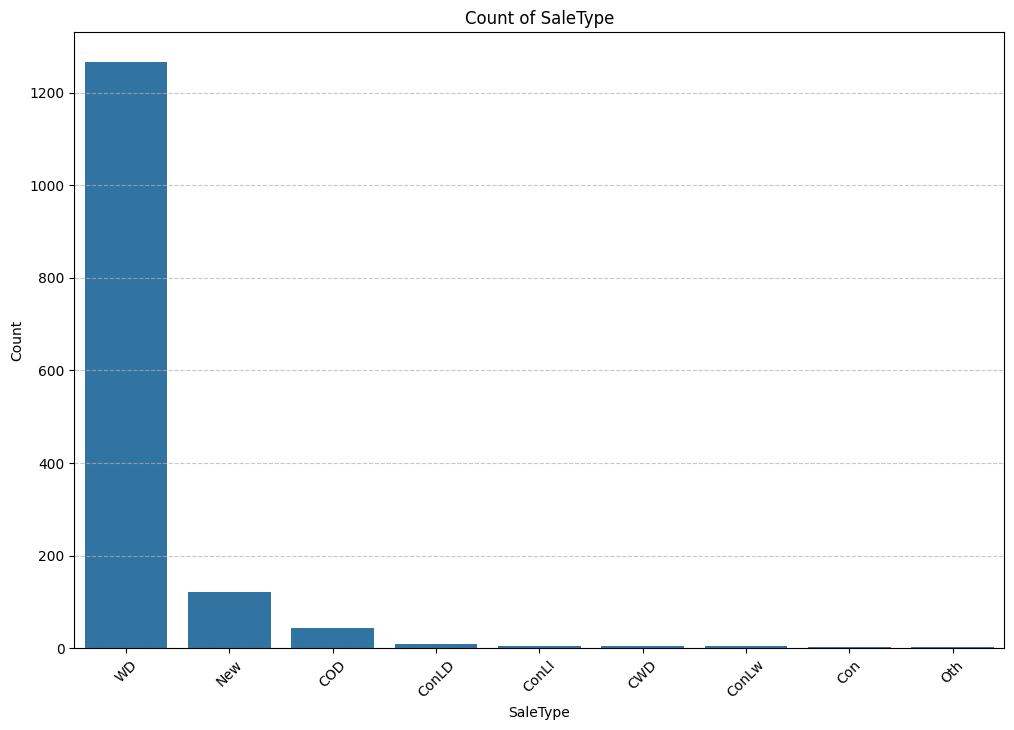

In [91]:
univariate_analyzer.analyze(df, 'SaleType')

#### Insight:
- The SaleType variable is dominated by the WD category, with a significantly smaller representation for other categories like New, COD, and various contract types (ConLD, ConLI, etc.).
#### Implications:
- The overwhelming majority of transactions fall under the WD category, which represents conventional warranty deeds. This makes it the default sales type in the dataset.
- This skew may dilute the impact of other sale types unless they correlate strongly with the target variable.
- Categories like ConLD, ConLI, and Con have very low counts and might not provide sufficient data for meaningful statistical analysis hence we should consider grouping these rare categories into a single category (e.g., Other) if their individual importance is minimal.
### SaleCondition

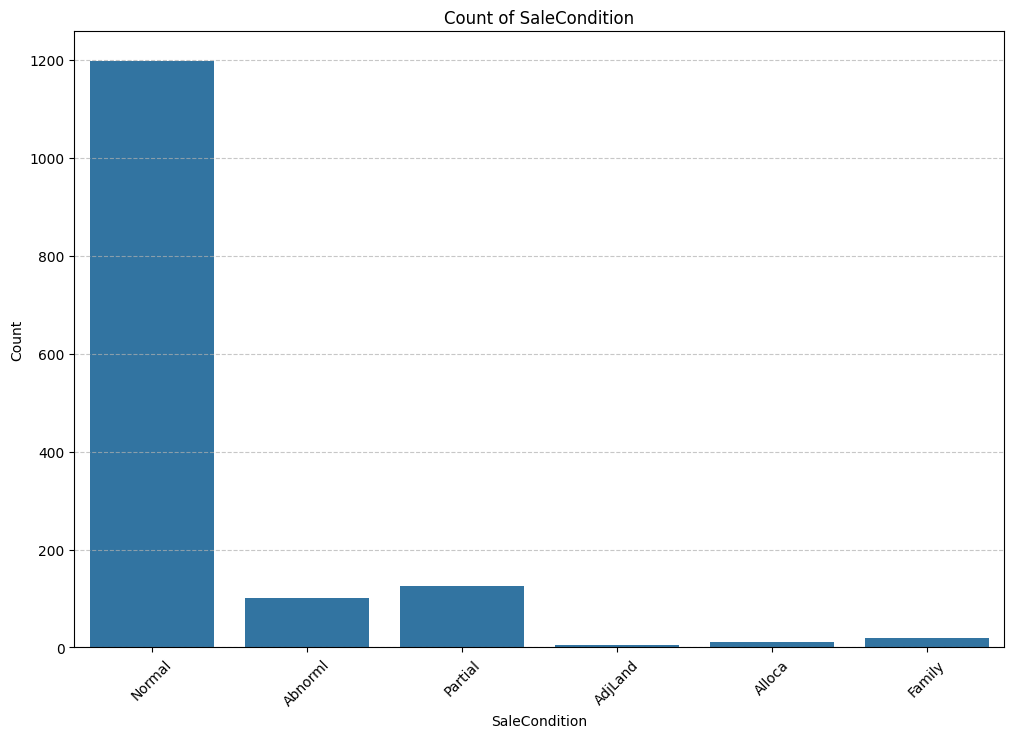

In [92]:
univariate_analyzer.analyze(df, 'SaleCondition')

#### Insight:
- The SaleCondition variable is heavily skewed towards the Normal category, with a significant majority of transactions falling under this label.
- The other conditions (Abnorml, Partial, AdjLand, Alloca, Family) have much smaller representation.
#### Implications:
- The dominance of the Normal category indicates that most transactions follow standard sale conditions.
- This could make it challenging for the model to learn patterns for the minority categories unless they exhibit strong correlations with the target variable.
- Categories like AdjLand, Alloca, and Family appear in very low frequencies. These could be grouped into a single category (e.g., Other) for simplicity in modeling.
- Categories like Abnorml or Partial may have unique characteristics that might significantly influence the target variable. These should be investigated further before making any decisions about simplification.

# Bivariate Analysis
## Numerical vs. Numerical Features

In [94]:
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())

### MSSubClass vs. SalePrice

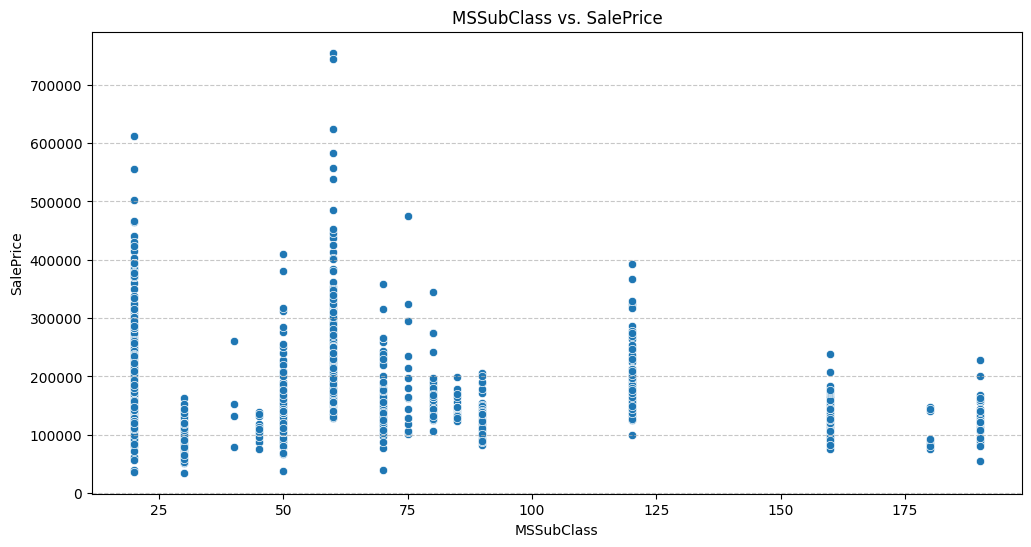

In [98]:
bivariate_analyzer.analyze(df, 'MSSubClass', 'SalePrice')

#### Insight: 
- The plot shows the relationship between the categorical variable MSSubClass (which represents different building classes) and SalePrice. The data points are scattered across different MSSubClass categories, and there seems to be some variation in SalePrice within each category.
- Certain categories (e.g., 20, 60) are associated with higher SalePrice values on average, while others (e.g., 30, 50, 160) are associated with lower prices. A few outliers are noticeable, particularly in categories like 20 and 60, where some homes have much higher prices compared to others in the same class.
#### Implication: 
- The categorical variable `MSSubClass` likely holds predictive power for SalePrice, as different subclasses correspond to distinct price ranges. Further analysis (e.g., one-hot encoding or grouping similar subclasses) may help capture this relationship effectively. Additionally, the presence of outliers in specific categories might need to be addressed to avoid skewing the model predictions.
### LotFrontage vs SalePrice

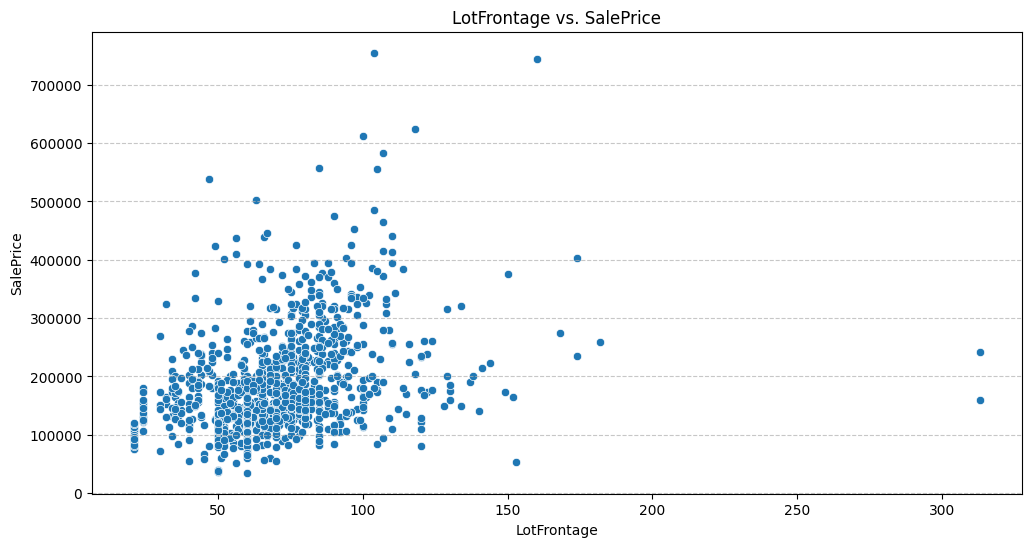

In [99]:
bivariate_analyzer.analyze(df, 'LotFrontage', 'SalePrice')

#### Insight: 
- The scatterplot depicts the relationship between LotFrontage (the linear feet of street-connected property) and SalePrice. There appears to be a weak positive correlation between the two variables, where larger lot frontages tend to have slightly higher sale prices. However, most data points are concentrated in the range of LotFrontage below 150, with a wide spread of SalePrice. 
- There are also a few outliers, such as properties with a LotFrontage above 200 that have varying SalePrice.
#### Implication: 
- While LotFrontage might contribute some predictive value to SalePrice, its weak correlation suggests it may not be a primary predictor. The concentration of data points in smaller ranges indicates that its impact on price might be more pronounced for properties within typical LotFrontage values (e.g., below 150). 
- Outliers with very large LotFrontage might need further investigation to determine their validity or unique characteristics.
### LotArea vs SalePrice

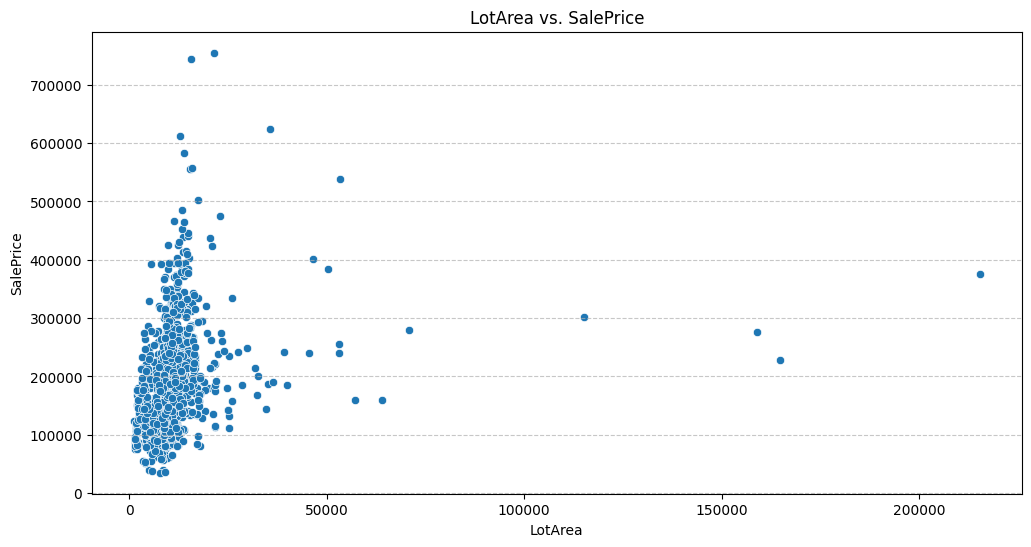

In [100]:
bivariate_analyzer.analyze(df, 'LotArea', 'SalePrice')

#### Insight: 
- The scatterplot illustrates the relationship between LotArea (total area of the property) and SalePrice. The data points are densely clustered for LotArea values below 20,000, with prices ranging widely.
- There appears to be a weak positive trend between LotArea and SalePrice, where larger properties tend to have higher prices. However, the relationship weakens as LotArea increases significantly, and there are numerous outliers with very large LotArea values but relatively low or moderate SalePrice.
#### Implication: 
- While LotArea may contribute some predictive value to SalePrice, the weak trend and high variability suggest it may not be a strong predictor on its own. 
- Additionally, the presence of outliers with disproportionately large lot areas warrants further investigation. These extreme cases might represent atypical properties or potential data entry errors and could impact model performance if not addressed appropriately.
### OverallQual vs SalePrice

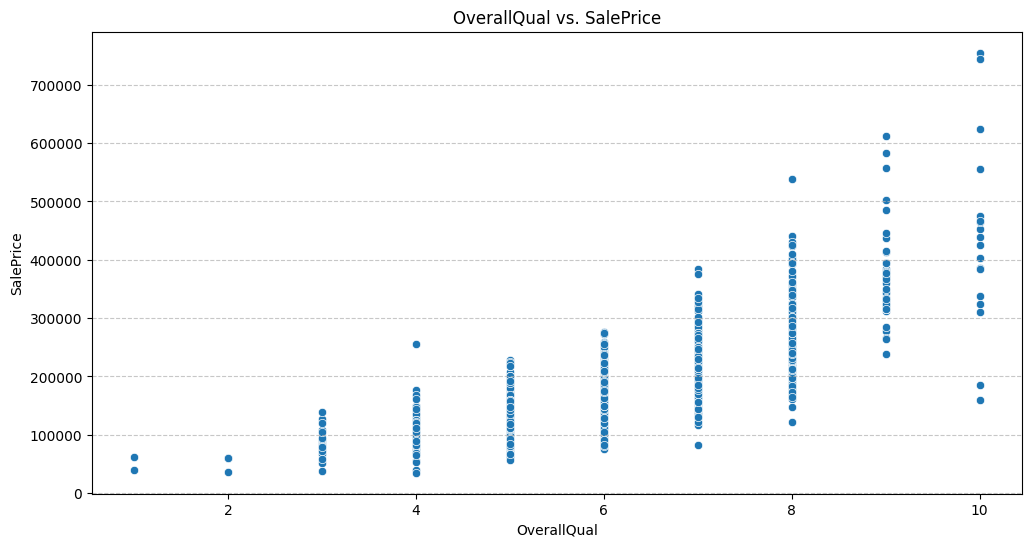

In [101]:
bivariate_analyzer.analyze(df, 'OverallQual', 'SalePrice')

#### Insight:
- There is a clear positive correlation: higher OverallQual ratings are associated with higher SalePrice. 
- The relationship appears to be approximately linear, with the spread of prices increasing as OverallQual rises. Notably, houses with the highest quality ratings (9 or 10) tend to cluster at the higher end of SalePrice. 
- However, there are a few outliers, such as properties with high quality but lower-than-expected prices.
#### Implication: 
- The strong positive trend indicates that OverallQual is a significant predictor of SalePrice. Its ordinal nature makes it straightforward to use in predictive models. 
- The spread of prices for each quality level suggests that other features, such as location or lot size, might influence pricing within these categories. 
- Outliers, particularly those with high quality but low price, warrant further examination to identify if they represent unique cases or data issues.
### OverallCond vs. SalePrice

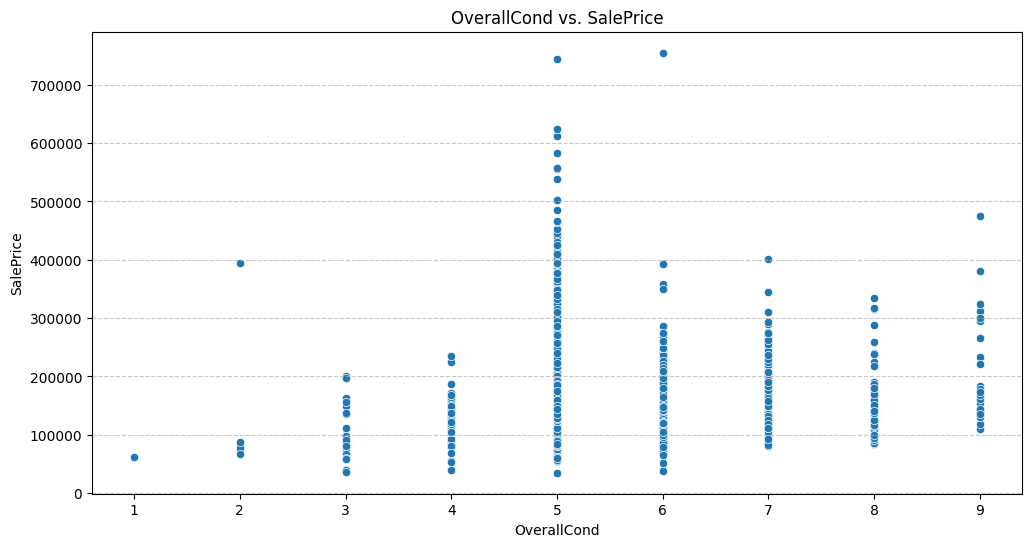

In [102]:
bivariate_analyzer.analyze(df, 'OverallCond', 'SalePrice')

#### Insight: 
- Unlike OverallQual, the correlation between OverallCond and SalePrice appears to be much weaker. 
- The majority of houses cluster around a condition rating of 5, with prices varying widely within this category. 
- Higher condition ratings (e.g., 7–9) do not consistently correspond to higher prices. 
- There are also a few outliers with high SalePrice at various condition levels.
#### Implication: 
- The weak and inconsistent relationship suggests that OverallCond may not be a strong predictor of SalePrice on its own. 
- Its impact could be more nuanced or secondary compared to other features, such as quality or size. To better understand its contribution, it might be worth exploring interactions between OverallCond and other variables. 
- Additionally, the clustering around a specific condition rating (5) could imply that most houses fall within a "standard" condition, limiting the variable's variability and predictive power.
### YearBuilt vs. SalePrice

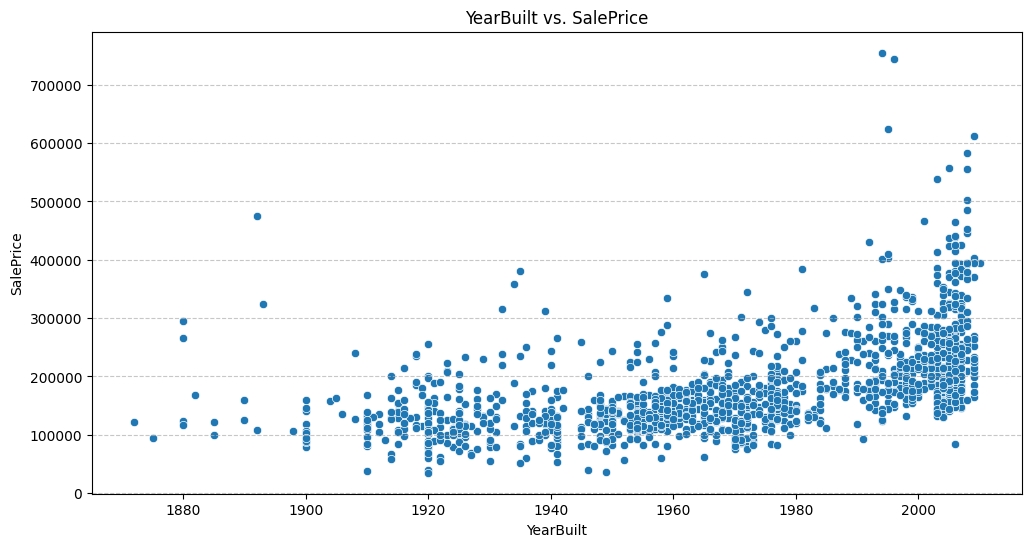

In [103]:
bivariate_analyzer.analyze(df, 'YearBuilt', 'SalePrice')

#### Insight: 
- The scatterplot shows the relationship between YearBuilt (the year the property was built) and SalePrice. There is a noticeable trend where newer homes (built in more recent years) tend to have higher sale prices. 
- Older properties (built before 1940) mostly cluster at the lower end of SalePrice. As the year progresses, the range of prices widens, with many recent properties selling for significantly higher prices. 
- However, some older homes also exhibit high sale prices, which could indicate renovations or historical significance.
#### Implication: 
- The clear positive trend indicates that YearBuilt is an important predictor of SalePrice. 
- This feature likely captures a mix of factors such as modern building standards, better materials, or newer neighborhoods being more desirable. 
- Outliers, such as older homes with very high prices, may need to be examined further, as they could skew the model unless appropriately accounted for (e.g., through interaction terms with renovation features or other adjustments). 
- This variable's predictive power might also increase if combined with related features like YearRemodAdd.
### YearRemodAdd vs. SalePrice

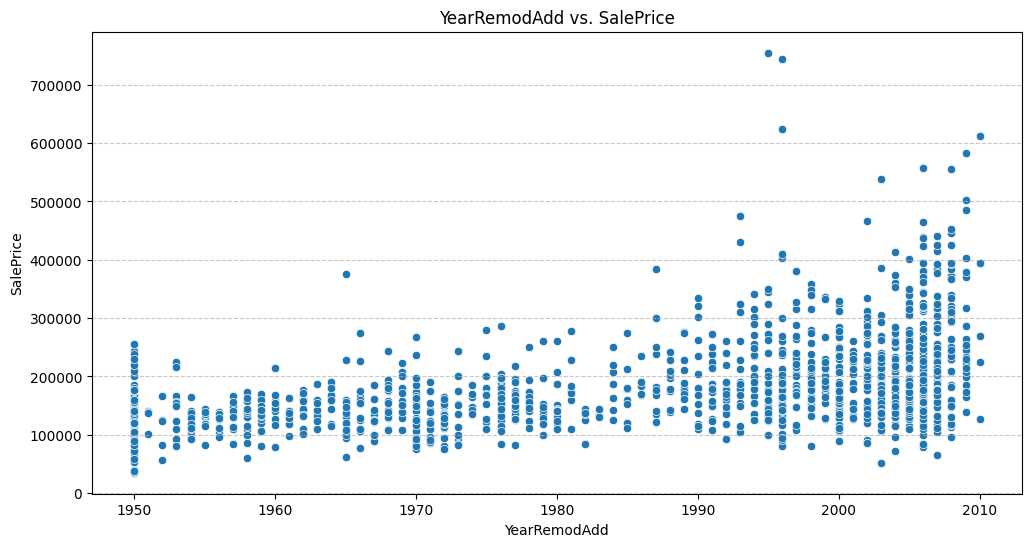

In [104]:
bivariate_analyzer.analyze(df, 'YearRemodAdd', 'SalePrice')

#### Insight: 
- There is a weak but noticeable upward trend: more recent remodels or additions tend to be associated with higher sale prices. 
- However, the spread of SalePrice at each year is wide, particularly in the later years. Houses remodeled or added to after 2000 generally show higher prices compared to older remodel years. 
- A few outliers exist, such as properties with unusually high prices relative to their remodel year.
#### Implication: 
- YearRemodAdd likely provides some predictive value for SalePrice, as recent remodels may make properties more desirable. 
- However, the weak correlation indicates that its impact might be secondary compared to other features like OverallQual or GrLivArea. 
- Combining YearRemodAdd with YearBuilt or using it to compute a derived feature (e.g., time since last remodel) might help capture its influence more effectively. 
- The wide spread and outliers also suggest that other factors, such as location or lot size, play a significant role in determining prices.
### MasVnrArea vs. SalePrice

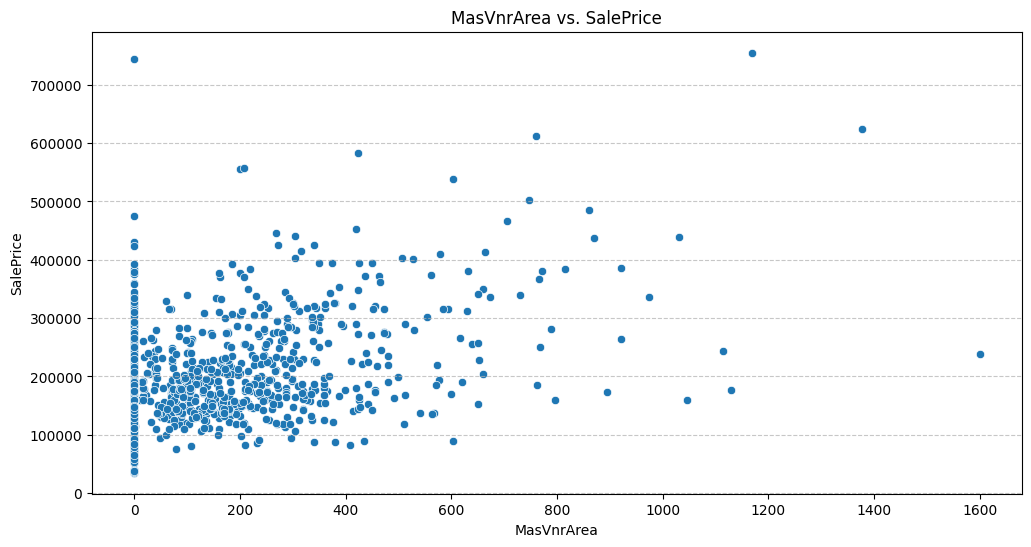

In [105]:
bivariate_analyzer.analyze(df, 'MasVnrArea', 'SalePrice')

#### Insight: 
- There is a weak positive correlation, as properties with larger masonry veneer areas tend to have higher sale prices. 
- However, the relationship is not strong, as there is significant variation in SalePrice for smaller masonry veneer areas, which dominate the data. 
- Many properties have a MasVnrArea value of zero, indicating no masonry veneer, and these still span a wide range of sale prices. A few outliers with large masonry veneer areas (>1,000 sq. ft.) show high prices, but their numbers are limited.
#### Implication: 
- While MasVnrArea may add some predictive power to the model, its influence is likely secondary or limited to specific property types. 
- The large number of properties with zero veneer area suggests that this feature may not always be relevant or impactful. Further analysis could explore interactions with other variables, such as OverallQual or YearBuilt, to better understand how masonry veneer contributes to higher sale prices. 
- Additionally, the outliers with large veneer areas warrant investigation to determine if they represent unique or luxury properties.
### BsmtFinSF1 vs. SalePrice

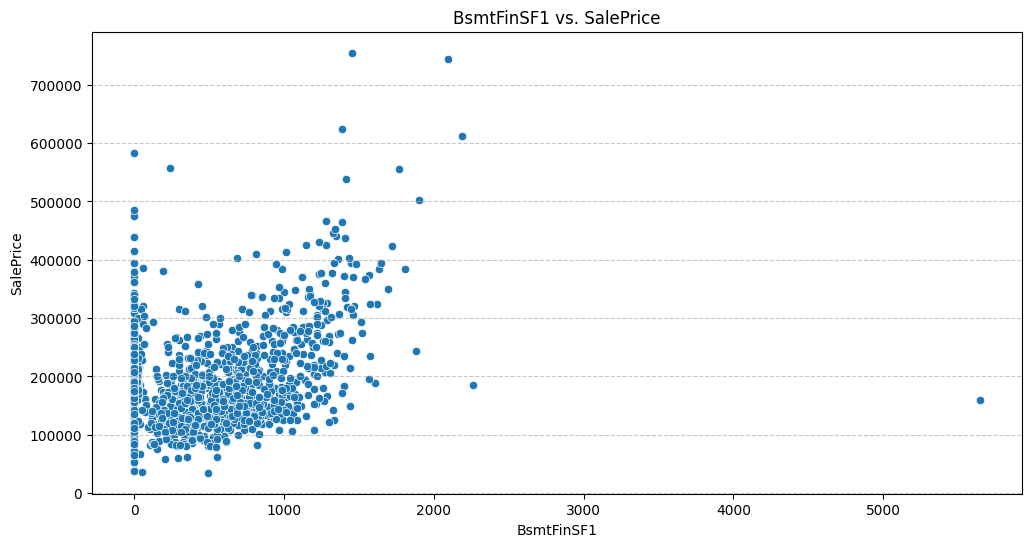

In [106]:
bivariate_analyzer.analyze(df, 'BsmtFinSF1', 'SalePrice')

#### Insight: 
- There is a weak positive correlation, indicating that larger finished basement areas tend to correspond to higher sale prices. 
- However, the relationship is not very strong, as there is a wide range of SalePrice for smaller finished basement areas. 
- Many properties have a BsmtFinSF1 value close to zero, suggesting they lack a finished basement, and these properties still span a range of sale prices. 
- A few outliers exist, including one property with a very large basement area (>5,000 sq. ft.) and another with a high price but a modest basement area.
#### Implication: 
- While BsmtFinSF1 likely has some predictive value, its impact on SalePrice appears to be secondary and might depend on other factors, such as overall house quality or above-ground living area. 
- The significant number of properties with zero finished basement area suggests that this variable could be augmented with a binary indicator for the presence of a finished basement. 
- Outliers, particularly the property with an exceptionally large basement area, should be further examined to understand their impact on modeling.
### BsmtFinSF2 vs. SalePrice

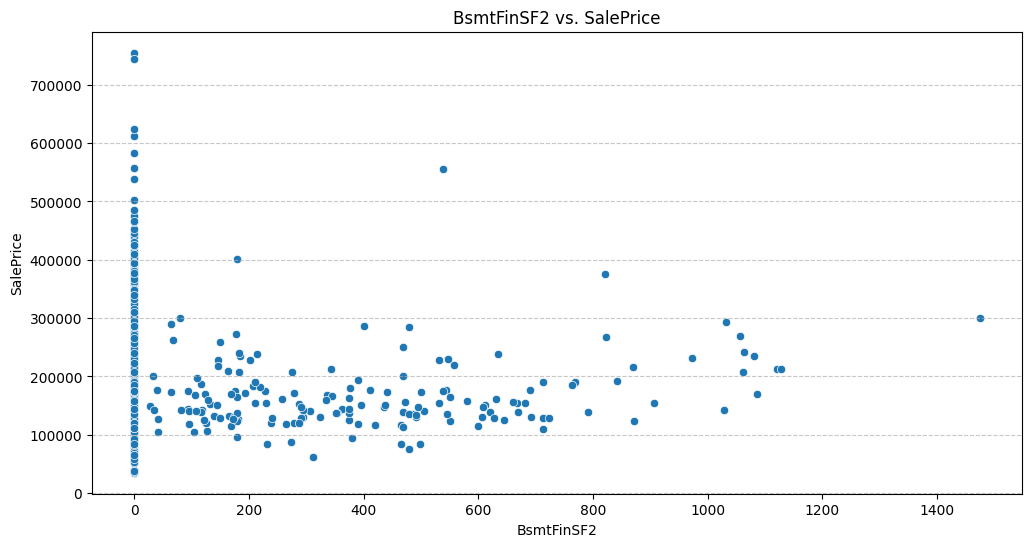

In [107]:
bivariate_analyzer.analyze(df, 'BsmtFinSF2', 'SalePrice')

#### Insight: 
- There is no apparent strong correlation between these two variables. A majority of properties have a BsmtFinSF2 value of zero, indicating they lack a secondary finished basement, and their sale prices span a wide range. 
- For properties with non-zero BsmtFinSF2, the relationship with SalePrice is inconsistent, with no clear trend. 
- A few outliers with relatively large BsmtFinSF2 values show moderate to high sale prices, but their influence is limited due to their rarity.
#### Implication: 
- BsmtFinSF2 appears to have limited predictive power for SalePrice. 
- The prevalence of zeros for this variable suggests that it might be useful to treat it as a binary feature (e.g., presence or absence of a secondary finished basement) in addition to its raw value.
- Outliers with large BsmtFinSF2 values should be examined further to determine their impact. This feature might better serve as part of a combined metric with other basement-related features (e.g., total finished basement area).
### BsmtUnfSF vs. SalePrice

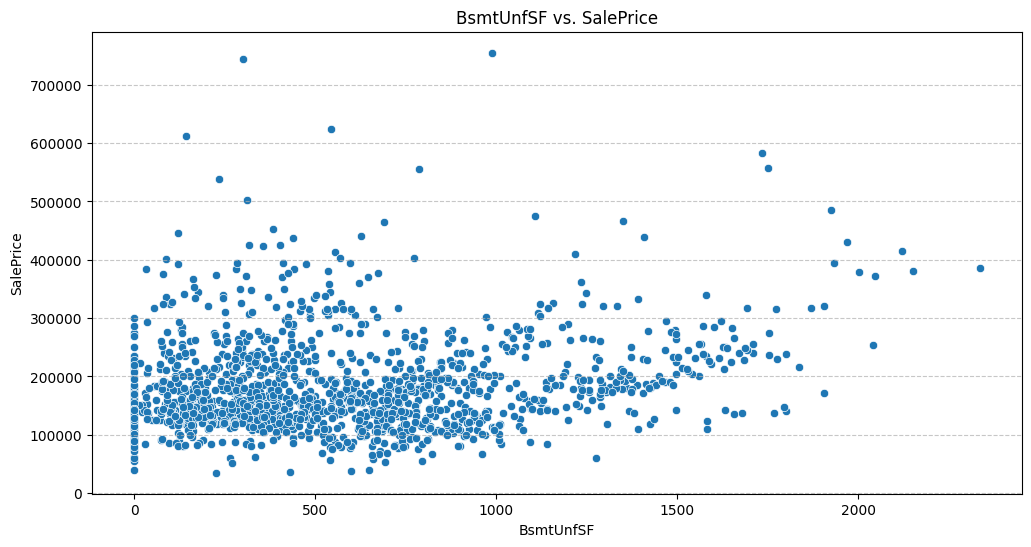

In [108]:
bivariate_analyzer.analyze(df, 'BsmtUnfSF', 'SalePrice')

#### Insight: 
- There is no clear positive or negative correlation between these two variables. 
- Sale prices vary widely across different values of BsmtUnfSF, with most properties clustering in the range of 0 to 1,000 square feet. 
- Properties with larger unfinished basement areas do not consistently show higher or lower prices, and the distribution appears relatively flat. 
- A few outliers are present, with very large BsmtUnfSF values exceeding 1,500 square feet and sale prices on the higher end.
#### Implication: 
- BsmtUnfSF seems to have limited predictive power for SalePrice on its own. 
- Its impact on pricing might depend on interactions with other variables, such as total basement area or finished basement space. 
- Given the spread of sale prices across different levels of BsmtUnfSF, its influence might be secondary or situation-dependent (e.g., larger unfinished basements could be valued as potential for future finishing). 
- Including BsmtUnfSF in a combined metric with other basement-related features might help capture its contribution more effectively. 
- Outliers with large unfinished basements should be reviewed to determine their significance.
### TotalBsmtSF vs SalePrice

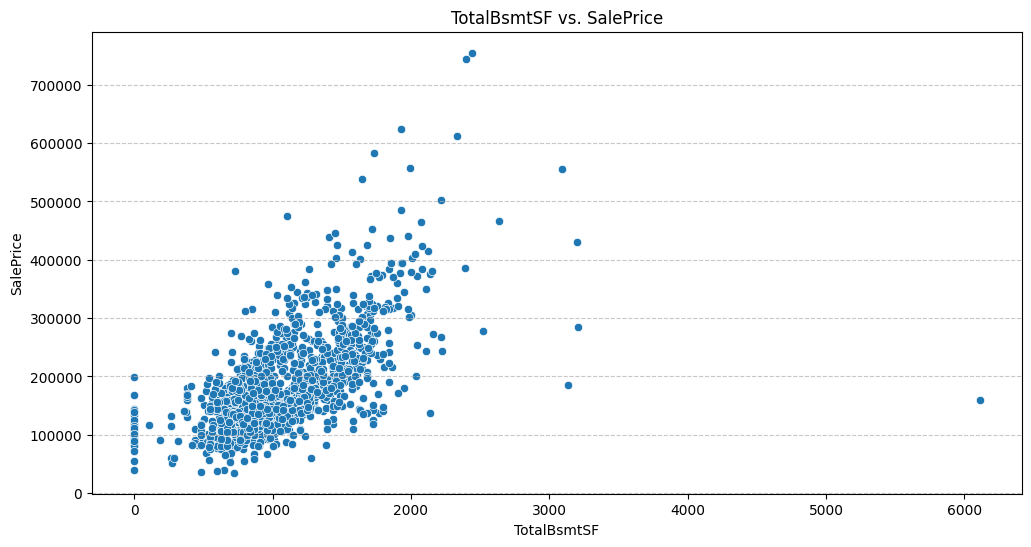

In [109]:
bivariate_analyzer.analyze(df, 'TotalBsmtSF', 'SalePrice')

#### Insight: 
- There is a clear positive correlation: properties with larger total basement areas tend to have higher sale prices. 
- The relationship appears linear, although the spread of sale prices increases with larger basement sizes. 
- Most properties cluster within 0 to 2,000 square feet, with sale prices ranging widely. 
- A few outliers are visible, including one property with an extremely large basement area (>5,000 sq. ft.) and a high sale price.
#### Implication: 
- The strong positive trend indicates that TotalBsmtSF is a significant predictor of SalePrice. 
- Including this variable in a predictive model will likely enhance its performance. The linear relationship suggests it can be used directly or as part of an interaction with other size-related features (e.g., GrLivArea). 
- The outliers, particularly the property with an unusually large basement, should be reviewed to ensure they do not disproportionately influence the model. 
- Overall, this variable is a key indicator of a property’s value.
### 1stFlrSF vs. SalePrice

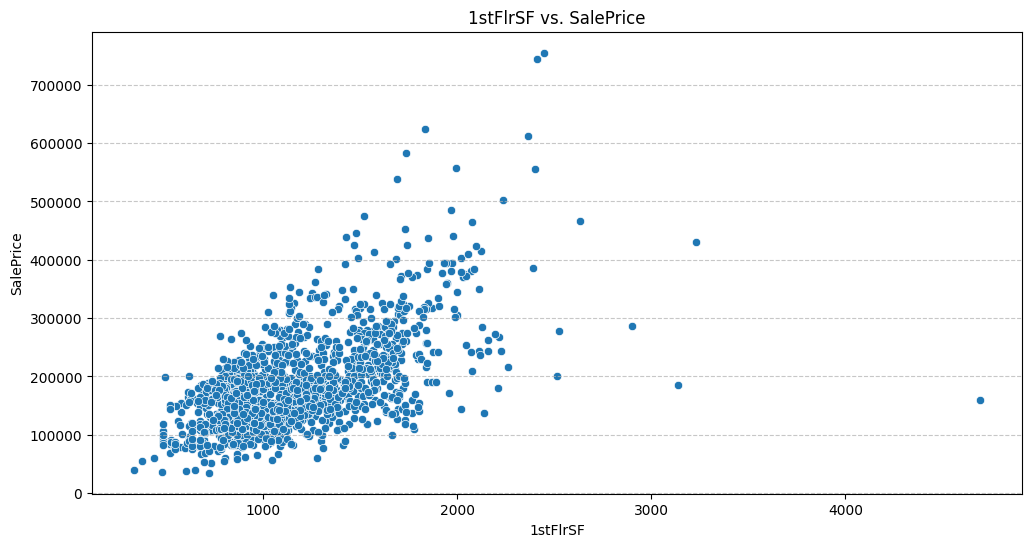

In [110]:
bivariate_analyzer.analyze(df, '1stFlrSF', 'SalePrice')

#### Insight: 
- There is a clear positive correlation: larger first floor areas are generally associated with higher sale prices. 
- The relationship appears mostly linear, with some scatter at higher values. 
- Most properties have a first floor area between 1,000 and 2,000 square feet, with sale prices ranging widely within this band. 
- A few outliers are present, such as properties with very large first floor areas (>3,000 sq. ft.) and varying sale prices.
#### Implication: 
- The strong correlation suggests that 1stFlrSF is a significant predictor of SalePrice. 
- Its linear relationship makes it straightforward to include in predictive models. 
- The scatter at larger values indicates that other features, such as overall house quality or location, may interact with 1stFlrSF to influence sale prices. 
- Outliers with exceptionally large first floor areas should be reviewed to assess their impact on model predictions. 
- This feature is an important component of the overall living space and will likely play a key role in explaining price variations.
### 2ndFlrSF vs. SalePrice

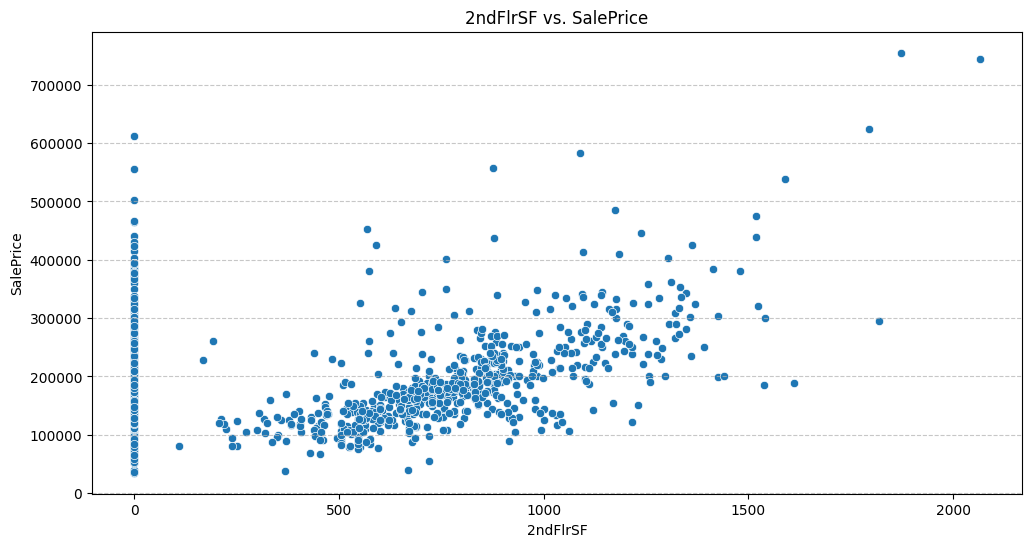

In [111]:
bivariate_analyzer.analyze(df, '2ndFlrSF', 'SalePrice')

#### Insight: 
- There is a positive correlation, with larger second floor areas generally associated with higher sale prices. 
- However, the relationship is less defined compared to 1stFlrSF. Properties with no second floor area (2ndFlrSF = 0) still exhibit a wide range of sale prices, likely because some houses are single-story and rely on other features to drive price. 
- For properties with non-zero 2ndFlrSF, the relationship appears linear with increasing variability in SalePrice as the area increases. 
- A few outliers have high sale prices relative to their second floor area.
#### Implication: 
- 2ndFlrSF is a valuable predictor of SalePrice, particularly for multi-story homes. 
- However, its influence is context-dependent, as properties without a second floor can still have high prices due to other factors (e.g., larger first floor area or higher quality finishes). 
- To maximize predictive accuracy, combining 2ndFlrSF with other size-related variables like 1stFlrSF or TotalBsmtSF may provide a more comprehensive representation of total living space. 
- Outliers should be examined to determine their cause and influence on the model.
### LowQualFinSF vs. SalePrice

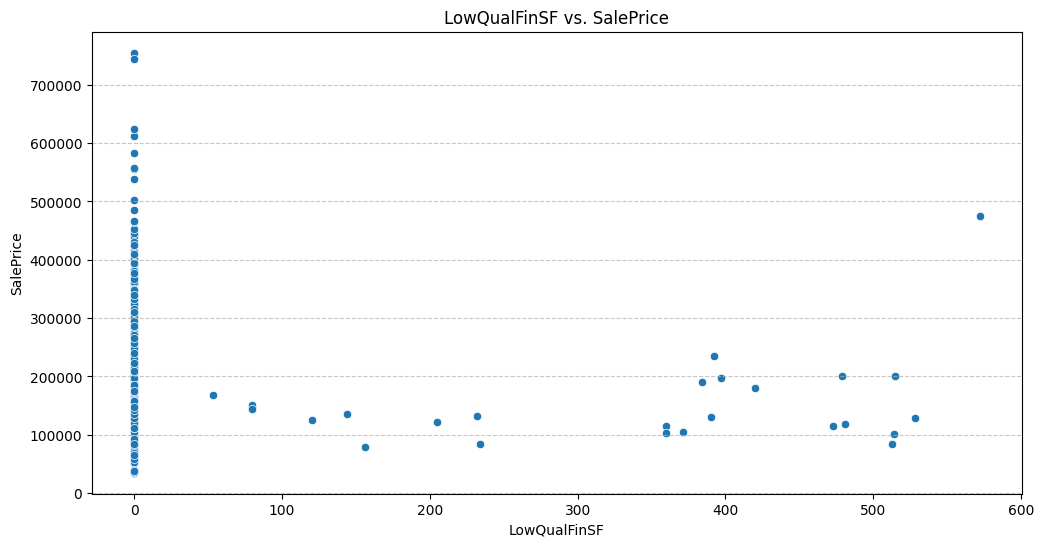

In [112]:
bivariate_analyzer.analyze(df, 'LowQualFinSF', 'SalePrice')

#### Insight: 
- There is no clear correlation between these variables. 
- Most properties have a LowQualFinSF value of 0, indicating no low-quality finished area, yet these properties span a wide range of sale prices. 
- For properties with non-zero LowQualFinSF, there is significant variability in SalePrice, and the presence of low-quality finished space does not appear to substantially increase or decrease sale price.
- A few outliers with relatively large LowQualFinSF values exist but do not seem to follow a consistent trend.
#### Implication: 
- LowQualFinSF has limited predictive power for SalePrice and may not be a critical feature in the model. 
- Its presence could potentially serve as a binary indicator for properties with any low-quality finished space, but its raw value adds little direct value to predicting sale price. 
- The influence of this variable might also depend on other factors, such as overall property quality or lot size. 
- Outliers should be reviewed, but this feature might only contribute marginally to a predictive model.
### GrLivArea vs. SalePrice

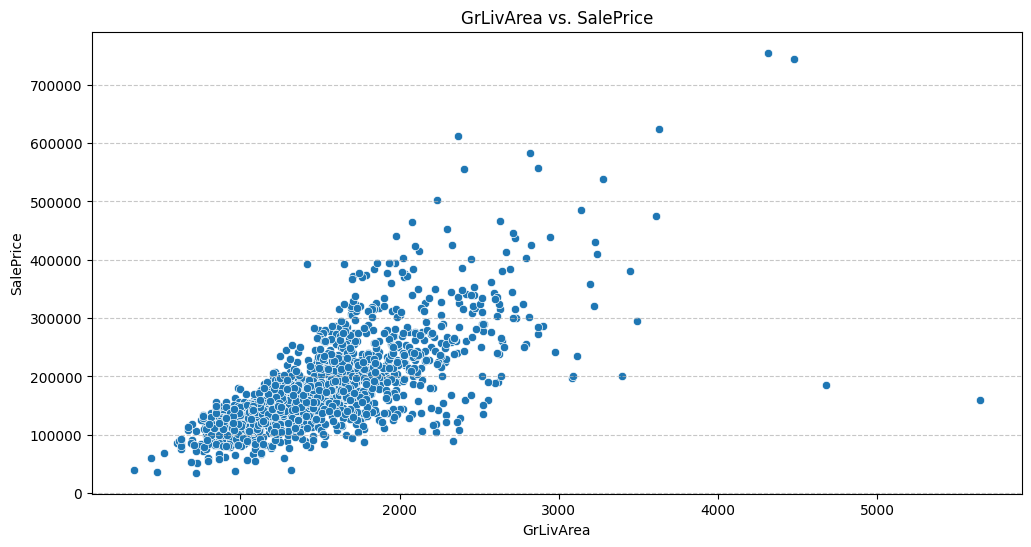

In [97]:
bivariate_analyzer.analyze(df, 'GrLivArea', 'SalePrice')

#### Insight: 
- There is a strong positive correlation: larger living areas are generally associated with higher sale prices.
- The relationship is largely linear, though there are some outliers. 
- Most properties cluster within 1,000 to 3,000 square feet, with sale prices ranging widely. 
- A few outliers, particularly properties with very large GrLivArea (above 4,000 sq. ft.) and lower-than-expected sale prices, are evident.
#### Implication: 
- The strong linear relationship suggests that GrLivArea is a highly important predictor of SalePrice. 
- Its influence on property value is direct and significant, making it a key feature for predictive modeling. 
- The presence of outliers (e.g., large homes with low sale prices) may require additional investigation to determine if they are valid data points or anomalies.
- These outliers could also represent properties with specific issues (e.g., location or condition) that should be addressed separately. 
- Overall, GrLivArea is a critical variable in explaining house price variation.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC